In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from typing import Dict, List, Tuple
import math
import statistics
import datetime
import os

# Economic Decline Index: Dynamic CSD Level

The decline index will be composed as follows: 

## 1. Population decline:

- A score out of 1.
- Measures: \
A. Number of periods a population has declined for (out of a possible 4). \
B. Magnitude of the decline (measured by annual percent change overall from 2001 to 2016.) \
C. Uses Percentiles to determine where they fall, relative to other municipalities IN THEIR OWN PROVINCE. The percentile is then converted into an "out of 1" value.  \

$$ \delta_{csd} = 1 - PR_{csd} $$

where $PR_{csd}$ is the percentile of each CSD in terms of magnitude of population change from its earliest period to its latest period. A 1 is the highest increase in population, and a 0 is the biggest decrease. Below is the percent change in CSD population from its first period (t=0) to its final period.

$\Delta Pop_{csd,t} = \frac{Pop_{csd,t}-Pop_{csd,0}}{Pop_{csd,0}}$

therefore 

$PR_{csd} = \frac{Q_{p_{csd}}}{N} $ where N is the number of CSDs in the province, and $Q_{csd}$ is the number of CSDs in the province with values below $p_{csd}$

Therefore, we have
$ \delta_{csd} \in [0,1]$ where 1 is the largest population decline.

The complete index factors in continuous decline:

$$ L_{csd} = 
\begin{cases} 
        1 & if ~ \Delta Pop_{csd,t} < 0 ~~~\forall ~n ~census~years \\
        \frac{3}{4} & if ~ \Delta Pop_{csd,t} < 0 ~~~\text{for}~ n-1 ~census~years \\
        \frac{2}{4} & if ~ \Delta Pop_{csd,t} < 0 ~~~\text{for}~ n-2 ~census~years \\
        \frac{1}{4} & if ~ \Delta Pop_{csd,t} < 0 ~~~\text{for}~ n-3 ~census~years \\
        0 & if ~ \Delta Pop_{csd,t} < 0 ~~~\text{for}~ 0 ~census~years \\
\end{cases} $$

This is essentially to say that a weight $L_{csd}$ takes a value in [1,2/3, 1/3, 0] if it has a declining population for 4, 3, 2, or 1 of its census years (1996-2001, 2001-2006, 2006-2011, 2011-2016).
    
Population Variables:\
    `1 Population and Dwelling Counts Population in 2001` \
    `2 Population and Dwelling Counts Population in 1996` \
    `1 Population and dwelling counts Population in 2006` \
    `CEN1 Population and dwelling counts Population in 2011`\
    `1 id Population, 2016` \
    

Population Decline Index is then:

$$ \Psi_{csd} = Percentile(L_{csd} \delta_{csd}) $$ where $\Psi_{csd}$ is the decline index. It ranges from 0 to 1, and ranks communities in terms of their economic decline. A 1 is the highest decline in Canada, and a 0 indicates constant, upward growth for 20 years. The 0 to 1 range is relative based on percentile.
    


## 2. Labour:

- A score out of 1.
- Measures: Unemployment and Labour Force Participation ( good proxy for aging population too ). 
A. Number of periods a employment has declined for (out of a possible 3).

B. Magnitude of the decline (measured by average percent change overall from 2001 to 2016.)

C. Uses Percentiles to determine where they fall, relative to other municipalities. The percentile is then converted into an "out of 1" value.

D. The two Indices (employment and LF participation) are averaged with 0.5 weights. Final value is the labour index.

Population Variables:\
    `136 Labour Force Indicators Participation rate` (for 2001) \
    `138 Labour Force Indicators Unemployment rate` (for 2001) \
    `197 Labour force activityParticipation rate` (for 2006)\
    `199 Labour force activityUnemployment rate` (for 2006)\
    `NHS 668 Labour force status Participation rate `(for 2011) \
    `NHS670 Labour force status Unemployment rate ` (for 2011) \
    `1871 Employment rate` (for 2016) \
    `1870 Participation rate` (for 2016)
    
    
The complete index factors in continuous decline weights that are multiplied by the provincial percentile to create the unadjusted index:

$$ Unemployment~Weight_{csd} = 
\begin{cases} 
        1 & if ~ \Delta UE_{csd,t} > 0 ~~~\forall ~n ~census~years \\
        \frac{2}{3} & if ~ \Delta UE_{csd,t} > 0 ~~~\text{for}~ n-1 ~census~years \\
        \frac{1}{3} & if ~ \Delta UE_{csd,t} > 0 ~~~\text{for}~ n-2 ~census~years \\
        0 & if ~ \Delta UE_{csd,t} > 0 ~~~\text{for}~ 0 ~census~years \\
\end{cases} $$



$$ Labour~Force~Participation~Weight_{csd} = 
\begin{cases} 
        1 & if ~ \Delta LF_{csd,t} < 0 ~~~\forall ~n ~census~years \\
        \frac{2}{3} & if ~ \Delta LF_{csd,t} < 0 ~~~\text{for}~ n-1 ~census~years \\
        \frac{1}{3} & if ~ \Delta LF_{csd,t} < 0 ~~~\text{for}~ n-2 ~census~years \\
        0 & if ~ \Delta LF_{csd,t} < 0 ~~~\text{for}~ 0 ~census~years \\
\end{cases} $$



## 3. Industry Composition Diversity 

In the census (notably 2001, the "limiting reagent" census), the best indicator of this is employment diversity. 

A) For 2001:

To be Used:

`139 IndustryTotal - Experienced labour force`

`140 Industry   Agriculture and other resource-based industries`\
`141 Industry   Manufacturing and construction industries`\
`142 Industry   Wholesale and retail trade`\
`143 Industry   Finance and real estate`\
`143 Industry   Health and education`\
`145 Industry   Business services`\
`146 Industry   Other services`


Other (Not Used)
`OccupationTotal - Experienced labour force`
`Occupation   Management occupations`\
`Occupation   Business, finance and administration occupations`\
`Occupation   Natural and applied sciences and related occupations`\
`Occupation   Health occupations`\
`Occupation   Social science, education, government service and religion`\
`Occupation   Art, culture, recreation and sport`\
`Occupation   Sales and service occupations`\
`Occupation   Trades, transport and equipment operators and related occupations`\
`Occupation   Occupations unique to primary industry`\
`Occupation   Occupations unique to processing, manufacturing and utilities`\

B) For 2006:

`211 IndustryTotal experienced labour force 15 years and over`\
`212 Industry   Agriculture and other resource-based industries`\
`213 Industry   Construction`\
`214 Industry   Manufacturing`\
`215 Industry   Wholesale trade`\
`216 Industry   Retail trade`\
`217 Industry   Finance and real estate`\
`218 Industry   Health care and social services`\
`219 Industry   Educational services`\
`220 Industry   Business services`\
`221 Industry   Other services`

C) For 2011

`689 IndustryTotal labour force population aged 15 years and over by industry - North American Industry Classification` `System (NAICS) 2007`\
`690 Industry  Industry - not applicable`\
`691 Industry  All industries`\
`692 Industry    11 Agriculture, forestry, fishing and hunting`\
`693 Industry    21 Mining, quarrying, and oil and gas extraction`\
`694 Industry    22 Utilities`\
`695 Industry    23 Construction`\
`696 Industry    31-33 Manufacturing`\
`697 Industry    41 Wholesale trade`\
`698 Industry    44-45 Retail trade`\
`699 Industry    48-49 Transportation and warehousing`\
`700 Industry    51 Information and cultural industries`\
`701 Industry    52 Finance and insurance`\
`702 Industry    53 Real estate and rental and leasing`\
`703 Industry    54 Professional, scientific and technical services`\
`704 Industry    55 Management of companies and enterprises`\
`705 Industry    56 Administrative and support, waste management and remediation services`\
`706 Industry    61 Educational services`\
`707 Industry    62 Health care and social assistance`\
`708 Industry    71 Arts, entertainment and recreation`\
`709 Industry    72 Accommodation and food services`\
`710 Industry    81 Other services (except public administration)`\
`711 Industry    91 Public administration`

C) For 2016

`1897 id Total Labour Force population aged 15 years and over by Industry - North American Industry Classification System (NAICS) 2012 - 25% sample data`\
`1898 Industry - NAICS2012 - not applicable`\
`1899 All industry categories`\
`1900 11 Agriculture, forestry, fishing and hunting`\
`1901 21 Mining, quarrying, and oil and gas extraction`\
`1902 22 Utilities`\
`1903 23 Construction`\
`1904 31-33 Manufacturing`\
`1905 41 Wholesale trade`\
`1906 44-45 Retail trade`\
`1907 48-49 Transportation and warehousing`\
`1908 51 Information and cultural industries`\
`1909 52 Finance and insurance`\
`1910 53 Real estate and rental and leasing`\
`1911 54 Professional, scientific and technical services`\
`1912 55 Management of companies and enterprises`\
`1913 56 Administrative and support, waste management and remediation services`\
`1914 61 Educational services`\
`1915 62 Health care and social assistance`\
`1916 71 Arts, entertainment and recreation`\
`1917 72 Accommodation and food services`\
`1918 81 Other services (except public administration)`\
`1919 91 Public administration`

D) CONVERSION CHART BETWEEN 2001-2006 CATEGORIES and 2011-2016 NAICS CATEGORIES:


| 2001 | 2006 | 2011 | 2016 |
| -----|------| -----|-----|
| 139 IndustryTotal - Experienced labour force | 211 IndustryTotal experienced labour force 15 years and over | 689 IndustryTotal labour force population aged 15 years and over by industry - North American Industry Classification System (NAICS) 2007 | 1897 id Total Labour Force population aged 15 years and over by Industry - North American Industry Classification System (NAICS) 2012 - 25% sample data | 
|140 Agriculture and other resource-based industries| 212 Industry   Agriculture and other resource-based industries | 692 Industry    11 Agriculture, forestry, fishing and hunting \ 693 Industry    21 Mining, quarrying, and oil and gas extraction \ 694 Industry    22 Utilities | 1900 11 Agriculture, forestry, fishing and hunting \ 1901 21 Mining, quarrying, and oil and gas extraction \ 1902 22 Utilities |
|141 Manufacturing and construction industries| 213 Industry   Construction \ 214 Industry   Manufacturing | 695 Industry    23 Construction \ 696 Industry    31-33 Manufacturing | 1903 23 Construction \ 1904 31-33 Manufacturing |
|142 Wholesale and retail trade| 215 Industry   Wholesale trade \ 216 Industry   Retail trade | 697 Industry    41 Wholesale trade\ 698 Industry    44-45 Retail trade\ 699 Industry    48-49 Transportation and warehousing\ | 1905 41 Wholesale trade \ 1906 44-45 Retail trade \ 1907 48-49 Transportation and warehousing |
|143 Finance and real estate| 217 Industry   Finance and real estate | 701 Industry    52 Finance and insurance \ 702 Industry    53 Real estate and rental and leasing | 1909 52 Finance and insurance \ 1910 53 Real estate and rental and leasing |
|144 Health and education| 218 Industry   Health care and social services \ 219 Industry   Educational services | 706 Industry    61 Educational services \ 707 Industry    62 Health care and social assistance | 1914 61 Educational services \ 1915 62 Health care and social assistance|
|145 Business services| 220 Industry   Business services | 703 Industry    54 Professional, scientific and technical services \ 704 Industry    55 Management of companies and enterprises \ 705 Industry    56 Administrative and support, waste management and remediation services | 1911 54 Professional, scientific and technical services \ 1912 55 Management of companies and enterprises \ 1913 56 Administrative and support, waste management and remediation services |
|146 Other services| 221 Industry   Other services | 700 Industry    51 Information and cultural industries \ 708 Industry    71 Arts, entertainment and recreation \ 709 Industry    72 Accommodation and food services \ 710 Industry    81 Other services (except public administration) \ 711 Industry    91 Public administration | 1908 51 Information and cultural industries \ 1916 71 Arts, entertainment and recreation \ 1917 72 Accommodation and food services \ 1918 81 Other services (except public administration) \ 1919 91 Public administration |



I can create a ratio of the share of total employment for each occupation, and the share of employment for each industry. That highlights what industries are dominant in the employment sphere, even if they are not necessarily the most lucrative in aggregate revenues, etc... 

When identifying if a commmunity has a dominant industry, I apply the following:


Step 1) Find $$ Dominant~Industry~_{csd,t} = Max(Industry_{i,csd,t})~~ \forall ~(i = \text{Agriculture, Manufacturing, etc..)} $$

Step 2) Calculate Dominant industry share:

$$ DIS_{csd,t} = \frac{Dominant~Industry~_{csd,t}}{Experienced~labour~force_{csd,t}} $$

Step 3) Identify if there is a dominant Industry using a 28.57142857\% threshold. I use threshold because it is double the share of an industry in a perfectly diverse CSD. There are 7 industry categories (~14%), so twice that is ~28%

`if DominantIndustry_csd_t >= (0.2857142857):` 

`    Domination == DominantInustry_csd_t`

`elif DominantIndustry_csd_t < (0.2857142857):`

`    Domination == 'None'`

 `else:`
 
`    domination == math.nan`

$$ Dominant~Industry_{csd,t} = 
\begin{cases} 
        Largest~Industry_{csd,t} & if ~ Largest~Industry_{csd,t} \geq \frac{2}{7} \\
        None & if ~ Largest~Industry_{csd,t} < \frac{2}{7} 
\end{cases} $$

The following List Shows the conversion between Dominant Industries and their dataframe representation:

| Industry | Appears in DataFrame as: |
| -------- | ------------------------ |
| 1. Agriculture and other resource-based industries | Agr |
| 2. Manufacturing and construction industries | Mnf |
| 3. Wholesale and retail trade | Whl |
| 4. Finance and real estate | Fin |
| 5. Health and education | Hlt |
| 6. Business services | Biz | 
| 7. Other services | Otr |
| 8. No Dominant Industry | None |
| 9. Data Unavailable | NaN |


Step 4) Identify whether dominant industry is the same for all years. Assign a continuity score.

`if dominant industry (this year) is equal to dominant industry (last available year) : +1 to continuity score`

If one year is NaN (missing) from the dataset , it is skipped when measuring continuity (i.e if 2011 is missing, and 2006 and 2016 are both Agr dominant, there is a +1 to continuity score. Starts at 0

ex. $[mnf, mnf, mnf, agr, mnf]$  would have a continuity score of 2 (mnf (+0)-> mnf (+1) -> mnf(+1) -> agr(+0) -> mnf(+0))

Step 5) Identify direction of dominant industry share (growing? shrinking?)

$$ C_{csd} = 
\begin{cases} 
        1 & if ~ \Delta DIS_{csd,t} > 0 ~~~\forall ~n ~census~years \\
        \frac{3}{4} & if ~ \Delta DIS_{csd,t} > 0 ~~~\text{for}~ n-1 ~census~years \\
        \frac{2}{4} & if ~ \Delta DIS_{csd,t} > 0 ~~~\text{for}~ n-2 ~census~years \\
        \frac{1}{4} & if ~ \Delta DIS_{csd,t} > 0 ~~~\text{for}~ 0 ~census~years \\
\end{cases} $$


Step 6) Identify the Magnitude of the dominant industry share, and it's percent change from earliest to latest recorded period:

$$ DominationMagnitude_{csd} = \frac{DominantIndustryShare_{csd,2016} - DominantIndustryShare_{csd,2001}}{DominantIndustry_{csd,2001}}$$

Step 7) Identify the number of years out of a possible 4 that there exists a dominant industry (2001, 2006, 2011, 2016)

$$ D_{csd} = 
\begin{cases} 
        4 & if ~ Dominant~Industry_{csd,t} ~ \exists ~~~\text{for} ~n ~census~years \\
        3 & if ~ Dominant~Industry_{csd,t} ~ \exists ~~~\text{for}~ n-1 ~census~years \\
        2 & if ~ Dominant~Industry_{csd,t} ~ \exists ~~~\text{for}~ n-2 ~census~years \\
        1 & if ~ Dominant~Industry_{csd,t} ~ \exists ~~~\text{for}~ n-3 ~census~years \\
        0 & if ~ Dominant~Industry_{csd,t} ~ \nexists ~~~\text{for any} ~census~years \\
\end{cases} $$

Step 8) Generate the final Index: 

$$ I_{csd} = Percentile(Percentile(\%\Delta P_{csd}) * C_{csd} * D_{csd} * S_{csd}) $$

where:

$ I_{csd} $ is the industry composition index.

$\%\Delta P_{csd}$ is the percent change in the share of labour force that the dominant industry occupies (a proxy for how specialized the CSD is). The change is converted to a percentile score relative to provinces. This removes the problem of having slight negative changes carry through and make the rest of an index more negative. We care about the relative rankings of the change, but a slight (say, 1%) decrease in a 60% dominant share industry should not necessarily mean a CSD should be more heavily weighted as diversifying than one that fluctuates up and down with a 20% dominant share industry, but increases overall by 1%. This is why the ordinal rankings are important. They remove the overinflation of the importance of the direction of change, as opposed to the magnitude. Slight changes (up and down by ~ 1%) are not important compared to the magnitude, but considering the actual percent change divides all CSDs into two tiers: ones with a positive change, and those with a negative change. the positive would always come before the negative, no matter the other characteristics if percentiles / ordinal rankings aren't used. 

$D_{csd}$ is the Number of periods where a dominant industry exists within a CSD (i.e. an identified industry has more than ~28% of the labour force employed in it.

$C_{csd}$ is the consecutive change weight. It is defined above in step 5. If there is persistent decline or increase in dominant industry share of labour force, then it is weighed higher.

$S_{csd}$ is the average dominant share of industry across the time period. We use this because magnitude is important for determining how significantly a CSD is specialized.

The final result is an ordinal ranking (percentile score) of $Percentile(\%\Delta P_{csd}) * C_{csd} * D_{csd} * S_{csd}) $.

The final index is essentially a measure of CSD industry specialization. It encompasses three factors: dominant share magnitude, dominant share trend, and dominant share trend consistency. If the index is high, it means that the dominant industry is some combination of trending towards further specialization, consistently trending towards specialization, and/or highly dominant as a share of the labour force.''

## 3b. Alternative specification of the Industry Diversity Trend Index:


 - We use the employment-weighted Herfindahl-Hirschman Index to compute a continuous measure of market concentration. This allows us to build the sub-index in almost an identical manner to the other sub-Indices.

as per: https://core.ac.uk/download/pdf/211628718.pdf

 - We use the same 7 industrial categories for sectors
 - Step (1) Calculate the employment share of each Industry $j \in [1,7] $ for every CSD, Census Year ($i$). The resulting share is ($S^j_{csd,j,i}$ is the employment share of industry $j$ in community $csd$ for year $i$. 
 
$$ S_{csd,j,i}= \frac{E_{csd,j,i}}{\sum^7_{j=1}E_{csd,j,i}} = \frac{E_{csd,j,i}}{E_{csd,i}}$$

- Step (2) Calculate the Herfindahl-Hirschman Specialization Index value for each CSD, Census Year:

$$ H_{csd,i} = \sum^{7}_{j=1} (S_{csd,j,i})^2 $$

- The HHSI value will be larger with more specialization. To illustrate why, consider two industries. In one scenario, each employs 1/2 the labour force. In the other, one employs 100% of the labour force. The HHI for the former will be 2*(1/2)^2=0.5, while the latter will have a score of 1. In this sense, the minimum value of an HHI will be (1/J) where J is the number of sectors. The maximum will be 1.

- Step (3) Calculate the percent change in $$ H_{csd,i} $$ from the earliest recorded period to 2016 for each CSD:

$$ \Delta H_{csd} = \frac{H_{csd,2016} - H_{csd,t}}{H_{csd,t}}$$ where $t$ is the earliest census year such that $\exists H_{csd,t}$

- Step (4) The percent change is convrted to a percentile rank $R_{csd}^{ind} = PR(\Delta H_{csd})$, and scaled by the consistency score $C_{csd,i}^{ind}$ which measures the number of consecutive periods of HHI increase:

$$ C_{csd}^{ind} = \frac{(N-1) - m_{csd}}{(N-1)} $$ where $N$ is the number of census years and $m_csd$ are the number of consecutive periods where the change from census period $i-1$ to period $i$ is negative: $ \Delta H_{csd,i} < 0$.

- Step (5) Take the percentile rank of the scaled product of the consistency weight and the ranked HHI percent change:

$$ \Phi_{csd} = PR[R_{csd}^{ind} \times C_{csd}^{ind}]$$ where $\Phi_{csd}$ is the industry score.


## 4.  Population Dependency Ratio: 

   - Age characteristics of the population (aging / youth). 
   - Share of elderly population
   - Share of youth population
   - Makes of the Population dependency Ratio


A) For 2001:

`111 Income in 2000   Government transfers - % of income`\
`7 Age Characteristics of the PopulationTotal - All persons`\
`8 Age Characteristics of the Population   Age 0-4`\
`9 Age Characteristics of the Population   Age 5-14`\
`10 Age Characteristics of the Population   Age 15-19`\
`11 Age Characteristics of the Population   Age 20-24`\
`12 Age Characteristics of the Population   Age 25-44`\
`13 Age Characteristics of the Population   Age 45-54`\
`14 Age Characteristics of the Population   Age 55-64`\
`15 Age Characteristics of the Population   Age 65-74`\
`16 Age Characteristics of the Population   Age 75-84`\
`17 Age Characteristics of the Population   Age 85 and over`\
`18 Age Characteristics of the Population Median age of the population`\
`19 Age Characteristics of the Population % of the population ages 15 and over`

I can create a ratio of the share of share of population working age for each CSD, while factoring in the percent of individuals on government transfers. The working age would be defined as the sum of those in ages 20 to 64 divided by the total population:

$$ Population~Dependency~Ratio_{csd,t}= \frac{0~to~19_{csd,t} + Over~65_{csd,t}}{20~to~64Population_{csd,t}} $$

Then, again I take provincial percentiles to make the population dependency ratio into a true index.

Once again, weights are:
$$ PDR~Weights = 
\begin{cases} 
        1 & if ~ \Delta PDR_{csd,t} > 0 ~~~\forall ~n ~census~years \\
        \frac{2}{3} & if ~ \Delta PDR_{csd,t} > 0 ~~~\text{for}~ n-1 ~census~years \\
        \frac{1}{3} & if ~ \Delta PDR_{csd,t} > 0 ~~~\text{for}~ n-2 ~census~years \\
        0 & if ~ \Delta PDR_{csd,t} > 0 ~~~\text{for}~ 0 ~census~years \\
\end{cases}
$$

## 5. Income Score

   - Median Income for >15age (Before tax) of a CSD: $M$
   - Percent of Income that is from Government Transfers: $G$
   
  Static income score is constructed as follows:
  
  $Static Income~Score = M*(1-G)$
  
  or 
  
  $Static Income~Score = M*(1-G)$
  
  Justification: I am interested in seeing what percent of income is from non-government transfers. If the percentage of median income for those >15years old is largely from earnings, then it is a sign of economic health. Alternatively, a low $(1-G)$ score means that the population gets a large amount of its income through government transfers. This more-or-less measures the self sufficiency of the community to employ itself without government aid. 
  
  A superior method would have been to use "percent of income that is earnings" rather than government transfers. However, this value is not available for all census years (2011 and 2016 use different wording).
  
  Median income is adjusted for inflation to make it a real value (2002 dollars as base period to be in line with the CPI).
  
  The "static" index is simply the expected share of median income that is attributed to earnings. 
  
  - Periods of consecutive decline in Static Income Score
  - The full index measures the decline of this static income score. 
  
  FOR 2001:
  
  `108 Income in 2000Median total income of persons 15 years of age and over ($)`\
  '2001 111 Income in 2000    Government transfers - % of income`\
  
  FOR 2006:
  
 `269 Income in 2005   Median income - Persons 15 years and over ($)` \
  `'2006 273 Income in 2005       Government transfers - As a % of total income`\
     
 FOR 2011:
     
 `2011NHS 823 Income of individuals in 2010  Median income ($)`\
 `2011NHS 849 Income of individuals in 2010   Government transfer payments (%)`\
      
 FOR 2016:
 
 `663 Median total income in 2015 among recipients ($)`\
 `690 Government transfers (%)`\
 
 Once again, the weights are:
 
 $$ Income~Weights = 
\begin{cases} 
        1 & if ~ \Delta StaticIndex_{csd,t} < 0 ~~~\forall ~n ~census~years \\
        \frac{2}{3} & if ~ \Delta StaticIndex_{csd,t} < 0 ~~~\text{for}~ n-1 ~census~years \\
        \frac{1}{3} & if ~ \Delta StaticIndex_{csd,t} < 0 ~~~\text{for}~ n-2 ~census~years \\
        0 & if ~ \Delta StaticIndex_{csd,t} < 0 ~~~\text{for}~ 0 ~census~years \\
\end{cases}
$$
 
  $$ Income~Weights = 
\begin{cases} 
        1 & if ~ \Delta SIS_{csd,t} < 0 ~~~\forall ~n ~census~years \\
        \frac{2}{3} & if ~ \Delta SIS_{csd,t} < 0 ~~~\text{for}~ n-1 ~census~years \\
        \frac{1}{3} & if ~ \Delta SIS_{csd,t} < 0 ~~~\text{for}~ n-2 ~census~years \\
        0 & if ~ \Delta SIS_{csd,t} < 0 ~~~\text{for}~ 0 ~census~years \\
\end{cases}
$$



# 6. Index of Disparity

$$ DisparityScore_{csd}=\frac{\Psi_{csd}+\Lambda_{csd}+X_{csd}+\Phi_{csd}}{4} $$

$$ IndexOfDisparity_{csd} = 
\begin{cases} 
        1 & if ~ DisparityScore_{csd} < 0.2 \\
        2 & if ~ 0.2 \leq DisparityScore_{csd} < 0.4 \\
        3 & if ~ 0.4 \leq DisparityScore_{csd} < 0.6 \\
        4 & if ~ 0.6 \leq DisparityScore_{csd} < 0.8 \\
        5 & if ~ 0.8 \leq DisparityScore_{csd} \leq 1 \\
\end{cases} $$


#    ==============================================         
#    =================== CODE =====================
#    ==============================================

In [2]:
########################
##  HELPER FUNCTIONS  ##
########################

def percentilemaker(lovals:list) -> list:
    """
    Takes a list and returns the percentile score of each value in the list.
    
    >>> lovals = [10, 11, 14, 16, 18, 20, 22, 24, 26, 28, 30]
    >>> x = percentilemaker(lovals)
    >>> print(x)
    [9.090909090909092, 18.181818181818183, 27.272727272727273, 36.36363636363637, 45.45454545454545, 54.54545454545455, 63.63636363636363, 72.72727272727273, 81.81818181818181, 90.9090909090909, 100.0]
    """
    
    popscore = []
    for val in lovals:
        score = stats.percentileofscore(lovals, val)
        score = score/100
        popscore.append(score)
    
    return popscore

def percentile_adjusted(lovals:list) -> list:
    """
    Takes a list of values and returns the adjusted percentile score:
    
    pct_adj = 1- percentile/100
    
    Works specifically for provinces: i.e. only if CSD is [48], [10], etc... the comparison is made.
    
    """
    
    popscore_adj = []
    for val in lovals:
        score = stats.percentileofscore(lovals, val)
        score = 1 - score/100
        popscore_adj.append(score)
    
    return popscore_adj


def percentchange(lovals:list) -> float:
    '''
    Takes a list of values and calculates the percent change from the first value to the last value.
    
    
    If there are empty values, it takes the first numerical nonzero value and last numerical value.
    
    >>> lovals = [math.nan, 10, "", "", math.nan, 15, 'dsasdf', ""]
    >>> percentchange(lovals)
    0.5
    '''
    
    # find the first non-zero numerical value:
   
    for value in lovals:
        val = value
        if (type(val) == float or type(val) == int) and math.isnan(val) == False:
            if val !=0:
                start = val
                break

    for value in reversed(lovals):
        val = value
        if (type(val) == float or type(val) == int) and math.isnan(val) == False:
            end = val
            break
    
    # Find first Non-Zero value to prevent NaN values in divide-by-zero

    
    try:
        pct = (end - start)/start
    except:
        pct = math.nan
        
    return pct
    

def nominal_to_real(moneydict:dict, period:str) -> dict:
    """
    
    Moneydict in form {2001:income, 2006:income, 2011:income, 2016:income}
    
    Uses Bank of Canada Inflation Calculator to determine appropriate inflation levels
    
    Converts all values from 2001, 2006, and 2011 to 2016 prices (real, base)
    
    Returns a dictionary of each census year and the real value.
    
    Note: "period" variable asks whether the values for 2001, 2006, 2011, and 2016 are all actually in 
    2000, 2005, 2010, and 2015 dollars (for example, census income values are previous year)
    
    """
    
    realdict = {}
    if period == 'previous':
        # Inflation values are for 2000, 2005, 2010, and 2015 to 2002 base year
        inflation = {2001: 5.06 , 2006: -6.56, 2011: -14.27 , 2016: -21.43}
        
        for key in moneydict:
            nominal = moneydict[key]
            change = inflation[key]/100
            real = nominal + nominal*change
            realdict[key] = real
        
    if period == 'current':
        # Inflation values are for 2000, 2005, 2010, and 2015 to 2002 base year
        inflation = {2001: 1.12 , 2006: -9.12, 2011: -17.33 , 2016: -22.59}
        
        for key in moneydict:
            nominal = moneydict[key]
            change = inflation[key]/100
            real = nominal + nominal*change
            realdict[key] = real
            
    return realdict
        
    
def region_percentiles(score, csdcodes, percentile_preference, region):
    '''
    
    Creates percentiles for a given score based on region (province or national)
    and what the percentile_preference is (1-PR or PR).
    
    Percentile preference is either "standard" or "reverse". 
    - Standard uses percentilemaker
    - Reverse uses percentile_adjusted
    
    Region is either "province" or "national" for calculating percentiles
    - "Province" uses each province for relative percentiles
    - "National" gives percentile scores relative to all 5,000+ CSDs across canada 
    
    Returns a DataFrame of :     | CSD | Score | Percentile |
    
    '''
    if region == 'National':
        canada = {}
        i = 0
        for csd in range(len(csdcodes)):
            csd = str(csdcodes[i])
            pct = score[i]

            canada[csd] = pct
            i += 1

        canada_df = pd.DataFrame.from_dict(canada, orient='index')

        scores = []
        for key in canada:
            pctage = canada[key]
            scores.append(pctage)

        if percentile_preference == 'Standard':
            relative_percentiles = percentilemaker(scores)
        elif percentile_preference == 'Reverse':
            relative_percentiles = percentile_adjusted(scores)

        canada_df['percentile_popdec'] = relative_percentiles

        scoresFULL = canada_df
        scoresFULL.index.name = 'csdcode'

        scoresFULL.columns = ['Percent Change', 'Percentile']
        
    if region == 'Provincial':
        i = 0
        nl = {}
        pe = {}
        ns = {}
        nb = {}
        qc = {}
        on = {}
        mb = {}
        sk = {}
        ab = {}
        bc = {}
        yt = {}
        nw = {}
        nv = {}
        provs = [nl, pe, ns, nb, qc, on, mb, sk, ab, bc, yt, nw, nv]

        for csd in range(len(csdcodes)):
            csd = str(csdcodes[i])
            pct = score[i]


            if csd[:2] == '10':
                nl[csd] = pct
            if csd[:2] == '11':
                pe[csd] = pct
            if csd[:2] == '12':
                ns[csd] = pct
            if csd[:2] == '13':
                nb[csd] = pct
            if csd[:2] == '24':
                qc[csd] = pct
            if csd[:2] == '35':
                on[csd] = pct 
            if csd[:2] == '46':
                mb[csd] = pct   
            if csd[:2] == '47':
                sk[csd] = pct             
            if csd[:2] == '48':
                ab[csd] = pct                  
            if csd[:2] == '59':
                bc[csd] = pct                       
            if csd[:2] == '60':
                yt[csd] = pct
            if csd[:2] == '61':
                nw[csd] = pct
            if csd[:2] == '62':
                nv[csd] = pct

            i += 1

        for prov in provs:
                if prov == nl:
                    nl_df = pd.DataFrame.from_dict(nl, orient='index')
                if prov == pe:
                    pe_df = pd.DataFrame.from_dict(pe, orient='index')
                if prov == nb:
                    nb_df = pd.DataFrame.from_dict(nb, orient='index')
                if prov == ns:
                    ns_df = pd.DataFrame.from_dict(ns, orient='index')
                if prov == qc:
                    qc_df = pd.DataFrame.from_dict(qc, orient='index')
                if prov == on:
                    on_df = pd.DataFrame.from_dict(on, orient='index')
                if prov == mb:
                    mb_df = pd.DataFrame.from_dict(mb, orient='index')
                if prov == sk:
                    sk_df = pd.DataFrame.from_dict(sk, orient='index')
                if prov == ab:
                    ab_df = pd.DataFrame.from_dict(ab, orient='index')
                if prov == bc:
                    bc_df = pd.DataFrame.from_dict(bc, orient='index')
                if prov == yt:
                    yt_df = pd.DataFrame.from_dict(yt, orient='index')
                if prov == nw:
                    nw_df = pd.DataFrame.from_dict(nw, orient='index')
                if prov == nv:
                    nv_df = pd.DataFrame.from_dict(nv, orient='index')

                provlist = []
                for key in prov:
                    pctage = prov[key]
                    provlist.append(pctage)

                if percentile_preference == 'Standard':
                    relative_percentiles = percentilemaker(provlist)
                elif percentile_preference == 'Reverse':
                    relative_percentiles = percentile_adjusted(provlist)

                if prov == nl:
                    nl_df['percentile_popdec'] = relative_percentiles
                if prov == pe:
                    pe_df['percentile_popdec'] = relative_percentiles
                if prov == nb:
                    nb_df['percentile_popdec'] = relative_percentiles
                if prov == ns:
                    ns_df['percentile_popdec'] = relative_percentiles
                if prov == qc:
                    qc_df['percentile_popdec'] = relative_percentiles
                if prov == on:
                    on_df['percentile_popdec'] = relative_percentiles
                if prov == mb:
                    mb_df['percentile_popdec'] = relative_percentiles
                if prov == sk:
                    sk_df['percentile_popdec'] = relative_percentiles
                if prov == ab:
                    ab_df['percentile_popdec'] = relative_percentiles
                if prov == bc:
                    bc_df['percentile_popdec'] = relative_percentiles
                if prov == yt:
                    yt_df['percentile_popdec'] = relative_percentiles
                if prov == nw:
                    nw_df['percentile_popdec'] = relative_percentiles
                if prov == nv:
                    nv_df['percentile_popdec'] = relative_percentiles


        prvfrms = [nl_df, pe_df, ns_df, nb_df, qc_df, on_df, mb_df, sk_df, ab_df, bc_df, yt_df, nw_df, nv_df]
        scoresFULL = pd.concat(prvfrms, ignore_index=False)
        scoresFULL.index.name = 'csdcode'

        scoresFULL.columns = ['Percent Change', 'Percentile']
    
    return scoresFULL


def consistent_change(lovals:list, direction) -> int:
    '''
    
    Given the direction and a list of census values.
    
    returns the number of consecutive periods of decline or increase (depending on the direction variable)
    
    For increase, specify 'increase'. For decline, specify 'decrease'.
    
    If one period of decline is NaN, then it is skipped and the decline is measured by just years that exist.
    
    >>> Q = [1,2,3,4,5,6,7,math.nan, " ", 'test', 8,9,10,9,11]
    >>> consistent_change(Q, 'increase')
    10
    
    >>>Q = [11, 9, 10, 9, 8, 'test', '', math.nan, 7, 6, 5, 4, 3, 'hey', math.nan, 2, 1]
    >>> consistent_change(Q, 'decrease')
    10
    '''
    newlist = []
    for val in lovals:
        try:
            val = float(val)
        except:
            val = math.nan
        newlist.append(val)
    
    newlist2 = []
    for val in newlist:
        if math.isnan(val) == False:
            newlist2.append(val)
    
    newlist = newlist2
    consecutive = 0
    if direction == 'increase':
        for i in range(len(newlist)):
            newval = newlist[i]
            if i > 0 and newval > oldval:
                consecutive += 1
            oldval = newval
            
    elif direction == 'decrease':
        for i in range(len(newlist)):
            newval = newlist[i]
            if i > 0 and newval < oldval:
                consecutive += 1
            oldval = newval
    
    return consecutive


def makenumeric(pandas_column):
    '''
    Takes a pandas df column. Returns that column where all elements are numeric. 
    
    If there is a non-numeric value in the column (ex. "x"), it is replaced with math.nan
    '''
    newlist = []
    for val in pandas_column:
        try:
            val = float(val)
        except:
            val = math.nan
        newlist.append(val)
    return pd.DataFrame(newlist)

def hhi_change(row):
    if row['HHI01'] != 0 and not np.isnan(row['HHI01']):
        start_col = 'HHI01'
    elif row['HHI06'] != 0 and not np.isnan(row['HHI06']):
        start_col = 'HHI06'
    elif row['HHI11'] != 0 and not np.isnan(row['HHI11']):
        start_col = 'HHI11'
    else:
        return np.nan
    return (row['HHI16'] - row[start_col]) / row[start_col]

In [3]:
#################################################
############  SYNTHETIC SUB-INDICES  ############
#################################################

def popdecindex(popdf,region):
    
    '''
    Takes a population dataframe containing census variables
    and builds a normalized index from 1 to 0 based on a CSD's relative population decline.
    
    Popdf must contain: 'csdcode', '1996pop', '2001pop', '2006pop', '2011pop', '2016pop'
    
    Step 1) Takes complete census and finds variables for 1996 pop, 2001 pop, 2006 pop, 2011 pop, and 2016 pop.
    
    Step 2) Creates new columns for:
            A. Decline in population from earliest to latest year recorded
            B. Number of consecutive years of population decline.
            C. Provincial percentile scores for population decline among CSDs.
        
    Step 3) Scales the provincial percentiles by number of decline periods (1, 3/4, 2/4, 1/4, or 0)
    
    Step 4) "POP DECLINE INDEX:" Once again takes percentiles by province for the scaled values.
    
    Index normalized 0 to 1
    
    '''
    
    continuityscore = []
    pscores = []
    csds = []
    Q = 0
    for index, row in popdf.iterrows():
        csd = row['csdcode']
        csds.append(csd)
        
        try:
            pop96 = float(row['1996pop'])
        except:
            pop96 = math.nan
        try:
            pop01 = float(row['2001pop'])
        except:
            pop01 = math.nan
        try:
            pop06 = float(row['2006pop'])
        except:
            pop06 = math.nan
        try:
            pop11 = float(row['2011pop'])
        except:
            pop11 = math.nan
        try:
            pop16 = float(row['2016pop'])
        except:
            pop16 = math.nan
        
        censusvariables = [pop96, pop01, pop06, pop11, pop16]
        consecutive_drops = consistent_change(censusvariables, 'decrease')
        
        #consecutive_drops = 0
        #if pop01 < pop96:
        #    consecutive_drops +=1        
        #if pop06 < pop01:
        #    consecutive_drops +=1
        #if pop11 < pop06:
        #    consecutive_drops +=1
        #if pop16 < pop11:
        #   consecutive_drops +=1
            
        continuityscore.append(consecutive_drops)
        

        timeseries = []
        for i in range(1996, 2017,5):
            if i == 1996:
                timeseries.append(pop96)
            elif i == 2001:
                timeseries.append(pop01)
            elif i == 2006:
                timeseries.append(pop06)
            elif i == 2011:
                timeseries.append(pop11)
            elif i == 2016:
                timeseries.append(pop16)
            else: 
                timeseries.append(math.nan)
        '''
        To calculate AAPC (avg annual percent change)
        
        #daterange = pd.date_range(start='1/1/1996', end='1/1/2017', freq='5Y')
        #popseries = pd.DataFrame(timeseries, index = daterange)
        #pct = popseries.pct_change(periods=1, fill_method='ffill')
        # aapc = statistics.geometric_mean(pct)
        #display(aapc)
        '''
        
        pscore = percentchange(timeseries)
        
        # Find the first year data is available and the last year. Percent Change overall is between those.
        pscores.append(pscore)
        
        Q += 1
        #if Q == 10
        #print('csd', csd, '\n', 'timeseries',timeseries, '\npscore',pscore, '\nconsec:', consecutive_drops)
            #break
            
    popdf['Periods of Pop Decline'] = continuityscore
    popdf = popdf.set_index('csdcode') 
    popdf.index = popdf.index.astype(int)
    popdf = popdf.sort_values(by=['csdcode'])
    
    # DROP ANY CSD THAT DO NOT HAVE A PDR FOR 2016 AND AT LEAST ONE MORE FOR PERCENTILE CALCULATIONS:
    popdf = (popdf
             .dropna(subset=['2016pop', 
                             '2011pop',
                             '2006pop',
                             '2001pop'],
                             thresh = 2)
             .dropna(subset=['2016pop']))
    
    pscores_to_join = (pd.DataFrame(list(zip(csds, pscores)),
                                     columns=['csdcodes','pscores'])
                        .set_index('csdcodes'))
    
    popindexFULL = popdf.merge(pscores_to_join, 
                               how="left",
                               left_index=True,
                               right_index=True)
    
    percentiles = region_percentiles(score=list(popindexFULL["pscores"]),
                                     csdcodes=list(popindexFULL.index),
                                     percentile_preference='Reverse',
                                     region=region)
    
    percentiles.index = percentiles.index.astype(int)
    
    popindexFULL = popindexFULL.merge(percentiles,
                                      how="left",
                                      left_index=True,
                                      right_index=True)
    
    scalefactor = []
    for consecutive in popindexFULL['Periods of Pop Decline']:
        if consecutive == 4:
            scalefactor.append(1)
        elif consecutive ==3:
            scalefactor.append(3/4)
        elif consecutive ==2:
            scalefactor.append(2/4)
        elif consecutive ==1:
            scalefactor.append(1/4)
        elif consecutive == 0:
            scalefactor.append(0)
            
    unadjusted_popindexscore = scalefactor * popindexFULL['Percentile']
    popindexFULL['Unadjusted Pop Decline Score'] = unadjusted_popindexscore
    
    
    rawdecline = list(popindexFULL['Unadjusted Pop Decline Score'])
    csdcodes_raw = list(popindexFULL.index)
    
    adjdecline = region_percentiles(rawdecline, csdcodes_raw, 'Standard',region)
    adjdecline.columns = ['Unadjusted Index', 'Adjusted Pop Decline Score']
    adjdecline = adjdecline.drop(columns=['Unadjusted Index'])
    
    adjdecline.index = adjdecline.index.astype(int)
    popindexFULL = popindexFULL.join(adjdecline).drop(columns=["pscores"])
    
    return popindexFULL
    
def unemp_decindex(labdf,region):
    """
    
    A score out of 1.
    Measures: Unemployment
    
    B. Number of periods a unemployment has risen for (out of a possible 3). Weights (0, 1/3, 2/3, 4)

    B. Magnitude of the rise (measured by average percent change overall from 2001 to 2016.) 
    
    C. Uses Percentiles to determine where they fall, relative to other municipalities in the province. 
    The percentile is then converted into an "out of 1" value.
    
    """
    
    ##==================================================================####
    ##=================== UNEMPLOYMENT INCREASE SCORE===================####
    ##==================================================================####
    labdf = labdf.drop(columns=['lfp2001', 'lfp2006', 'lfp2011', 'lfp2016'])
    continuityscore = []
    uscores = []
    csds = []
    Q = 0
    for index, row in labdf.iterrows():
        csd = row['csdcode']
        csds.append(csd)
        
        try:
            ue01 = float(row['ue2001'])
        except:
            ue01 = math.nan
        try:
            ue06 = float(row['ue2006'])
        except:
            ue06 = math.nan
        try:
            ue11 = float(row['ue2011'])
        except:
            ue11 = math.nan
        try:
            ue16 = float(row['ue2016'])
        except:
            ue16 = math.nan
        
    
        censusvariables = [ue01, ue06, ue11, ue16]
        consecutive_rise = consistent_change(censusvariables, 'increase')
        
        #consecutive_rise = 0     
        #if ue06 > ue01:
        #    consecutive_rise +=1
        #if ue11 > ue06:
        #    consecutive_rise +=1
        #if ue16 > ue11:
        #    consecutive_rise +=1
            
        continuityscore.append(consecutive_rise)
        

        timeseries = []
        for i in range(2001, 2017,5):
            if i == 2001:
                timeseries.append(ue01)
            elif i == 2006:
                timeseries.append(ue06)
            elif i == 2011:
                timeseries.append(ue11)
            elif i == 2016:
                timeseries.append(ue16)
            else: 
                timeseries.append(math.nan)
        '''
        To calculate AAPC (avg annual percent change)
        
        #daterange = pd.date_range(start='1/1/1996', end='1/1/2017', freq='5Y')
        #popseries = pd.DataFrame(timeseries, index = daterange)
        #pct = popseries.pct_change(periods=1, fill_method='ffill')
        # aapc = statistics.geometric_mean(pct)
        #display(aapc)
        '''
        
        uscore = percentchange(timeseries)
        
        # Find the first year data is available and the last year. Percent Change overall is between those.
        uscores.append(uscore)
        
        #Q += 1
        #if Q == 10
        #print('csd', csd, '\n', 'timeseries',timeseries, '\npscore',pscore, '\nconsec:', consecutive_drops)
            #break
            
    labdf['Periods of Rising UE'] = continuityscore
    labdf = labdf.set_index('csdcode') 
    labdf.index = labdf.index.astype(int)
    labdf = labdf.sort_values(by=['csdcode'])
    
    # DROP ANY CSD THAT DO NOT HAVE A UE FOR 2016 AND AT LEAST ONE MORE FOR PERCENTILE CALCULATIONS:
    labdf = (labdf
             .query("ue2016 != 'x'")
             .dropna(subset=['ue2016', 
                                    'ue2011',
                                    'ue2006',
                                    'ue2001'],
                            thresh = 2))
    
    uscores_to_join = (pd.DataFrame(list(zip(csds, uscores)),
                                     columns=['csdcodes','uscores'])
                        .set_index('csdcodes'))
    
    ueindexFULL = labdf.merge(uscores_to_join, 
                               how="left",
                               left_index=True,
                               right_index=True)
    
    percentiles = region_percentiles(score=list(ueindexFULL["uscores"]),
                                     csdcodes=list(ueindexFULL.index),
                                     percentile_preference='Standard',
                                     region=region)
    
    percentiles.index = percentiles.index.astype(int)
    
    ueindexFULL = ueindexFULL.merge(percentiles,
                                      how="left",
                                      left_index=True,
                                      right_index=True)
    scalefactor = []
    for consecutive in ueindexFULL['Periods of Rising UE']:
        if consecutive == 3:
            scalefactor.append(1)
        elif consecutive ==2:
            scalefactor.append(2/3)
        elif consecutive ==1:
            scalefactor.append(1/3)
        elif consecutive ==0:
            scalefactor.append(0)

            
    unadjusted_ueindexscore = scalefactor * ueindexFULL['Percentile']
    ueindexFULL['Unadjusted UE Decline Score'] = unadjusted_ueindexscore
    
    rawdecline = list(ueindexFULL['Unadjusted UE Decline Score'])
    csdcodes_raw = list(ueindexFULL.index)
    
    adjdecline = region_percentiles(rawdecline, csdcodes_raw, 'Standard',region)
    adjdecline.columns = ['Unadjusted Index', 'Adjusted UE Decline Score']
    adjdecline = adjdecline.drop(columns=['Unadjusted Index'])
    
    adjdecline.index = adjdecline.index.astype(int)
    ueindexFULL = ueindexFULL.join(adjdecline).drop(columns=["uscores"])
    
    return ueindexFULL

def lfp_decindex(labdf,region):
    """
    
    A score out of 1.
    Measures: Labour Force Participation
    
    B. Number of periods a LFP has declined for (out of a possible 3). Weights (0, 1/3, 2/3, 4)

    B. Magnitude of the decline (measured by average percent change overall from 2001 to 2016.) 
    
    C. Uses Percentiles to determine where they fall, relative to other municipalities in the province. 
    The percentile is then converted into an "out of 1" value.
    """
    
    ##==================================================================####
    ##=================== LABOUR FORCE PARTICIPATION ===================####
    ##==================================================================####
    labdf = labdf.drop(columns=['ue2001', 'ue2006', 'ue2011', 'ue2016'])
    continuityscore = []
    Lscores = []
    csds = []
    Q = 0
    for index, row in labdf.iterrows():
        csd = row['csdcode']
        csds.append(csd)
        
        try:
            lfp01 = float(row['lfp2001'])
        except:
            lfp01 = math.nan
        try:
            lfp06 = float(row['lfp2006'])
        except:
            lfp06 = math.nan
        try:
            lfp11 = float(row['lfp2011'])
        except:
            lfp11 = math.nan
        try:
            lfp16 = float(row['lfp2016'])
        except:
            lfp16 = math.nan
        
        
        censusvariables = [lfp01, lfp06, lfp11, lfp16]
        consecutive_drop = consistent_change(censusvariables, 'decrease')
        #consecutive_drop = 0      
        #if lfp06 < lfp01:
        #    consecutive_drop +=1
        #if lfp11 < lfp06:
        #    consecutive_drop +=1
        #if lfp16 < lfp11:
        #    consecutive_drop +=1
            
        continuityscore.append(consecutive_drop)
        

        timeseries = []
        for i in range(2001, 2017,5):
            if i == 2001:
                timeseries.append(lfp01)
            elif i == 2006:
                timeseries.append(lfp06)
            elif i == 2011:
                timeseries.append(lfp11)
            elif i == 2016:
                timeseries.append(lfp16)
            else: 
                timeseries.append(math.nan)
        '''
        To calculate AAPC (avg annual percent change)
        
        #daterange = pd.date_range(start='1/1/1996', end='1/1/2017', freq='5Y')
        #popseries = pd.DataFrame(timeseries, index = daterange)
        #pct = popseries.pct_change(periods=1, fill_method='ffill')
        # aapc = statistics.geometric_mean(pct)
        #display(aapc)
        '''
        
        Lscore = percentchange(timeseries)
        
        # Find the first year data is available and the last year. Percent Change overall is between those.
        Lscores.append(Lscore)
        
        #Q += 1
        #if Q == 10
        #print('csd', csd, '\n', 'timeseries',timeseries, '\npscore',pscore, '\nconsec:', consecutive_drops)
            #break
            
    labdf['Periods of Falling LFP'] = continuityscore
    labdf = labdf.set_index('csdcode') 
    labdf.index = labdf.index.astype(int)
    labdf = labdf.sort_values(by=['csdcode'])
    
    # DROP ANY CSD THAT DO NOT HAVE A PDR FOR 2016 AND AT LEAST ONE MORE FOR PERCENTILE CALCULATIONS:
    labdf = (labdf
             .query("lfp2016 != 'x'")
             .dropna(subset=['lfp2016', 
                                    'lfp2011',
                                    'lfp2006',
                                    'lfp2001'],
                            thresh = 2))
    
    Lscores_to_join = (pd.DataFrame(list(zip(csds, Lscores)),
                                     columns=['csdcodes','Lscores'])
                        .set_index('csdcodes'))
    
    LFindexFULL = labdf.merge(Lscores_to_join, 
                               how="left",
                               left_index=True,
                               right_index=True)
    
    percentiles = region_percentiles(score=list(LFindexFULL["Lscores"]),
                                     csdcodes=list(LFindexFULL.index),
                                     percentile_preference='Reverse',
                                     region=region)
    
    percentiles.index = percentiles.index.astype(int)
    
    LFindexFULL = LFindexFULL.merge(percentiles,
                                      how="left",
                                      left_index=True,
                                      right_index=True)

    scalefactor = []
    for consecutive in LFindexFULL['Periods of Falling LFP']:
        if consecutive == 3:
            scalefactor.append(1)
        elif consecutive ==2:
            scalefactor.append(2/3)
        elif consecutive ==1:
            scalefactor.append(1/3)
        elif consecutive ==0:
            scalefactor.append(0)

            
    unadjusted_lfindexscore = scalefactor * LFindexFULL['Percentile']
    LFindexFULL['Unadjusted LFP Decline Score'] = unadjusted_lfindexscore
    
    
    rawdecline = list(LFindexFULL['Unadjusted LFP Decline Score'])
    csdcodes_raw = list(LFindexFULL.index)
    
    adjdecline = region_percentiles(rawdecline, csdcodes_raw, 'Standard',region)
    adjdecline.columns = ['Unadjusted Index', 'Adjusted LFP Decline Score']
    adjdecline = adjdecline.drop(columns=['Unadjusted Index'])
    
    adjdecline.index = adjdecline.index.astype(int)
    LFindexFULL = LFindexFULL.join(adjdecline).drop(columns=["Lscores"])
    
    return LFindexFULL


def dependindex(char,region):
    """
    Takes the ratio of population 0 to 14 + over 65 and divides population between 15 to 64 
    
    ...  the population dependency ratio
    
    Then adjusts are scores for provincial percentiles.
    
    Result is population dependency index
    
    """
    
    popdeprto01_list = []
    popdeprto06_list = []
    popdeprto11_list = []
    popdeprto16_list = []
    
    popindp01_l = []
    popindp06_l = []
    popindp11_l = []
    popindp16_l = []
    
    popdp01_l = []
    popdp06_l = []
    popdp11_l = []
    popdp16_l = []
    
    #####################################################
    # Step 1: CREATING POP DEPENDENCY RATIO FOR 2001-2016
    #####################################################
    
    for index, row in char.iterrows():

    # FOR 2001:
        try:
            popdep01 = float(row['01age0']) + float(row['01age5']) + float(row['01age15']) + float(row['01age65']) + float(row['01age75']) + float(row['01age85'])
        except:
            popdep01 = math.nan
        try:
            popindep01 = float(row['01age20']) + float(row['01age25']) + float(row['01age45']) + float(row['01age55'])
        except:
            popindep01 = math.nan
        popdepratio01 = popdep01/popindep01
                               
        # FOR 2006:
        try:
            popdep06 = float(row['06age0']) + float(row['06age5']) + float(row['06age10']) + float(row['06age15']) +float(row['06age65']) + float(row['06age70']) + float(row['06age75']) + float(row['06age80']) + float(row['06age85'])
        except:
            popindep06 = math.nan
        try:
            popindep06 =  float(row['06age20']) + float(row['06age25']) + float(row['06age30']) + float(row['06age35']) + float(row['06age40']) + float(row['06age45']) + float(row['06age50']) + float(row['06age55']) + float(row['06age60'])
        except:
            popindep06 = math.nan
        popdepratio06 = popdep06/popindep06                       
                        
        # FOR 2011:
        try:
            popdep11 = float(row['11age0']) + float(row['11age5']) + float(row['11age10']) + float(row['11age15']) + float(row['11age65']) + float(row['11age70']) + float(row['11age75']) + float(row['11age80']) + float(row['11age85'])
        except:
            popdep11 = math.nan
        try:
            popindep11 = float(row['11age20']) + float(row['11age25']) + float(row['11age30']) + float(row['11age35']) + float(row['11age40']) + float(row['11age45']) + float(row['11age50']) + float(row['11age55']) + float(row['11age60'])
        except:
            popindep11 = math.nan
        popdepratio11 = popdep11/popindep11                      
                             
        # FOR 2016:
        try:
            popdep16 = float(row['16age0_14']) + float(row['16age15']) + float(row['16age65plus']) 
        except:
            popdep16 = math.nan
        try:
            popindep16 = float(row['16age15_64']) - float(row['16age15'])
        except:
            popindep16 = math.nan
        popdepratio16 = popdep16/popindep16     
       
        popdeprto01_list.append(popdepratio01)
        popdeprto06_list.append(popdepratio06)
        popdeprto11_list.append(popdepratio11)
        popdeprto16_list.append(popdepratio16)
        
        popindp01_l.append(popindep01)
        popindp06_l.append(popindep06)
        popindp11_l.append(popindep11)
        popindp16_l.append(popindep16)
    
        popdp01_l.append(popdep01)
        popdp06_l.append(popdep06)
        popdp11_l.append(popdep11)
        popdp16_l.append(popdep16)
            
#         print('CSD', csd)
#         print('\n', 'population:', pop01)
#         print('\t', popdep01)
#         print('\t', popindep01)
#         print(popdep01+popindep01)
#         print(popdepratio01)
#         print('\n', 'population:', pop06)
#         print('\t', popdep06)
#         print('\t', popindep06)
#         print(popdepratio06)
#         print(popdep06 + popindep06)
#         print('\n', 'population:', pop11)
#         print(popdep11)
#         print(popindep11)
#         print(popdepratio11)
#         print(popdep11 + popindep11)
#         print('\n', 'population:', pop16)
#         print(popdep16)
#         print(popindep16)
#         print(popdepratio16)
#         print(popdep16 + popindep16)

    newdf = pd.DataFrame(char['csdcode'])
    newdf['2001 Dependent Population'] = popdp01_l
    newdf['2006 Dependent Population'] = popdp06_l
    newdf['2011 Dependent Population'] = popdp11_l
    newdf['2016 Dependent Population'] = popdp16_l
    
    newdf['2001 Non-Dependent Population'] = popindp01_l
    newdf['2006 Non-Dependent Population'] = popindp06_l
    newdf['2011 Non-Dependent Population'] = popindp11_l
    newdf['2016 Non-Dependent Population'] = popindp16_l
    
    newdf['2001 Dependency Ratio'] = popdeprto01_list
    newdf['2006 Dependency Ratio'] = popdeprto06_list
    newdf['2011 Dependency Ratio'] = popdeprto11_list
    newdf['2016 Dependency Ratio'] = popdeprto16_list
    
    ##################################################
    ####### STEP 2: INDEX AND PERCENTILE FORM ########
    ##################################################

    continuityscore = []
    Dscores = []
    csds = []
    Q = 0
    for index, row in newdf.iterrows():
        csd = int(row['csdcode'])
        csds.append(csd)
        
        try:
            dp01 = float(row['2001 Dependency Ratio'])
        except:
            dp01 = math.nan
        try:
            dp06 = float(row['2006 Dependency Ratio'])
        except:
            dp06 = math.nan
        try:
            dp11 = float(row['2011 Dependency Ratio'])
        except:
            dp11 = math.nan
        try:
            dp16 = float(row['2016 Dependency Ratio'])
        except:
            dp16 = math.nan
        
        
        censusvariables = [dp01, dp06, dp11, dp16]
        consecutive_drop = consistent_change(censusvariables, 'increase')
        #consecutive_drop = 0      
        #if lfp06 < lfp01:
        #    consecutive_drop +=1
        #if lfp11 < lfp06:
        #    consecutive_drop +=1
        #if lfp16 < lfp11:
        #    consecutive_drop +=1
            
        continuityscore.append(consecutive_drop)
        

        timeseries = []
        for i in range(2001, 2017,5):
            if i == 2001:
                timeseries.append(dp01)
            elif i == 2006:
                timeseries.append(dp06)
            elif i == 2011:
                timeseries.append(dp11)
            elif i == 2016:
                timeseries.append(dp16)
            else: 
                timeseries.append(math.nan)
        '''
        To calculate AAPC (avg annual percent change)
        
        #daterange = pd.date_range(start='1/1/1996', end='1/1/2017', freq='5Y')
        #popseries = pd.DataFrame(timeseries, index = daterange)
        #pct = popseries.pct_change(periods=1, fill_method='ffill')
        # aapc = statistics.geometric_mean(pct)
        #display(aapc)
        '''
        
        Dscore = percentchange(timeseries)
        
        # Find the first year data is available and the last year. Percent Change overall is between those.
        Dscores.append(Dscore)
        
        #Q += 1
        #if Q == 10
        #print('csd', csd, '\n', 'timeseries',timeseries, '\npscore',pscore, '\nconsec:', consecutive_drops)
            #break
            
    newdf['Periods of Rising Pop Dependency Ratio'] = continuityscore
    newdf = newdf.set_index('csdcode')
    newdf.index = newdf.index.astype(int)
    newdf = newdf.sort_values(by=['csdcode'])
    
    # DROP ANY CSD THAT DO NOT HAVE A PDR FOR 2016 AND AT LEAST ONE MORE FOR PERCENTILE CALCULATIONS:
    newdf = (newdf
             .dropna(subset=['2016 Dependency Ratio', 
                                    '2011 Dependency Ratio',
                                    '2006 Dependency Ratio',
                                    '2001 Dependency Ratio'],
                            thresh = 2)
             .dropna(subset=['2016 Dependency Ratio']))
    
    Dscores_to_join = (pd.DataFrame(list(zip(csds, Dscores)),
                                     columns=['csdcodes','Dscores'])
                        .set_index('csdcodes'))
    
    DPindexFULL = newdf.merge(Dscores_to_join, 
                               how="left",
                               left_index=True,
                               right_index=True)
    
    percentiles = region_percentiles(score=list(DPindexFULL["Dscores"]),
                                     csdcodes=list(DPindexFULL.index),
                                     percentile_preference='Standard',
                                     region=region)
    
    percentiles.index = percentiles.index.astype(int)
    
    DPindexFULL = DPindexFULL.merge(percentiles,
                                      how="left",
                                      left_index=True,
                                      right_index=True)

    scalefactor = []
    for consecutive in DPindexFULL['Periods of Rising Pop Dependency Ratio']:
        if consecutive == 3:
            scalefactor.append(1)
        elif consecutive ==2:
            scalefactor.append(2/3)
        elif consecutive ==1:
            scalefactor.append(1/3)
        elif consecutive ==0:
            scalefactor.append(0)

            
    unadjusted_dpindexscore = scalefactor * DPindexFULL['Percentile']
    DPindexFULL['Unadjusted Pop Dependency Rise Score'] = unadjusted_dpindexscore
    
    
    rawdecline = list(DPindexFULL['Unadjusted Pop Dependency Rise Score'])
    csdcodes_raw = list(DPindexFULL.index)
    
    adjdecline = region_percentiles(rawdecline, csdcodes_raw, 'Standard',region)
    adjdecline.columns = ['Unadjusted Index', 'Adjusted Pop Dependency Decline Score']
    adjdecline = adjdecline.drop(columns=['Unadjusted Index'])
    adjdecline.index = adjdecline.index.astype(int)
    DPindexFULL = DPindexFULL.join(adjdecline).drop(columns=["Dscores"])
    
    
    return DPindexFULL


def incomeindex(incm,region):
    """
    Given incm dataframe : median income and government transfer % of income scores
    
    A REAL Median Income is calculated using 2002 base year
    
    B. Multiplies Median Income by (1-Gov Transfer) to get static index 
    
    C. Number of periods static index has declined for (out of a possible 3). Weights (0, 1/3, 2/3, 4)

    D. Magnitude of the decline (measured by average percent change overall from 2001 to 2016.) 
    
    E. Takes percentile (provincial) for magnitude, then scales percentile by weights. 
    
    F. Uses Percentiles again to determine relative to other municipalities in the province. 
    """
    
    ##==================================================================####
    ##========================== INCOME SCORE ==========================####
    ##==================================================================####
    continuityscore = []
    Iscores = []
    csds = []
    Q = 5
    lominc01= []
    lominc06= []
    lominc11= []
    lominc16= []
    lostatic01= []
    lostatic06= []
    lostatic11= []
    lostatic16= []
    for index, row in incm.iterrows():
        csd = row['csdcode']
        csds.append(csd)
        
        # ISOLATE MEDIAN INCOME
        try:
            minc01n = float(row['2001medianinc'])
        except:
            minc01n = math.nan
        try:
            minc06n = float(row['2006medianinc'])
        except:
            minc06n = math.nan
        try:
            minc11n = float(row['2011medianinc'])
        except:
            minc11n = math.nan
        try:
            minc16n = float(row['2016medianinc'])
        except:
            minc16n = math.nan
        
        # ISOLATE GOVT % OF INCOME
        try:
            gov01 = float(row['2001gov_pct'])/100
        except:
            gov01 = math.nan
        try:
            gov06 = float(row['2006gov_pct'])/100
        except:
            gov06 = math.nan
        try:
            gov11 = float(row['2011gov_pct'])/100
        except:
            gov11 = math.nan
        try:
            gov16 = float(row['2016gov_pct'])/100
        except:
            gov16 = math.nan
        
        # CONVERT TO REAL DOLLARS (2002)
        nominal = {2001: minc01n, 2006:minc06n, 2011:minc11n, 2016:minc16n}
        real = nominal_to_real(nominal, 'previous')
        minc01r = real[2001]
        minc06r = real[2006]
        minc11r = real[2011]
        minc16r = real[2016]
        
        lominc01.append(minc01r)
        lominc06.append(minc06r)
        lominc11.append(minc11r)
        lominc16.append(minc16r)
        
        #CREATE STATIC INDEX
        static01 = (1-gov01) * minc01r
        static06 = (1-gov06) * minc06r
        static11 = (1-gov11) * minc11r
        static16 = (1-gov16) * minc16r
        
        lostatic01.append(static01)
        lostatic06.append(static06)
        lostatic11.append(static11)
        lostatic16.append(static16)
        
        censusvariables = [static01, static06, static11, static16]
        consecutive_drop = consistent_change(censusvariables, 'decrease')
        #consecutive_drop = 0      
        #if lfp06 < lfp01:
        #    consecutive_drop +=1
        #if lfp11 < lfp06:
        #    consecutive_drop +=1
        #if lfp16 < lfp11:
        #    consecutive_drop +=1
            
        continuityscore.append(consecutive_drop)
            
        timeseries = []
        for i in range(2001, 2017,5):
            if i == 2001:
                timeseries.append(static01)
            elif i == 2006:
                timeseries.append(static06)
            elif i == 2011:
                timeseries.append(static11)
            elif i == 2016:
                timeseries.append(static16)
            else: 
                timeseries.append(math.nan)
        '''
        To calculate AAPC (avg annual percent change)
        
        #daterange = pd.date_range(start='1/1/1996', end='1/1/2017', freq='5Y')
        #popseries = pd.DataFrame(timeseries, index = daterange)
        #pct = popseries.pct_change(periods=1, fill_method='ffill')
        # aapc = statistics.geometric_mean(pct)
        #display(aapc)
        '''
        
        Iscore = percentchange(timeseries)
        
        # Find the first year data is available and the last year. Percent Change overall is between those.
        Iscores.append(Iscore)
        
        #Q += 1
        #if Q == 10:
        #print('csd', csd, '\n', 'timeseries',timeseries, '\npscore',pscore, '\nconsec:', consecutive_drops)
           #break
            
    incm['2001medianREAL'] = lominc01
    incm['2006medianREAL'] = lominc06
    incm['2011medianREAL'] = lominc11
    incm['2016medianREAL'] = lominc16
    incm['2001StaticIndex'] = lostatic01
    incm['2006StaticIndex'] = lostatic06
    incm['2011StaticIndex'] = lostatic11
    incm['2016StaticIndex'] = lostatic16
    
    incm['Periods of Falling Static Index'] = continuityscore
    incm = incm.set_index('csdcode') 
    incm.index = incm.index.astype(int)
    incm = incm.sort_values(by=['csdcode'])
    
    # DROP CSDs MISSING 2016 DATA OR WITH ONLY 1 PERIOD.
    incm = (incm
             .dropna(subset=['2016medianREAL', 
                                    '2011medianREAL',
                                    '2006medianREAL',
                                    '2001medianREAL'],
                            thresh = 2)
             .dropna(subset=['2016medianREAL']))
    
    Iscores_to_join = (pd.DataFrame(list(zip(csds, Iscores)),
                                     columns=['csdcodes','Iscores'])
                        .set_index('csdcodes'))
    
    IindexFULL = incm.merge(Iscores_to_join, 
                               how="left",
                               left_index=True,
                               right_index=True)
    
    percentiles = region_percentiles(score=list(IindexFULL["Iscores"]),
                                     csdcodes=list(IindexFULL.index),
                                     percentile_preference='Reverse',
                                     region=region)
    
    percentiles.index = percentiles.index.astype(int)
    
    IindexFULL = IindexFULL.merge(percentiles,
                                      how="left",
                                      left_index=True,
                                      right_index=True)
    
    scalefactor = []
    for consecutive in IindexFULL['Periods of Falling Static Index']:
        if consecutive == 3:
            scalefactor.append(1)
        elif consecutive ==2:
            scalefactor.append(2/3)
        elif consecutive ==1:
            scalefactor.append(1/3)
        elif consecutive ==0:
            scalefactor.append(0)
            
    unadjusted_Iindexscore = scalefactor * IindexFULL['Percentile']
    IindexFULL['Unadjusted Income Decline Score'] = unadjusted_Iindexscore
    
    rawdecline = list(IindexFULL['Unadjusted Income Decline Score'])
    csdcodes_raw = list(IindexFULL.index)
    
    
    
    adjdecline = region_percentiles(rawdecline, csdcodes_raw, 'Standard',region)
    adjdecline.columns = ['Unadjusted Index', 'Adjusted Income Decline Score']
    adjdecline = adjdecline.drop(columns=['Unadjusted Index'])
    
    adjdecline.index = adjdecline.index.astype(int)
    IindexFULL = IindexFULL.join(adjdecline).drop(columns=["Iscores"])
    
    return IindexFULL
    
    
def industryindex(indy,region,hhi=False):
    """
    Documentation too long for docstring. 
    
    Please see Index #3 as explained in the decline index explanation.
    
    No need to convert values to float. Already done in master decline file.
    """
    
    csds = []
    dominant_industry_type01 = []
    dominant_industry_type06 = []
    dominant_industry_type11 = []
    dominant_industry_type16 = []
    domination_share_01 = []
    domination_share_06 = []
    domination_share_11 = []
    domination_share_16 = []
    dominant_score = []
    consecutive_domination_type = []
    percentages = []
    consecutive_rise = []
    share_averages = []
    
    # Alternative Method with HHI:
    hhi_consecutive_rise = []
    hhi01_list = []
    hhi06_list = []
    hhi11_list = []
    hhi16_list = []
    hhi_scores = []
    hhi_weights=[]
    
    for index, row in indy.iterrows():
        csd = int(row['csdcode'])
            #2001
        ttl01 = row['2001ttl_elf']
        agr01 = row['2001agr_res']
        mnf01 = row['2001mnf_ctr']
        whl01 = row['2001whl_rtl']
        fin01 = row['2001fin_rle']
        hlt01 = row['2001hlt_edu']
        biz01 = row['2001biz_srv']
        otr01 = row['2001otr_srv']

            #2006
        ttl06 = row['2006ttl_elf']
        agr06 = row['2006agr_res']
        mnf06 = row['2006mnf_ctr']
        whl06 = row['2006whl_rtl']
        fin06 = row['2006fin_rle']
        hlt06 = row['2006hlt_edu']
        biz06 = row['2006biz_srv']
        otr06 = row['2006otr_srv']

            #2011
        ttl11 = row['2011ttl_elf']
        agr11 = row['2011agr_res'] 
        mnf11 = row['2011mnf_ctr']
        whl11 = row['2011whl_rtl']
        fin11 = row['2011fin_rle']
        hlt11 = row['2011hlt_edu']
        biz11 = row['2011biz_srv']
        otr11 = row['2011otr_srv']

            #2016
        ttl16 = row['2016ttl_elf']
        agr16 = row['2016agr_res'] 
        mnf16 = row['2016mnf_ctr'] 
        whl16 = row['2016whl_rtl']
        fin16 = row['2016fin_rle'] 
        hlt16 = row['2016hlt_edu']
        biz16 = row['2016biz_srv']
        otr16 = row['2016otr_srv']
        
#         newtotals = []
#         for total in [ttl01, ttl06, ttl11, ttl16]:
#             if total == 0:
#                 total = math.nan
#             newtotals.append(total)       
#        ttl01, ttl06, ttl11, ttl16 = newtotals
        
        total01 = {'Total':ttl01}
        industries01 = {'Agr':agr01, 'Mnf':mnf01, 'Whl':whl01, 'Fin':fin01, 'Hlt':hlt01 , 'Biz':biz01, 'Otr':otr01}
        dom01 = max(industries01, key=industries01.get) 
        dom01val = industries01[dom01]
        
        total06 = {'Total':ttl06}
        industries06 = {'Agr':agr06, 'Mnf':mnf06, 'Whl':whl06, 'Fin':fin06, 'Hlt':hlt06 , 'Biz':biz06, 'Otr':otr06}
        dom06 = max(industries06, key=industries06.get) 
        dom06val = industries06[dom06]
        
        total11 = {'Total':ttl11}
        industries11 = {'Agr':agr11, 'Mnf':mnf11, 'Whl':whl11, 'Fin':fin11, 'Hlt':hlt11 , 'Biz':biz11, 'Otr':otr11}
        dom11 = max(industries11, key=industries11.get) 
        dom11val = industries11[dom11]
        
        total16 = {'Total':ttl16}
        industries16 = {'Agr':agr16, 'Mnf':mnf16, 'Whl':whl16, 'Fin':fin16, 'Hlt':hlt16 , 'Biz':biz16, 'Otr':otr16}
        dom16 = max(industries16, key=industries16.get) 
        dom16val = industries16[dom16]
        
        #  ----- HERFINDAHL METHOD:
        if hhi == True:
            # Calculate HHI for each year (in a for loop for each CSD):
            try:
                hhi01 = min(max(np.nansum([(j/total01['Total'])**2 for j in industries01.values()]), 1/len(industries01)),1)
            except:
                hhi01 = math.nan

            try:
                hhi06 = min(max(np.nansum([(j/total06['Total'])**2 for j in industries06.values()]), 1/len(industries06)),1)
            except:
                hhi06 = math.nan

            try:       
                hhi11 = min(max(np.nansum([(j/total11['Total'])**2 for j in industries11.values()]), 1/len(industries11)),1)
            except:
                hhi11 = math.nan

            try:
                hhi16 = min(max(np.nansum([(j/total16['Total'])**2 for j in industries16.values()]), 1/len(industries16)),1)
            except:
                hhi16 = math.nan

            # Group:
            hhivec = [hhi01,hhi06,hhi11,hhi16]
            # Consistency Rises:
            hhi_increases = consistent_change(hhivec, 'increase')
            # Percent Change:
            hhi_pctchange = percentchange(hhivec)
            
            # Continuity Weight:
            
            if hhi_increases == 3:
                hhi_scale = 1
            elif hhi_increases == 2:
                hhi_scale = 2/3
            elif hhi_increases == 1:
                hhi_scale = 1/3
            elif hhi_increases == 0:
                hhi_scale = 0
            else:
                hhi_scale = math.nan

            hhi_consecutive_rise.append(hhi_increases)
            hhi01_list.append(hhi01)
            hhi06_list.append(hhi06)
            hhi11_list.append(hhi11)
            hhi16_list.append(hhi16)
            hhi_scores.append(hhi_pctchange)
            hhi_weights.append(hhi_scale)
        
        
        # ------ ORIGINAL METHOD:
        
        try: 
            dis01 = dom01val/ttl01
        except ZeroDivisionError:
            dis01 = 0

        try:
            dis06 = dom06val/ttl06
        except ZeroDivisionError:
            dis06 = 0
            
        total11 = {'Total':ttl11}
        industries11 = {'Agr':agr11, 'Mnf':mnf11, 'Whl':whl11, 'Fin':fin11, 'Hlt':hlt11 , 'Biz':biz11, 'Otr':otr11}
        dom11 = max(industries11, key=industries11.get) 
        dom11val = industries11[dom11]
        
        try:
            dis11 = dom11val/ttl11
        except ZeroDivisionError:
            dis11 = 0
        
        try:
            dis16 = dom16val/ttl16
        except ZeroDivisionError:
            dis16 = 0
        
        dominant_score_scalar = 0
        new_dominant = []
        dominant_over_time = [{dom01:dis01}, {dom06:dis06}, {dom11:dis11}, {dom16:dis16}]
        for year in dominant_over_time:
            for key in year:
                dominant = year[key]
                if dominant >= 0.2857142857:
                    dominant_score_scalar += 1
                    new_dominant.append(key)
                elif dominant < 0.2857142857:
                    new_dominant.append('None')
                else:
                    new_dominant.append(math.nan)
        dom01, dom06, dom11, dom16 = new_dominant
        
        domshares = [dis01, dis06, dis11, dis16]
        increases = consistent_change(domshares, 'increase')
        consecutive_rise.append(increases)
        
        consecutive_type_score = 0
        dominant_over_time_type = [dom01, dom06, dom11, dom16]
        first = 'initial'
        for dominant in dominant_over_time_type:
            if dominant == first:
                if dominant!= 'None' and first!= 'None':
                    consecutive_type_score += 1
            if type(dominant) == str or math.isnan(dominant) != True:
                first = dominant
        
        scorevector= [dis01,dis06,dis11,dis16]
        pct_c = percentchange(scorevector)
        share_average = np.nanmean(scorevector)
        
        dominant_industry_type01.append(dom01)
        dominant_industry_type06.append(dom06)
        dominant_industry_type11.append(dom11)
        dominant_industry_type16.append(dom16)
        domination_share_01.append(dis01)
        domination_share_06.append(dis06)
        domination_share_11.append(dis11)
        domination_share_16.append(dis16)
        dominant_score.append(dominant_score_scalar)
        consecutive_domination_type.append(consecutive_type_score)
        percentages.append(pct_c)
        share_averages.append(share_average)
        
        
        
        
        
    # NOW TO CREATE THE INDEX:

    csds = indy['csdcode']
    newdf = pd.DataFrame(csds)
    newdf['2001Dominant'] = dominant_industry_type01
    newdf['2006Dominant'] = dominant_industry_type06
    newdf['2011Dominant'] = dominant_industry_type11
    newdf['2016Dominant'] = dominant_industry_type16
    newdf['2001Share'] = domination_share_01
    newdf['2006Share'] = domination_share_06
    newdf['2011Share'] = domination_share_11
    newdf['2016Share'] = domination_share_16
    newdf['Share Average (Excl. NaN)'] = share_averages
    newdf['Continuity in Dominant Industry across Periods'] = consecutive_domination_type
    newdf['Years with Dominant Industry'] = dominant_score
    newdf['Consecutive Increase in Dominant Share'] = consecutive_rise
    
    newdf = newdf.set_index('csdcode')
    newdf = newdf.sort_values(by=['csdcode'])
    
    # DROP CSDs MISSING 2016 DATA OR WITH ONLY 1 PERIOD.
    
    if hhi == False:
        newdf = (newdf
                 .dropna(subset=['2016Share', 
                                        '2011Share',
                                        '2006Share',
                                        '2001Share'],
                                thresh = 2)
                 .dropna(subset=['2016Share']))

        scores_to_join = (pd.DataFrame(list(zip(csds, percentages)),
                                         columns=['csdcodes','percentages'])
                            .set_index('csdcodes'))
        
        IindexFULL = newdf.merge(scores_to_join, 
                                   how="left",
                                   left_index=True,
                                   right_index=True)
        
        percentiles = region_percentiles(score=list(IindexFULL["percentages"]),
                                         csdcodes=list(IindexFULL.index),
                                         percentile_preference='Standard',
                                         region=region)

        percentiles.index = percentiles.index.astype(int)
        IindexFULL = (IindexFULL
                      .merge(percentiles,
                                          how="left",
                                          left_index=True,
                                          right_index=True)
                      .drop(columns=['percentages']))
        scalefactor = []
        for consecutive in IindexFULL['Consecutive Increase in Dominant Share']:
            if consecutive == 3:
                scalefactor.append(1)
            elif consecutive ==2:
                scalefactor.append(3/4)
            elif consecutive ==1:
                scalefactor.append(2/4)
            elif consecutive ==0:
                scalefactor.append(1/4)

        DYR = list(IindexFULL['Years with Dominant Industry'])
        ADS = list(newdf['Share Average (Excl. NaN)'])

        scaleproducts = []
        for num1, num2, num3 in zip(DYR, ADS, scalefactor):
            scaleproducts.append(num1 * num2 * num3)

        unadjusted_Iindexscore = scaleproducts * IindexFULL['Percentile']
        IindexFULL['Unadjusted Industry Composition Score'] = unadjusted_Iindexscore

        rawdecline = list(IindexFULL['Unadjusted Industry Composition Score'])
        csdcodes_raw = list(IindexFULL.index)

        adjdecline = region_percentiles(rawdecline, csdcodes_raw, 'Standard',region)
        adjdecline.columns = ['Unadjusted Index', 'Adjusted Industry Composition Score']
        adjdecline = adjdecline.drop(columns=['Unadjusted Index'])
        
        adjdecline.index = adjdecline.index.astype(int)
        IindexFULL = IindexFULL.join(adjdecline)
    
    # HHI Option
    if hhi == True:
        newdf['HHI01'] = hhi01_list
        newdf['HHI06'] = hhi06_list
        newdf['HHI11'] = hhi11_list
        newdf['HHI16'] = hhi16_list
        newdf['Consecutive Increase in HHI'] = hhi_consecutive_rise
        newdf['Percent Increase in HHI'] = hhi_scores
        newdf['HHI Continuity Score'] = hhi_weights
        
        newdf = (newdf
         .dropna(subset=['HHI01', 'HHI06', 'HHI11', 'HHI16'],
                 thresh=2)
         .dropna(subset=['HHI16']))

        IindexFULL = newdf.copy()
        
        IindexFULL["Percent Increase in HHI"] = IindexFULL.apply(hhi_change, axis=1)
        
        percentiles = region_percentiles(score=list(IindexFULL["Percent Increase in HHI"]),
                                         csdcodes=list(IindexFULL.index),
                                         percentile_preference='Standard',
                                         region=region)
        
        percentiles.index = percentiles.index.astype(int)
        IindexFULL = (IindexFULL
                      .merge(percentiles,
                                          how="left",
                                          left_index=True,
                                          right_index=True))
        
        IindexFULL["Unadjusted Industry Composition Score"] = IindexFULL['Percentile'] * IindexFULL["HHI Continuity Score"]
        
        rawdecline = list(IindexFULL['Unadjusted Industry Composition Score'])
        csdcodes_raw = list(IindexFULL.index)

        adjdecline = region_percentiles(rawdecline, csdcodes_raw, 'Standard',region)
        adjdecline.columns = ['Unadjusted Index', 'Adjusted Industry Composition Score']
        adjdecline = adjdecline.drop(columns=['Unadjusted Index'])
        
        adjdecline.index = adjdecline.index.astype(int)
        IindexFULL = IindexFULL.join(adjdecline)

    return IindexFULL

In [4]:
#################################################
############  COMPOSITE DECLINE INDEX  ##########
#################################################

def syntheticdecline_indices(census,region) -> List[float]:
    """
    Generates all five synthetic indices given the census file name in the same working directory.
    
    For region:
    Specify "National" for canada-wide percentiles, and "Provincial" for province-relative percentiles
    
    """
    
    census = pd.read_csv(census, encoding='latin1', low_memory=False)
    census = pd.DataFrame(census)
    
    #census = census[census["csdcode"] > 6104000]
    
    popdf = census['csdcode']
    popdf = pd.DataFrame(popdf)
    labdf = census['csdcode']
    labdf = pd.DataFrame(labdf)
    indf = census['csdcode']
    indf = pd.DataFrame(indf)
    char = census['csdcode']
    char = pd.DataFrame(char)
    incm = census['csdcode']
    incm = pd.DataFrame(incm)
    indy = census['csdcode']
    indy = pd.DataFrame(incm)
    
        # FOR POPULATION AGGREGATES
    popdf['1996pop'] = census['2001 2 Population and Dwelling Counts  Population in 1996']
    popdf['2001pop'] = census['2001 1 Population and Dwelling Counts Population in 2001']
    popdf['2006pop'] = census['2006 1 Population and dwelling counts Population in 2006']
    popdf['2011pop'] = census['2011 CEN1 Population and dwelling counts Population in 2011']
    popdf['2016pop'] = census['2016 1 id Population, 2016']
    popdf['prov'] = census['province']
        
        # FOR LABOUR FORCE AGGREGATES
    labdf['lfp2001'] = census['2001 136 Labour Force Indicators  Participation rate']
    labdf['lfp2006'] = census['2006 197 Labour force activity Participation rate']
    labdf['lfp2011'] = census['2011 NHS668 Labour force status Participation rate']
    labdf['lfp2016'] =census['2016 1870 id Participation rate']
    
        # FOR UNEMPLOYMENT AGGREGATES
    labdf['ue2001'] = census['2001 138 Labour Force Indicators  Unemployment rate']
    labdf['ue2006'] = census['2006 199 Labour force activity Unemployment rate']
    labdf['ue2011'] = census['2011 NHS670 Labour force status Unemployment rate']
    labdf['ue2016'] = census['2016 1872 id Unemployment rate']

        # For 2001 population characteristics:
    char['2001pop'] = census['2001 1 Population and Dwelling Counts Population in 2001']
    #char['01transfers'] = census['2001 111 Income in 2000    Government transfers - % of income']
    char['01age'] = census['2001 7 Age Characteristics of the Population Total - All persons']
    char['01age0'] = census['2001 8 Age Characteristics of the Population    Age 0-4']
    char['01age5'] = census['2001 9 Age Characteristics of the Population    Age 5-14']
    char['01age15'] = census['2001 10 Age Characteristics of the Population    Age 15-19']
    char['01age20'] = census['2001 11 Age Characteristics of the Population    Age 20-24']
    char['01age25'] = census['2001 12 Age Characteristics of the Population    Age 25-44']
    char['01age45'] = census['2001 13 Age Characteristics of the Population    Age 45-54']
    char['01age55'] = census['2001 14 Age Characteristics of the Population    Age 55-64']
    char['01age65'] = census['2001 15 Age Characteristics of the Population    Age 65-74']
    char['01age75'] = census['2001 16 Age Characteristics of the Population    Age 75-84']
    char['01age85'] = census['2001 17 Age Characteristics of the Population    Age 85 and over']
    char['01agemedian'] = census['2001 18 Age Characteristics of the Population  Median age of the population']
        
    # For 2006 population characteristics:
    char['2006pop'] = census['2006 1 Population and dwelling counts Population in 2006']
    
    #char['06transfers'] = census['2006 273 Income in 2005       Government transfers - As a % of total income']
    char['06age0'] = census['2006 9 Age characteristics    0 to 4 years']
    char['06age5'] = census['2006 10 Age characteristics    5 to 9 years']
    char['06age10'] = census['2006 11 Age characteristics    10 to 14 years']
    char['06age15'] = census['2006 12 Age characteristics    15 to 19 years']
    char['06age20'] = census['2006 13 Age characteristics    20 to 24 years']
    char['06age25'] = census['2006 14 Age characteristics    25 to 29 years']
    char['06age30'] = census['2006 15 Age characteristics    30 to 34 years']
    char['06age35'] = census['2006 16 Age characteristics    35 to 39 years']
    char['06age40'] = census['2006 17 Age characteristics    40 to 44 years']
    char['06age45'] = census['2006 18 Age characteristics    45 to 49 years']
    char['06age50'] = census['2006 19 Age characteristics    50 to 54 years']
    char['06age55'] = census['2006 20 Age characteristics    55 to 59 years']
    char['06age60'] = census['2006 21 Age characteristics    60 to 64 years']
    char['06age65'] = census['2006 22 Age characteristics    65 to 69 years']
    char['06age70'] = census['2006 23 Age characteristics    70 to 74 years']
    char['06age75'] = census['2006 24 Age characteristics    75 to 79 years']
    char['06age80'] = census['2006 25 Age characteristics    80 to 84 years']
    char['06age85'] = census['2006 26 Age characteristics    85 years and over']
    char['06agemedian'] = census['2006 27 Age characteristics Median age of the population']
      
        # For 2011 population characteristics:
    char['2011pop'] = census['2011 CEN1 Population and dwelling counts Population in 2011']
    #char['11transfers'] = census['2011 NHS849 Income of individuals in 2010   Government transfer payments (%)']
    char['11age0'] = census['2011 CEN9 Age characteristics    0 to 4 years']
    char['11age5'] = census['2011 CEN10 Age characteristics    5 to 9 years']
    char['11age10'] = census['2011 CEN11 Age characteristics    10 to 14 years'] 
    char['11age15'] = census['2011 CEN12 Age characteristics    15 to 19 years']
    char['11age20'] = census['2011 CEN18 Age characteristics    20 to 24 years']
    char['11age25'] = census['2011 CEN19 Age characteristics    25 to 29 years']
    char['11age30'] = census['2011 CEN20 Age characteristics    30 to 34 years']
    char['11age35'] = census['2011 CEN21 Age characteristics    35 to 39 years']
    char['11age40'] = census['2011 CEN22 Age characteristics    40 to 44 years']
    char['11age45'] = census['2011 CEN23 Age characteristics    45 to 49 years']
    char['11age50'] = census['2011 CEN24 Age characteristics    50 to 54 years']
    char['11age55'] = census['2011 CEN25 Age characteristics    55 to 59 years']
    char['11age60'] = census['2011 CEN26 Age characteristics    60 to 64 years']
    char['11age65'] = census['2011 CEN27 Age characteristics    65 to 69 years']
    char['11age70'] = census['2011 CEN28 Age characteristics    70 to 74 years']
    char['11age75'] = census['2011 CEN29 Age characteristics    75 to 79 years']
    char['11age80'] = census['2011 CEN30 Age characteristics    80 to 84 years']
    char['11age85'] = census['2011 CEN31 Age characteristics    85 years and over']
    char['11agemedian'] = census['2011 CEN32 Age characteristics Median age of the population'] 

        # For 2016 population characteristics:
    char['2016pop'] = census['2016 1 id Population, 2016']
    #char['16transfers'] = census['2016 690 id Government transfers (%)']
    char['16age0_14'] = census['2016 9 id 0 to 14 years']
    char['16age0'] = census['2016 10 id 0 to 4 years']
    char['16age5'] = census['2016 11 id 5 to 9 years']
    char['16age10'] = census['2016 12 id 10 to 14 years']
    char['16age15_64'] = census['2016 13 id 15 to 64 years']
    char['16age15'] = census['2016 14 id 15 to 19 years']
    char['16age20'] = census['2016 15 id 20 to 24 years']
    char['16age25'] = census['2016 16 id 25 to 29 years']
    char['16age30'] = census['2016 17 id 30 to 34 years']
    char['16age35'] = census['2016 18 id 35 to 39 years']
    char['16age40'] = census['2016 19 id 40 to 44 years']
    char['16age45'] = census['2016 20 id 45 to 49 years']
    char['16age50'] = census['2016 21 id 50 to 54 years']
    char['16age55'] = census['2016 22 id 55 to 59 years']
    char['16age60'] = census['2016 23 id 60 to 64 years']
    char['16age65plus'] = census['2016 24 id 65 years and over']
    char['16age65'] = census['2016 25 id 65 to 69 years']
    char['16age70'] = census['2016 26 id 70 to 74 years']
    char['16age75'] = census['2016 27 id 75 to 79 years']
    char['16age80'] = census['2016 28 id 80 to 84 years']
    char['16age85'] = census['2016 29 id 85 years and over']
    #char = census['2016 30 id 85 to 89 years']
    #char = census['2016 31 id 90 to 94 years']
    #char = census['2016 32 id 95 to 99 years']
    #char = census['2016 33 id 100 years and over']
    char['16agemedian'] = census['2016 40 id Median age of the population']
    
        # FOR INCOME SCORE:
    incm['2001medianinc'] = census['2001 108 Income in 2000 Median total income of persons 15 years of age and over ($)']
    incm['2006medianinc'] = census['2006 269 Income in 2005    Median income - Persons 15 years and over ($)']
    incm['2011medianinc'] = census['2011 NHS823 Income of individuals in 2010   Median income ($)']
    incm['2016medianinc'] = census['2016 663 id Median total income in 2015 among recipients ($)']
    incm['2001gov_pct'] = census['2001 111 Income in 2000    Government transfers - % of income']
    incm['2006gov_pct'] = census['2006 273 Income in 2005       Government transfers - As a % of total income']
    incm['2011gov_pct'] = census['2011 NHS849 Income of individuals in 2010   Government transfer payments (%)']
    incm['2016gov_pct'] = census['2016 690 id Government transfers (%)']
        
        # FOR INDUSTRY COMPONENTS:
        #2001
    indy['2001ttl_elf'] = pd.to_numeric(census['2001 139 Industry Total - Experienced labour force'], errors='coerce')
    indy['2001agr_res'] = pd.to_numeric(census['2001 140 Industry    Agriculture and other resource-based industries'], errors='coerce')
    indy['2001mnf_ctr'] = pd.to_numeric(census['2001 141 Industry    Manufacturing and construction industries'], errors='coerce')
    indy['2001whl_rtl'] = pd.to_numeric(census['2001 142 Industry    Wholesale and retail trade'], errors='coerce')
    indy['2001fin_rle'] = pd.to_numeric(census['2001 143 Industry    Finance and real estate'], errors='coerce')
    indy['2001hlt_edu'] = pd.to_numeric(census['2001 144 Industry    Health and education'], errors='coerce')
    indy['2001biz_srv'] = pd.to_numeric(census['2001 145 Industry    Business services'], errors='coerce')
    indy['2001otr_srv'] = pd.to_numeric(census['2001 146 Industry    Other services'], errors='coerce')
        #2006
    indy['2006ttl_elf'] = pd.to_numeric(census['2006 211 Industry Total experienced labour force 15 years and over'], errors='coerce')
    indy['2006agr_res'] = pd.to_numeric(census['2006 212 Industry    Agriculture and other resource-based industries'], errors='coerce')
    indy['2006mnf_ctr'] = pd.to_numeric(census['2006 213 Industry    Construction'], errors='coerce') + pd.to_numeric(census['2006 214 Industry    Manufacturing'], errors='coerce')
    indy['2006whl_rtl'] = pd.to_numeric(census['2006 215 Industry    Wholesale trade'], errors='coerce') + pd.to_numeric(census['2006 216 Industry    Retail trade'], errors='coerce')
    indy['2006fin_rle'] = pd.to_numeric(census['2006 217 Industry    Finance and real estate'], errors='coerce')
    indy['2006hlt_edu'] = pd.to_numeric(census['2006 218 Industry    Health care and social services'], errors='coerce') + pd.to_numeric(census['2006 219 Industry    Educational services'], errors='coerce')
    indy['2006biz_srv'] = pd.to_numeric(census['2006 220 Industry    Business services'], errors='coerce')
    indy['2006otr_srv'] = pd.to_numeric(census['2006 221 Industry    Other services'], errors='coerce')
        #2011
    indy['2011ttl_elf'] = pd.to_numeric(census['2011 NHS689 Industry Total labour force population aged 15 years and over by industry - North American Industry Classification System (NAICS) 2007'], errors='coerce')
    indy['2011agr_res'] = pd.to_numeric(census['2011 NHS692 Industry     11 Agriculture, forestry, fishing and hunting'], errors='coerce') + pd.to_numeric(census['2011 NHS693 Industry     21 Mining, quarrying, and oil and gas extraction'], errors='coerce') + pd.to_numeric(census['2011 NHS694 Industry     22 Utilities'], errors='coerce')
    indy['2011mnf_ctr'] = pd.to_numeric(census['2011 NHS695 Industry     23 Construction'], errors='coerce') + pd.to_numeric(census['2011 NHS696 Industry     31-33 Manufacturing'], errors='coerce')
    indy['2011whl_rtl'] = pd.to_numeric(census['2011 NHS697 Industry     41 Wholesale trade'], errors='coerce') + pd.to_numeric(census['2011 NHS698 Industry     44-45 Retail trade'], errors='coerce') + pd.to_numeric(census['2011 NHS699 Industry     48-49 Transportation and warehousing'], errors='coerce')
    indy['2011fin_rle'] = pd.to_numeric(census['2011 NHS701 Industry     52 Finance and insurance'], errors='coerce') + pd.to_numeric(census['2011 NHS702 Industry     53 Real estate and rental and leasing'], errors='coerce')
    indy['2011hlt_edu'] = pd.to_numeric(census['2011 NHS706 Industry     61 Educational services'], errors='coerce') + pd.to_numeric(census['2011 NHS707 Industry     62 Health care and social assistance'], errors='coerce')
    indy['2011biz_srv'] = pd.to_numeric(census['2011 NHS703 Industry     54 Professional, scientific and technical services'], errors='coerce') + pd.to_numeric(census['2011 NHS704 Industry     55 Management of companies and enterprises'],errors='coerce') + pd.to_numeric(census['2011 NHS705 Industry     56 Administrative and support, waste management and remediation services'], errors='coerce')
    indy['2011otr_srv'] = pd.to_numeric(census['2011 NHS700 Industry     51 Information and cultural industries'], errors='coerce') + pd.to_numeric(census['2011 NHS708 Industry     71 Arts, entertainment and recreation'],errors='coerce') + pd.to_numeric(census['2011 NHS709 Industry     72 Accommodation and food services'],errors='coerce') + pd.to_numeric(census['2011 NHS710 Industry     81 Other services (except public administration)'],errors='coerce') + pd.to_numeric(census['2011 NHS711 Industry     91 Public administration'], errors='coerce')
        #2016
    indy['2016ttl_elf'] = pd.to_numeric(census['2016 1897 id Total Labour Force population aged 15 years and over by Industry - North American Industry Classification System (NAICS) 2012 - 25% sample data'], errors='coerce')
    indy['2016agr_res'] = pd.to_numeric(census['2016 1900 id 11 Agriculture, forestry, fishing and hunting'], errors='coerce') + pd.to_numeric(census['2016 1901 id 21 Mining, quarrying, and oil and gas extraction'],errors='coerce') + pd.to_numeric(census['2016 1902 id 22 Utilities'],errors='coerce')
    indy['2016mnf_ctr'] = pd.to_numeric(census['2016 1903 id 23 Construction'],errors='coerce') + pd.to_numeric(census['2016 1904 id 31-33 Manufacturing'],errors='coerce')
    indy['2016whl_rtl'] = pd.to_numeric(census['2016 1905 id 41 Wholesale trade'],errors='coerce') + pd.to_numeric(census['2016 1906 id 44-45 Retail trade'],errors='coerce') + pd.to_numeric(census['2016 1907 id 48-49 Transportation and warehousing'],errors='coerce')
    indy['2016fin_rle'] = pd.to_numeric(census['2016 1909 id 52 Finance and insurance'],errors='coerce') + pd.to_numeric(census['2016 1910 id 53 Real estate and rental and leasing'],errors='coerce')
    indy['2016hlt_edu'] = pd.to_numeric(census['2016 1914 id 61 Educational services'],errors='coerce') + pd.to_numeric(census['2016 1915 id 62 Health care and social assistance'],errors='coerce')
    indy['2016biz_srv'] = pd.to_numeric(census['2016 1911 id 54 Professional, scientific and technical services'],errors='coerce') + pd.to_numeric(census['2016 1912 id 55 Management of companies and enterprises'],errors='coerce') + pd.to_numeric(census['2016 1913 id 56 Administrative and support, waste management and remediation services'],errors='coerce')
    indy['2016otr_srv'] = pd.to_numeric(census['2016 1908 id 51 Information and cultural industries'],errors='coerce') + pd.to_numeric(census['2016 1916 id 71 Arts, entertainment and recreation'],errors='coerce') + pd.to_numeric(census['2016 1917 id 72 Accommodation and food services'],errors='coerce') + pd.to_numeric(census['2016 1918 id 81 Other services (except public administration)'],errors='coerce') + pd.to_numeric(census['2016 1919 id 91 Public administration'],errors='coerce')
    
    popdec_df = popdecindex(popdf,region)
    char_df = dependindex(char,region)
    inc_df = incomeindex(incm,region)
    indy_df = industryindex(indy,region,hhi=False)
    
    ue_df = unemp_decindex(labdf,region)
    lfp_df = lfp_decindex(labdf,region)
    ue_df = ue_df.rename(columns={'Percent Change': 'UE Percent Change', 'Percentile': 'UE Percentile'})
    ue_df.rename(columns={'Percent Change': 'LFP Percent Change', 'Percentile': 'LFP Percentile'})
    labour_df = lfp_df.join(ue_df)
    labour_df['Adjusted Labour Decline Score'] = 0.5*ue_df['Adjusted UE Decline Score'] + 0.5*lfp_df['Adjusted LFP Decline Score']

    popscores = popdec_df['Adjusted Pop Decline Score']
    popscores = pd.DataFrame([popscores]).T
    popscores.columns = ['Pop Decline Score']
    
    laborscores = 0.5*ue_df['Adjusted UE Decline Score'] + 0.5*lfp_df['Adjusted LFP Decline Score']
    laborscores = pd.DataFrame([laborscores]).T
    laborscores.columns = ['Labour Decline Score']
    
    dependscores = char_df['Adjusted Pop Dependency Decline Score']
    dependscores.columns = ['Population Dependency Score']
    dependscores = pd.DataFrame([dependscores]).T
    
    incscores = inc_df['Adjusted Income Decline Score']
    incscores = pd.DataFrame([incscores]).T
    incscores.columns = ['Income Decline Score']
    
    indyscores = indy_df['Adjusted Industry Composition Score']
    indyscores = pd.DataFrame([indyscores]).T
    indyscores.columns = ['Industry Composition Score']
    
    allscores = popscores.join(laborscores)
    allscores = allscores.join(dependscores)
    allscores = allscores.join(incscores)
    allscores = allscores.join(indyscores)
    # In all cases, the higher value is a worse outcome.
    allscores.columns = ['Population Disparity', 'Labour Disparity', 'Population Dependency', 'Income Disparity', 'Industry Specialization']
    
    return popdec_df, labour_df, char_df, inc_df, indy_df, allscores

In [5]:
def composite_decline_index(censusfile,region):
    '''
    Generates Six CSV Files:
    
    1. Population Decline Index and relevant census variables
    
    2. Labour Decline Index and relevant census variables
    
    3. Population Dependency Ratio and relevant census variables
    
    4. Income Decline Index and relevant census variables
    
    5. Industrial composition Index and relevant Census variables
    
    6. Composite Index (DECLINE INDEX) and synthetic indices (1-5)
    
    FOR REGION:
    
    Specify "National" for region to use Canada-wide relative comparisons for percentiles.
    Specify "Provincial" for region to sue Province-constrained relative comparisons for percentiles.
    
    '''
    if region != 'National' and region != 'Provincial':
        return 'Please Specify a Valid Region: \'National\' or \'Provincial\''
    
    os.chdir("/Users/DNW/Dropbox/Rural Data Project - RA/Census Data - Raw/Finished Census 2016-2001")
    popdec_df, labour_df, char_df, inc_df, indy_df, allscores = syntheticdecline_indices(censusfile,region)
    
    os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output')
    cwd = os.getcwd()
    
    if region == 'Provincial':
        os.chdir(cwd+'/ProvincialCSVOutput')
        new_wd = os.getcwd()
        popdec_df.to_csv(path_or_buf='PopulationDecline_pv.csv',  index=True)
        labour_df.to_csv(path_or_buf='LabourDecline_pv.csv',index=True)
        char_df.to_csv(path_or_buf='PopDepRatio_pv.csv',index=True)
        inc_df.to_csv(path_or_buf='IncomeDecline_pv.csv', index=True)
        indy_df.to_csv(path_or_buf='IndustryComp_pv.csv', index=True)
        allscores.to_csv(path_or_buf='Synthetic_SubIndices_pv.csv',index=True)
    
    elif region == 'National':
        os.chdir(cwd+'/NationalCSVOutput')
        new_wd = os.getcwd()
        popdec_df.to_csv(path_or_buf='PopulationDecline_ca.csv',  index=True)
        labour_df.to_csv(path_or_buf='LabourDecline_ca.csv',index=True)
        char_df.to_csv(path_or_buf='PopDepRatio_ca.csv',index=True)
        inc_df.to_csv(path_or_buf='IncomeDecline_ca.csv', index=True)
        indy_df.to_csv(path_or_buf='IndustryComp_ca.csv', index=True)
        allscores.to_csv(path_or_buf='Synthetic_SubIndices_ca.csv',index=True)
    
    return str(region)+'ly'+ ' '+ 'Relative Indices Completed'
    

### Note: Output depends on the census file used.

- Most recent output uses 20220918completecensusprofile (only includes 2016 Census CSDs, drops CSDs that are new in 2016.

- Older output uses completecensusprofile_updated.csv - Uses all census profile CSDs, and doesn't drop CSDs with only 1 period of existence. 

In [6]:
np.warnings.filterwarnings('ignore')
composite_decline_index('20220918completecensusprofile.csv', 'Provincial')

'Provincially Relative Indices Completed'

# TO DO:

3. Make sure to spot check that census values show up in the right place (2 per index)

4. Finalize Weighing of indices

5. Export everything to CSVs

6. Attach Rural Component and Remoteness Index.

7. Attach Boundary Changing Concordance Files

8. CC level data.

# 6. Canada-Wide Percentiles:

I redo the entire Index creation, simply using FEDERAL, rather than provincial, percentiles:

In [7]:
np.warnings.filterwarnings('ignore')
composite_decline_index('20220918completecensusprofile.csv', 'National')

'Nationally Relative Indices Completed'

# 7. Sample Size Calculation:

In [8]:
os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/NationalCSVOutput')
censustest = pd.read_csv("/Users/DNW/Dropbox/Rural Data Project - RA/Census Data - Raw/Finished Census 2016-2001/20220918completecensusprofile.csv")
x = pd.read_csv('Synthetic_SubIndices_ca.csv')
display(x)
i = 0
good_csd = []
bad_csd = []
test1_csd = []
test2_csd = []
test3_csd = []

"""
for index, row in x.iterrows():
    csd = row['csdcode']
    pop = row['Population Disparity']
    lab = row['Labour Disparity']
    dep = row['Population Dependency']
    inc = row['Income Disparity']
    ind = row['Industry Specialization']
    
    if math.isnan(pop) or math.isnan(lab) or math.isnan(dep)  or math.isnan(ind) or math.isnan(inc):
        bad_csd.append(csd)
    else:
        good_csd.append(csd)
    
    if math.isnan(pop) or math.isnan(lab) or math.isnan(dep) or math.isnan(ind):
        test1_csd.append(csd)
        
    if math.isnan(pop) or math.isnan(dep) or math.isnan(ind) or math.isnan(inc):
        test2_csd.append(csd)
"""
        
print('\n\nMissing by Index:')
print('\t================')
s = pd.Series(x['Population Disparity'])
print('Missing Population Decline',s.isna().sum())
s = pd.Series(x['Labour Disparity'])
print('Missing Labour Decline', s.isna().sum())
s = pd.Series(x['Population Dependency'])
print('Missing Population Dependency', s.isna().sum())
s = pd.Series(x['Income Disparity'])
print('Missing Income Disparity',s.isna().sum())
s = pd.Series(x['Industry Specialization'])
print('Missing Industry Specialization', s.isna().sum())
print('\t================\n')


# TOTAL:
print('\nTotal:')
print("There are:", len(censustest["csdcode"]), "csd in the total census dataset")
print('There are:',len(x),'csd in the dataset after omitting zero first period census year CSDs')
print('There are:',len(x.drop("Income Disparity",axis=1).dropna()), 'that work (Excluding Income)')
print('There are:', len(x) - len(x.drop("Income Disparity",axis=1).dropna()), 'that fail (Excluding Income)')



csdcode  Population Disparity  Labour Disparity  Population Dependency  \
0     1001101              0.234455               NaN                    NaN   
1     1001105              0.967532          0.509290               0.119127   
2     1001113              0.969107          0.495131               0.496437   
3     1001120              0.972452          0.306694               0.586952   
4     1001124              0.487603          0.141090               0.555110   
...       ...                   ...               ...                    ...   
5077  6208068              0.875148               NaN                    NaN   
5078  6208073              0.224518          0.617808               0.052661   
5079  6208081              0.078906          0.709089               0.234246   
5080  6208087              0.078906          0.682113               0.300379   
5081  6208098              0.502853               NaN                    NaN   

      Income Disparity  Industry Specialization  
0                  NaN                      NaN  
1                  NaN                 0.793181  
2             0.562896                 0.665769  
3                  NaN                 0.947959  
4             0.204927                 0.111485  
...                ...                      ...  
5077               NaN                      NaN  
5078          0.758051                 0.875953  
5079          0.519681                 0.580978  
5080          0.676576                 0.111485  
5081               NaN                      NaN  

[5082 rows x 6 columns]



Missing by Index:
Missing Population Decline 133
Missing Labour Decline 761
Missing Population Dependency 591
Missing Income Disparity 1449
Missing Industry Specialization 624


Total:
There are: 5093 csd in the total census dataset
There are: 5082 csd in the dataset after omitting zero first period census year CSDs
There are: 4301 that work (Excluding Income)
There are: 781 that fail (Excluding Income)


# 8. Sensitivity Analysis:

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')      # Changes plot style.
%config InlineBackend.figure_format = 'retina' 

## A. Correlations

==== PROVINCIAL ====


Population Disparity  Labour Disparity  \
Population Disparity                 1.000000         -0.009707   
Labour Disparity                    -0.009707          1.000000   
Population Dependency                0.036697          0.162788   
Income Disparity                     0.046550          0.249363   
Industry Specialization              0.162339         -0.014027   

                         Population Dependency  Income Disparity  \
Population Disparity                  0.036697          0.046550   
Labour Disparity                      0.162788          0.249363   
Population Dependency                 1.000000          0.010940   
Income Disparity                      0.010940          1.000000   
Industry Specialization              -0.060868          0.103593   

                         Industry Specialization  
Population Disparity                    0.162339  
Labour Disparity                       -0.014027  
Population Dependency                  -0.060868  
Income Disparity                        0.103593  
Industry Specialization                 1.000000

<AxesSubplot:title={'center':'Provincial Sub-Indices : Correlation Heatmap (Pearson)\n'}>

Population Disparity  Labour Disparity  \
Population Disparity                 1.000000         -0.009316   
Labour Disparity                    -0.009316          1.000000   
Population Dependency                0.023697          0.108522   
Income Disparity                     0.035502          0.164636   
Industry Specialization              0.113194         -0.009322   

                         Population Dependency  Income Disparity  \
Population Disparity                  0.023697          0.035502   
Labour Disparity                      0.108522          0.164636   
Population Dependency                 1.000000          0.005639   
Income Disparity                      0.005639          1.000000   
Industry Specialization              -0.040698          0.075292   

                         Industry Specialization  
Population Disparity                    0.113194  
Labour Disparity                       -0.009322  
Population Dependency                  -0.040698  
Income Disparity                        0.075292  
Industry Specialization                 1.000000

<AxesSubplot:title={'center':'Provincial Sub-Indices : Correlation Heatmap (Kendall)\n'}>

==== NATIONAL ====


Population Disparity  Labour Disparity  \
Population Disparity                 1.000000         -0.077683   
Labour Disparity                    -0.077683          1.000000   
Population Dependency                0.075777          0.093484   
Income Disparity                     0.002782          0.231745   
Industry Specialization              0.188792         -0.061162   

                         Population Dependency  Income Disparity  \
Population Disparity                  0.075777          0.002782   
Labour Disparity                      0.093484          0.231745   
Population Dependency                 1.000000          0.081889   
Income Disparity                      0.081889          1.000000   
Industry Specialization              -0.110549          0.032421   

                         Industry Specialization  
Population Disparity                    0.188792  
Labour Disparity                       -0.061162  
Population Dependency                  -0.110549  
Income Disparity                        0.032421  
Industry Specialization                 1.000000

<AxesSubplot:title={'center':'National Sub-Indices : Correlation Heatmap (Pearson)\n'}>

Population Disparity  Labour Disparity  \
Population Disparity                 1.000000         -0.054972   
Labour Disparity                    -0.054972          1.000000   
Population Dependency                0.051630          0.062118   
Income Disparity                     0.001233          0.164370   
Industry Specialization              0.131743         -0.041464   

                         Population Dependency  Income Disparity  \
Population Disparity                  0.051630          0.001233   
Labour Disparity                      0.062118          0.164370   
Population Dependency                 1.000000          0.058856   
Income Disparity                      0.058856          1.000000   
Industry Specialization              -0.074672          0.023523   

                         Industry Specialization  
Population Disparity                    0.131743  
Labour Disparity                       -0.041464  
Population Dependency                  -0.074672  
Income Disparity                        0.023523  
Industry Specialization                 1.000000

<AxesSubplot:title={'center':'National Sub-Indices : Correlation Heatmap (Kendall)\n'}>

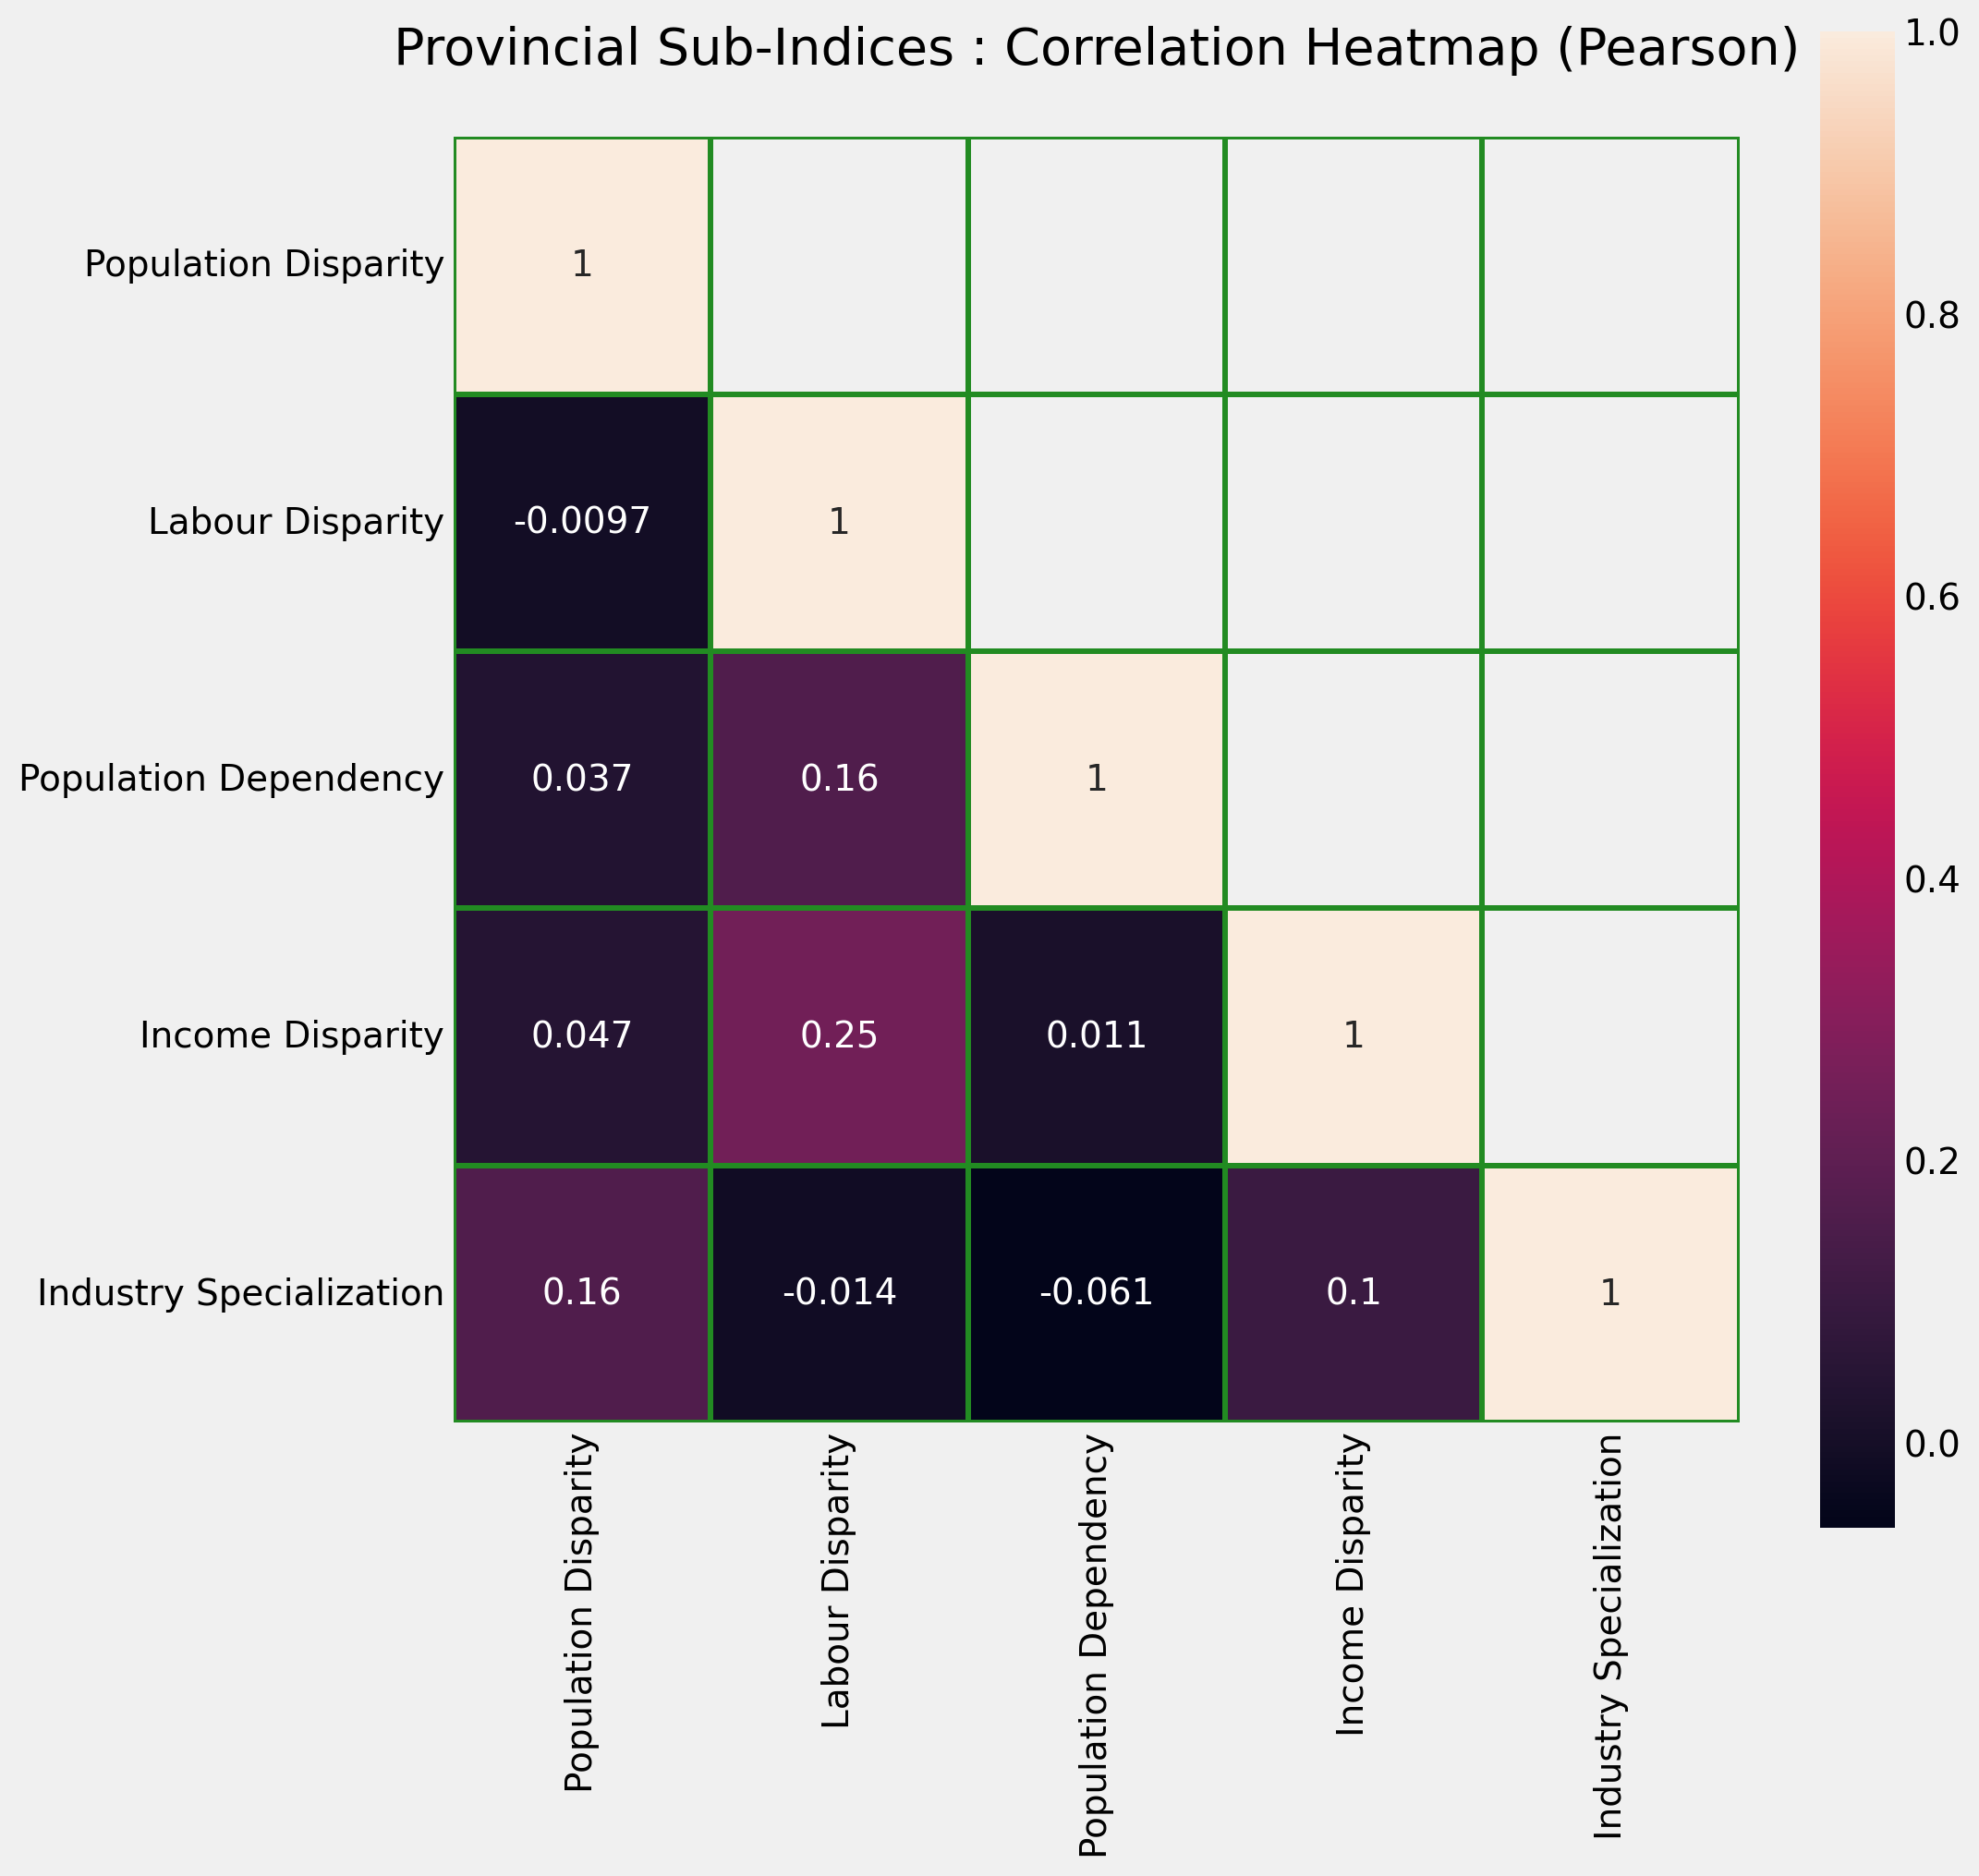

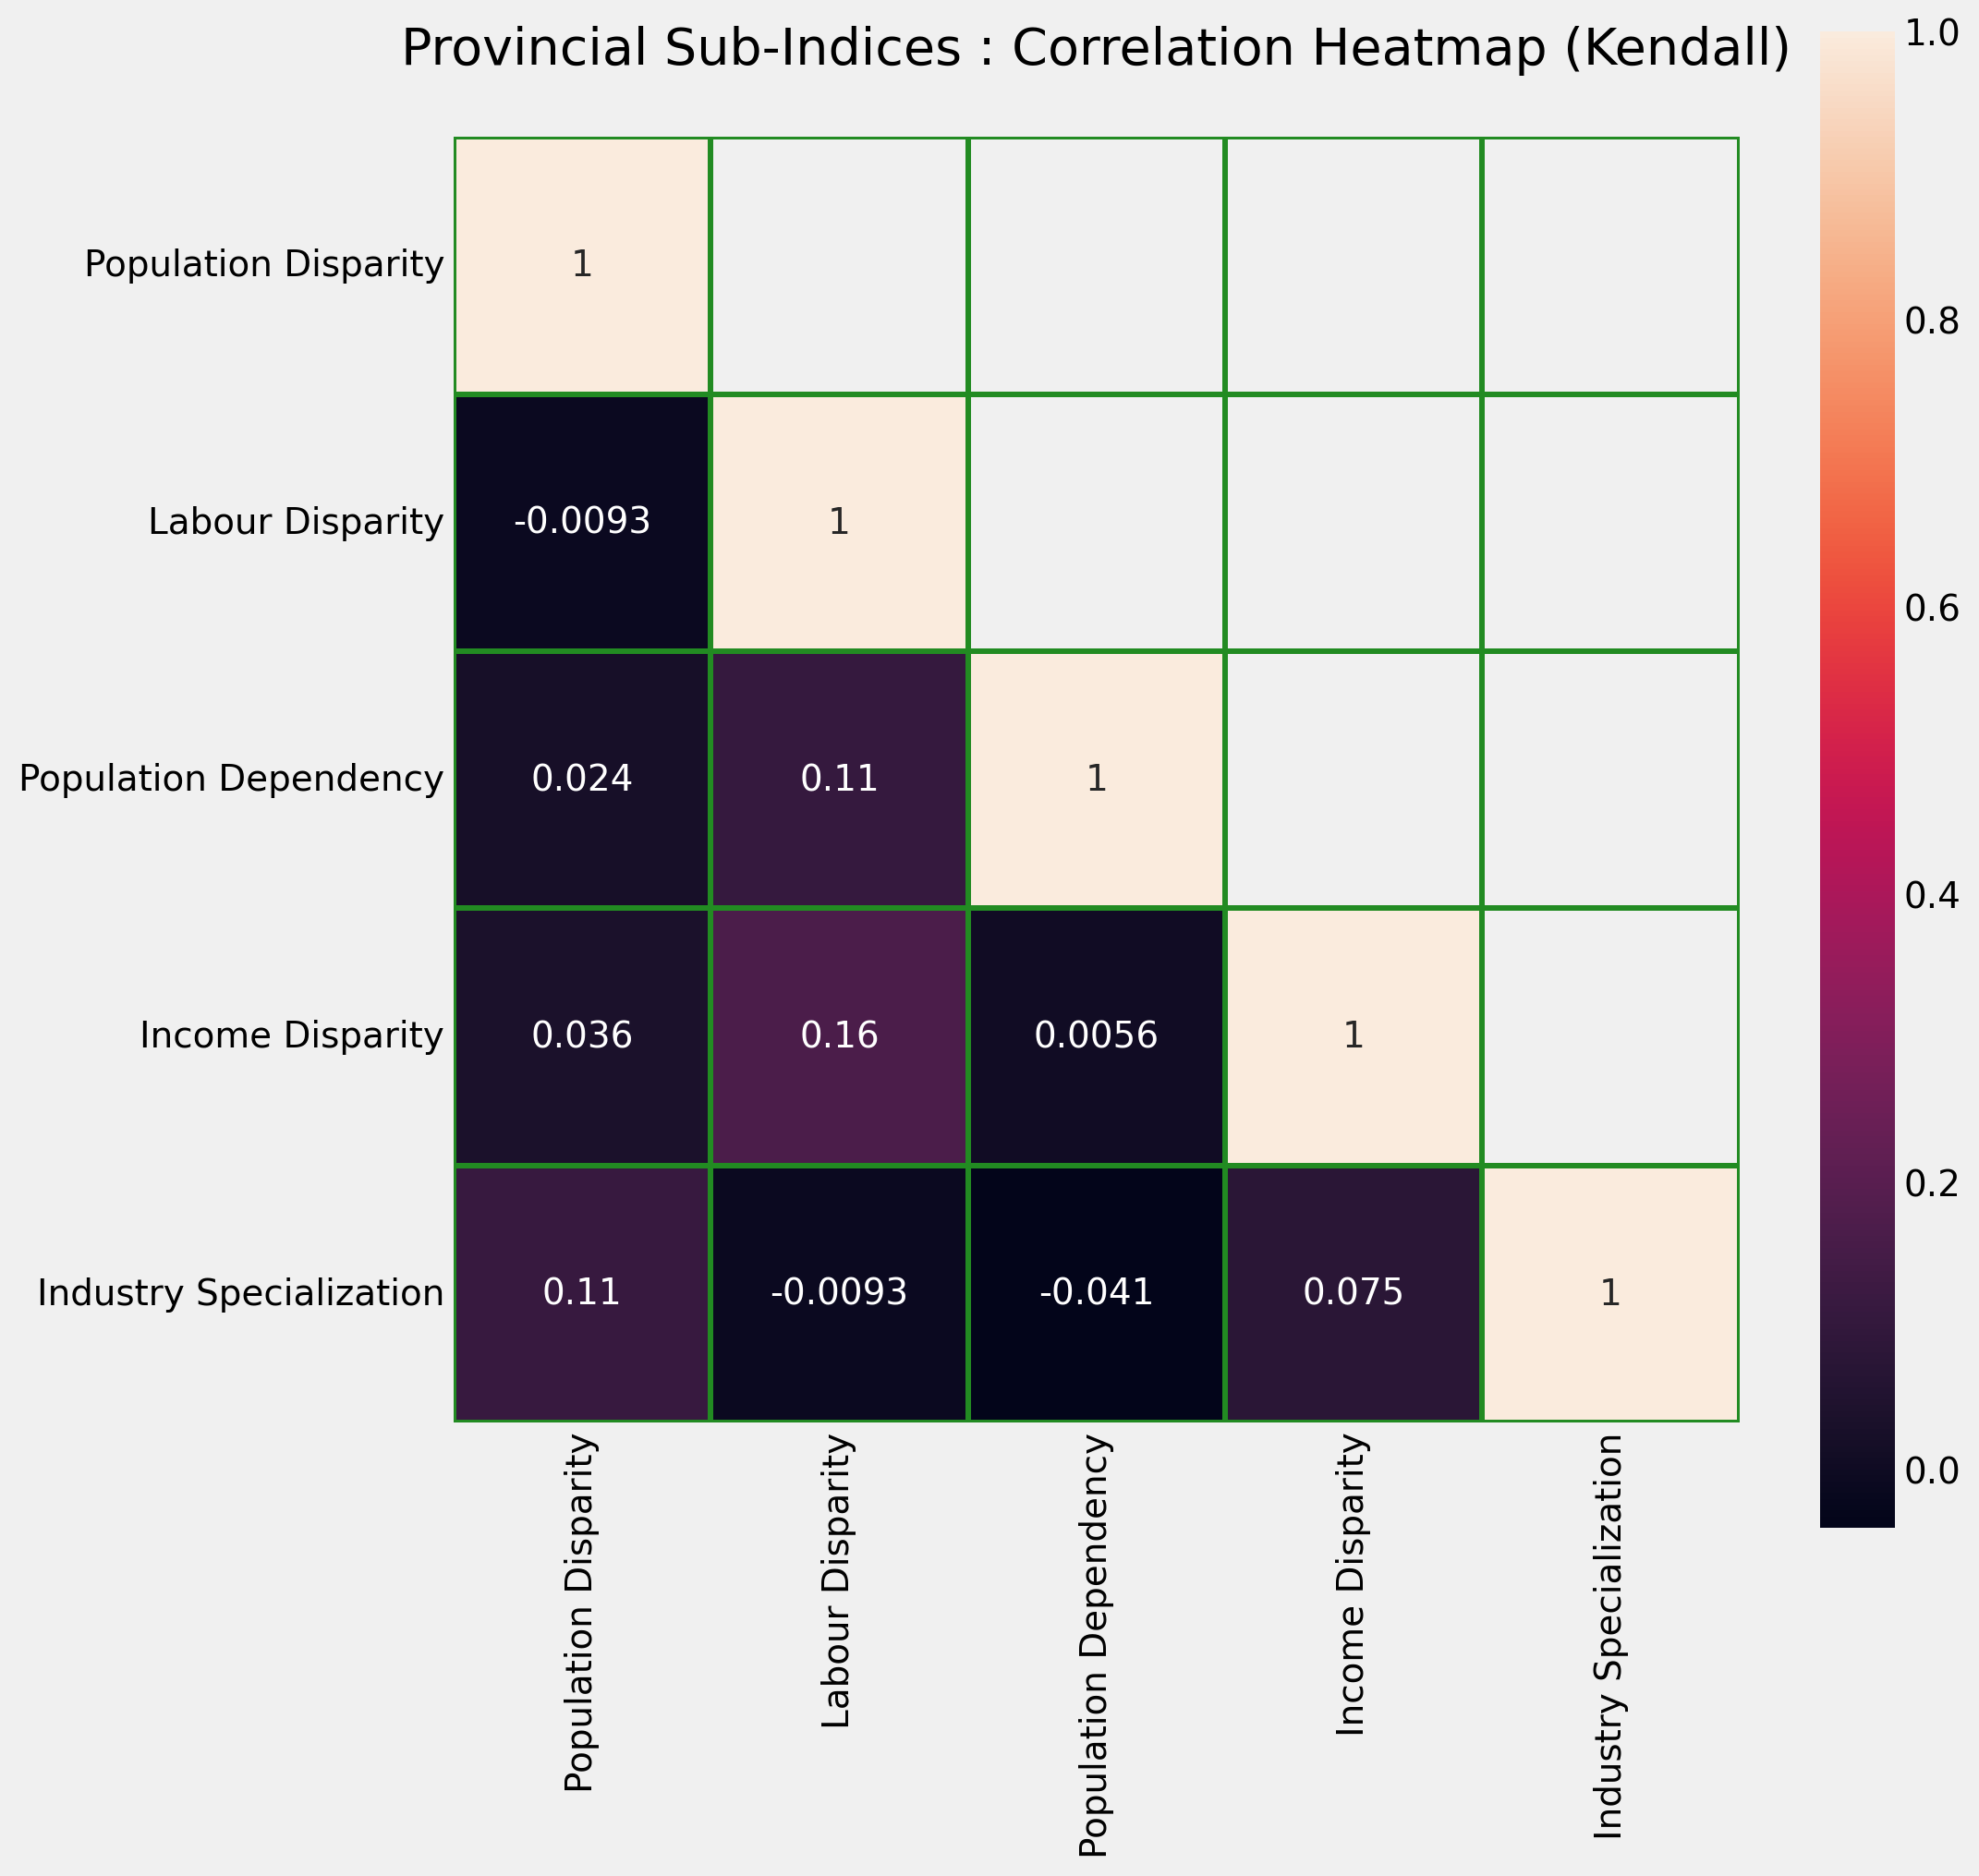

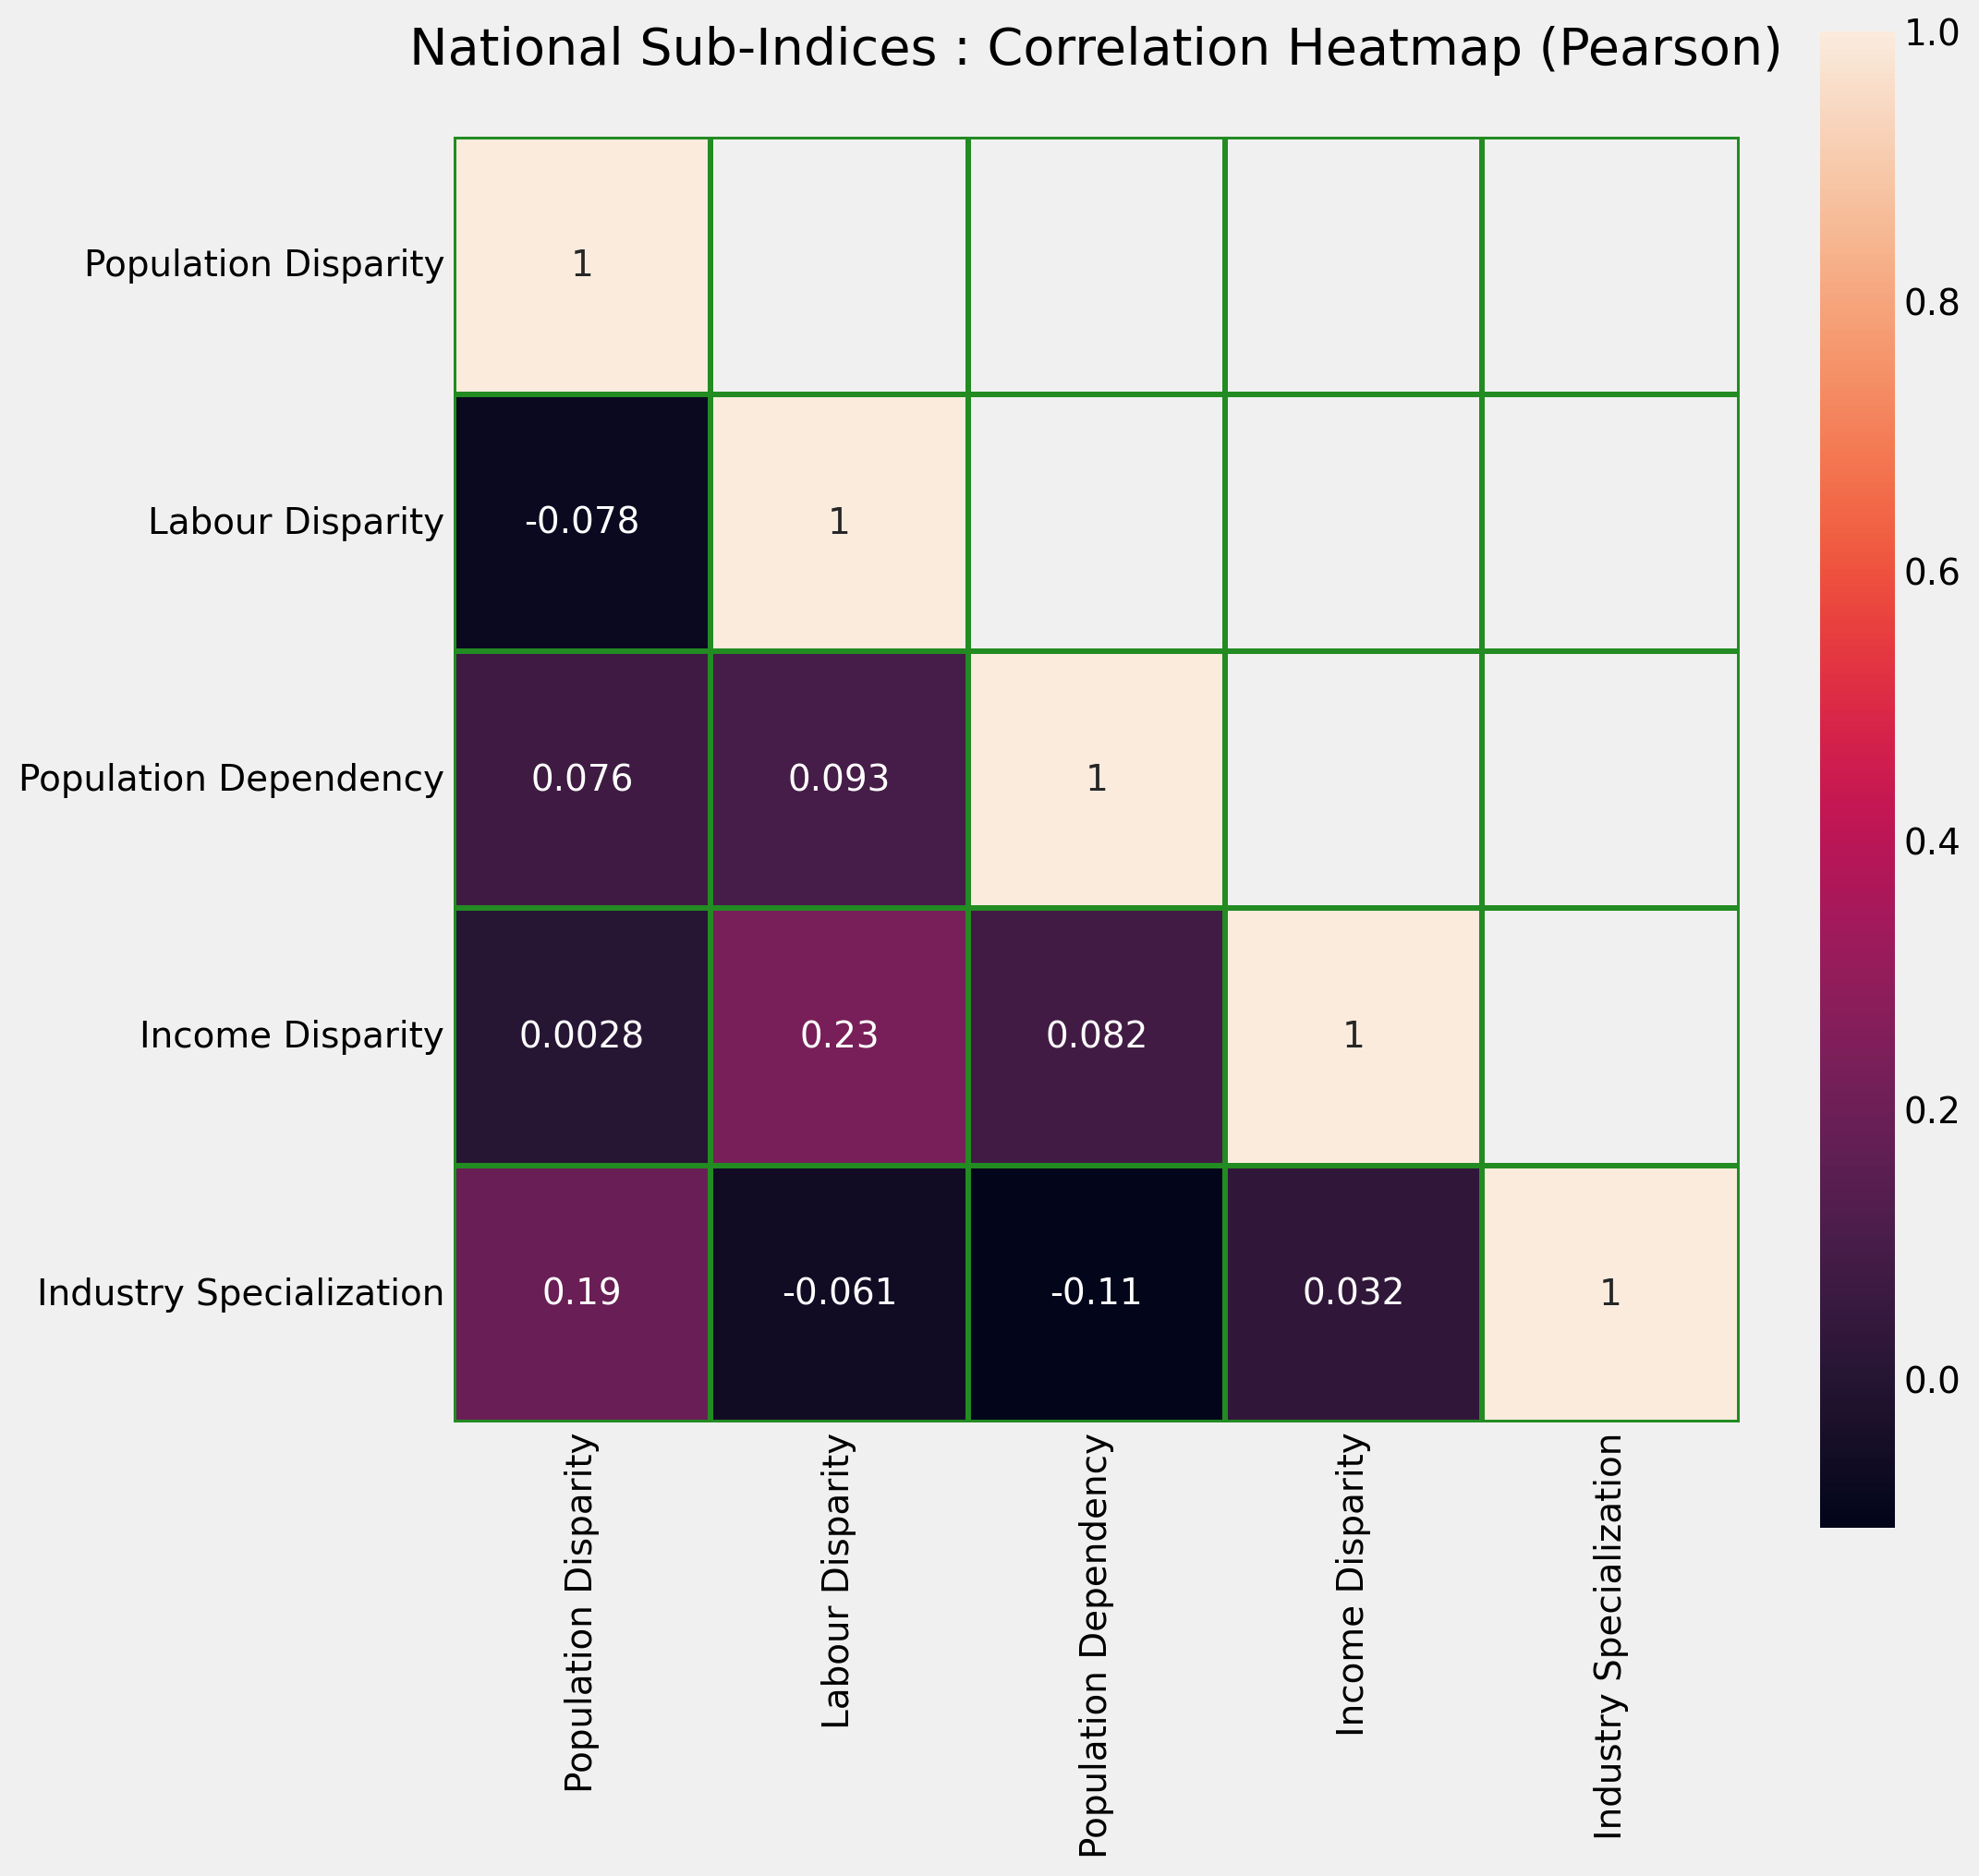

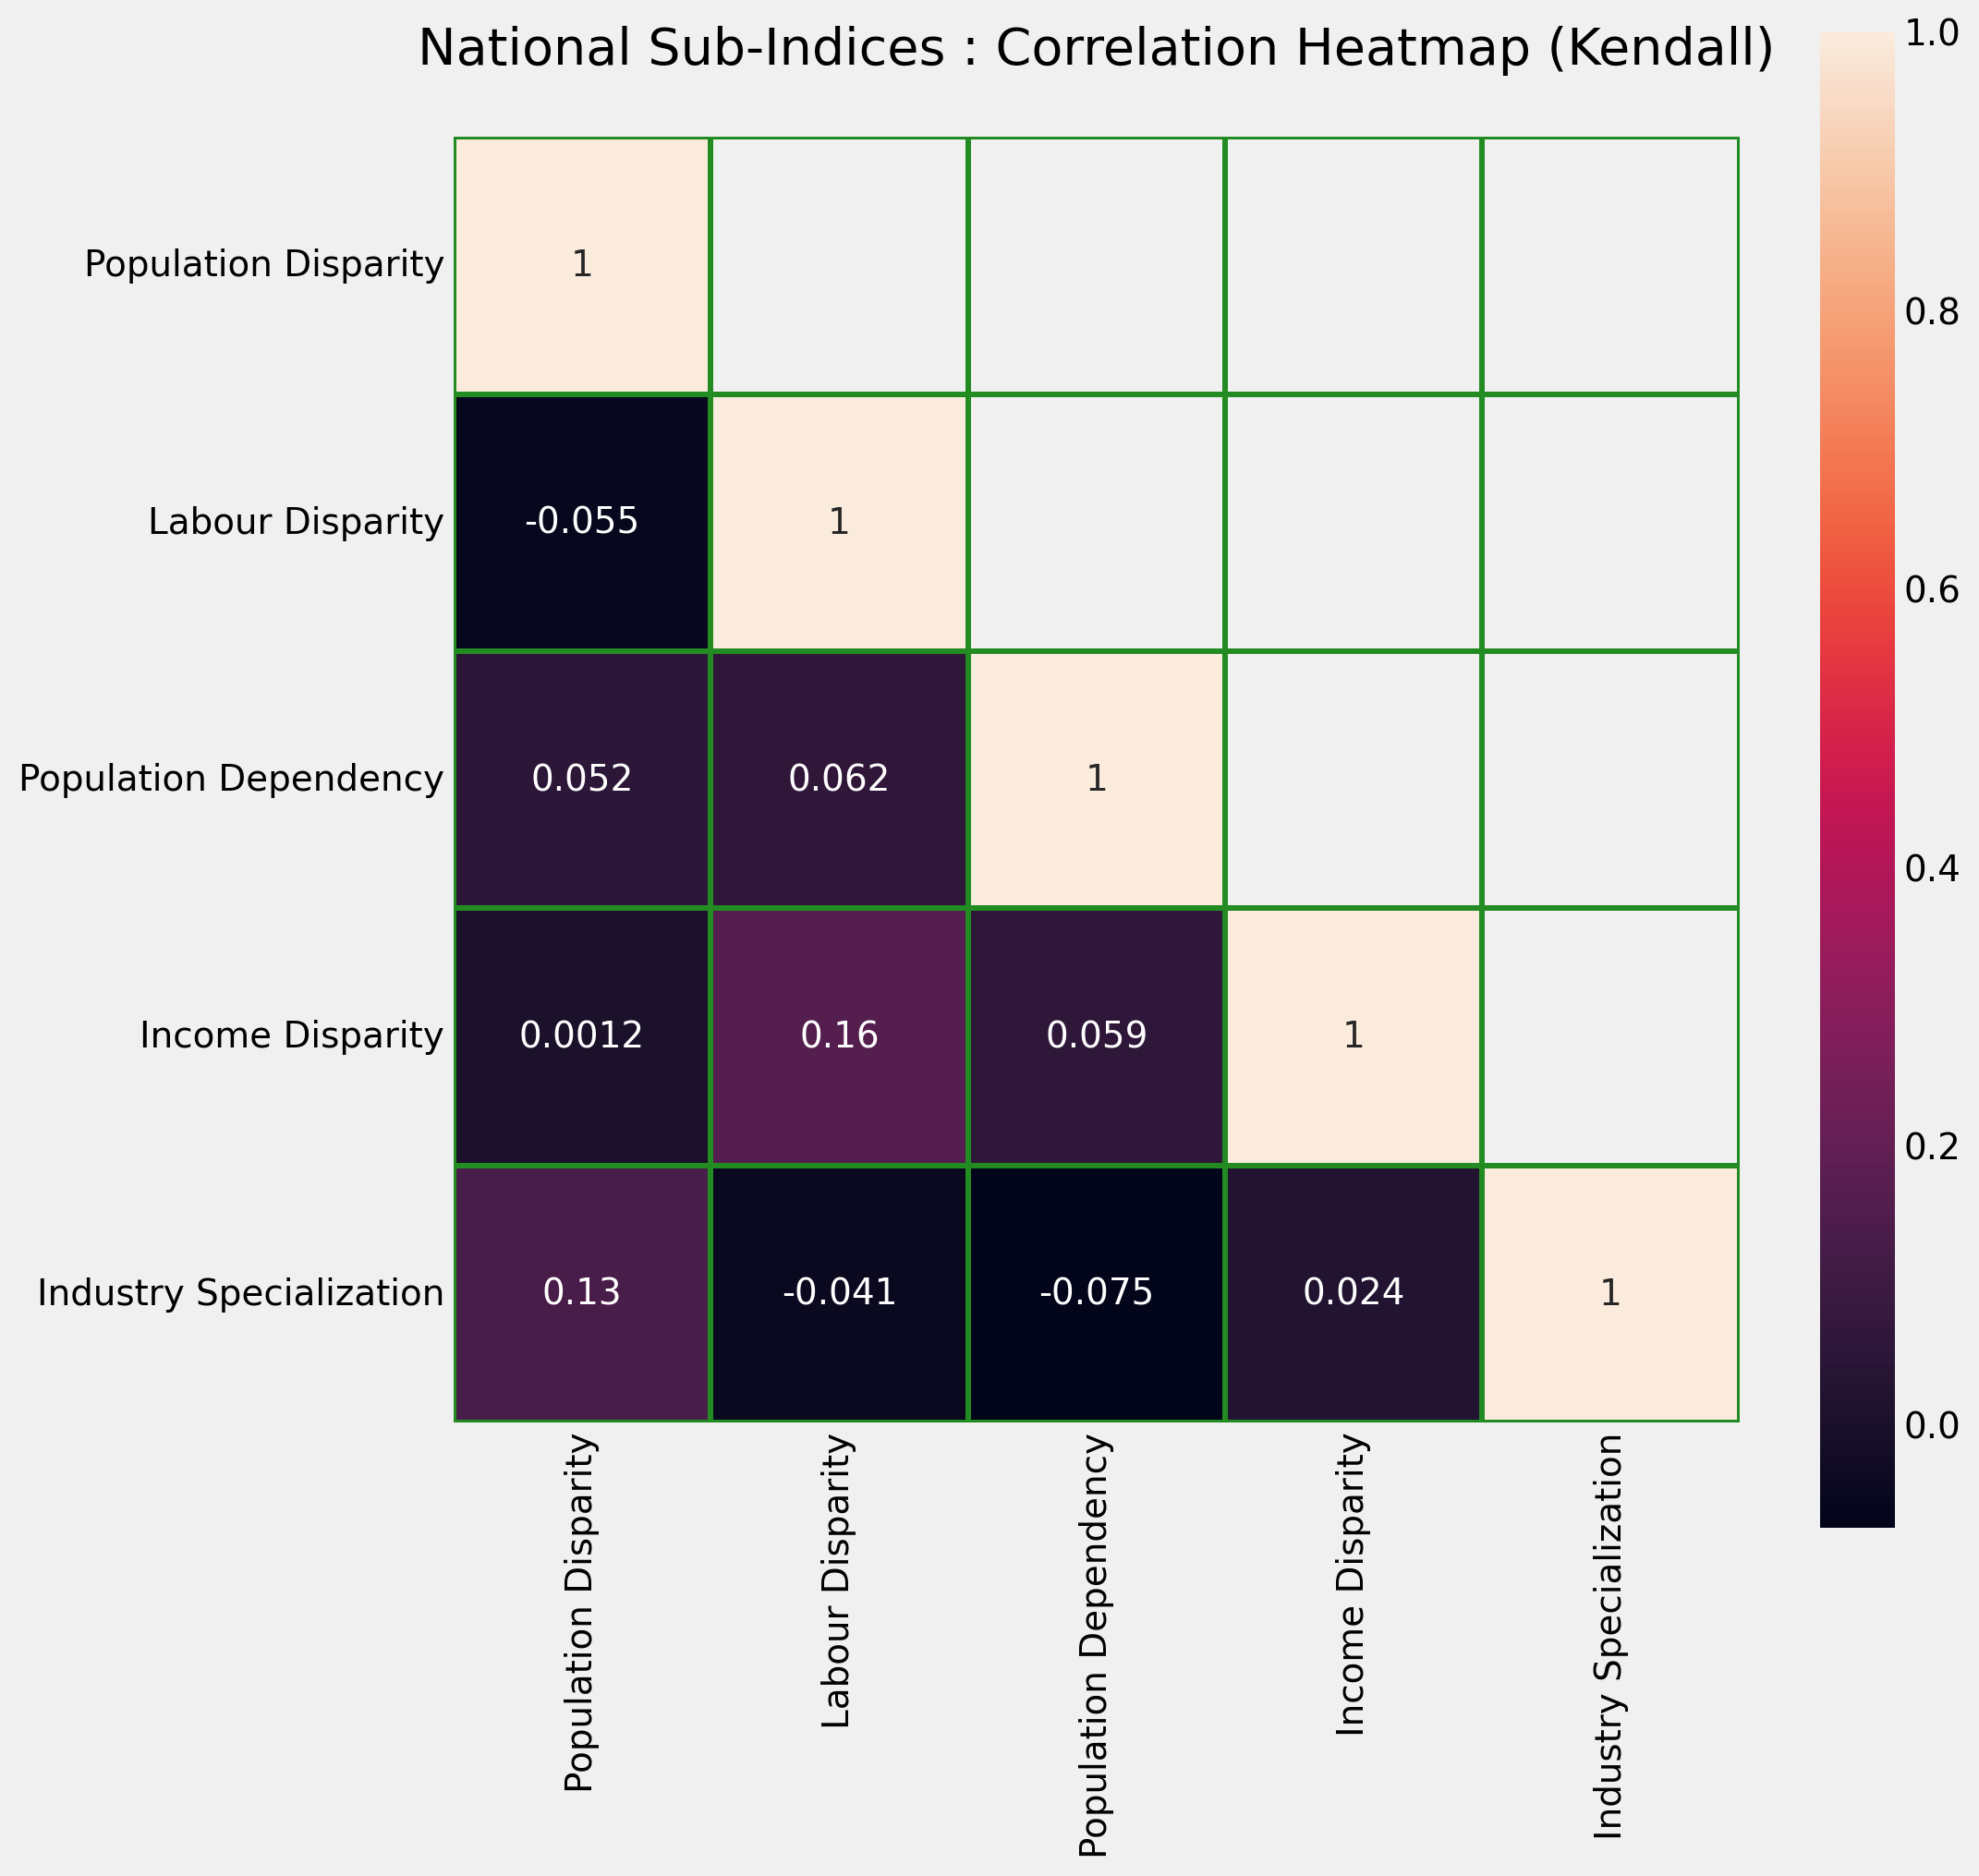

In [10]:
print('==== PROVINCIAL ====')
#PROVINCIAL
os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/ProvincialCSVOutput')
x = pd.read_csv('Synthetic_SubIndices_pv.csv')
x = x.set_index('csdcode')
x.columns = ['Population Disparity', 'Labour Disparity', 'Population Dependency', 'Income Disparity', 'Industry Specialization']
Var_Corr = x.corr(method='pearson')
Var_Corr
display(Var_Corr)
df_lt = Var_Corr.where(np.tril(np.ones(Var_Corr.shape)).astype(np.bool))

fig2, ax = plt.subplots(figsize=(10,10)) 
ax.set_title('Provincial Sub-Indices : Correlation Heatmap (Pearson)\n', fontsize=20)
C = sns.heatmap(df_lt, xticklabels=df_lt.columns, yticklabels=df_lt.columns, annot=True,
            square=True, linecolor="forestgreen", linewidths=2,)
display(C)

Var_Corr = x.corr(method='kendall')
Var_Corr
display(Var_Corr)
df_lt = Var_Corr.where(np.tril(np.ones(Var_Corr.shape)).astype(np.bool))

fig2, ax = plt.subplots(figsize=(10,10)) 
ax.set_title('Provincial Sub-Indices : Correlation Heatmap (Kendall)\n', fontsize=20)
C = sns.heatmap(df_lt, xticklabels=df_lt.columns, yticklabels=df_lt.columns, annot=True,
            square=True, linecolor="forestgreen", linewidths=2,)
display(C)

print('==== NATIONAL ====')
# NATIONAL:
os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/NationalCSVOutput')
x = pd.read_csv('Synthetic_SubIndices_ca.csv')
x = x.set_index('csdcode')
x.columns = ['Population Disparity', 'Labour Disparity', 'Population Dependency', 'Income Disparity', 'Industry Specialization']
Var_Corr = x.corr(method='pearson')
Var_Corr
display(Var_Corr)
df_lt = Var_Corr.where(np.tril(np.ones(Var_Corr.shape)).astype(np.bool))

fig2, ax = plt.subplots(figsize=(10,10)) 
ax.set_title('National Sub-Indices : Correlation Heatmap (Pearson)\n', fontsize=20)
C = sns.heatmap(df_lt, xticklabels=df_lt.columns, yticklabels=df_lt.columns, annot=True,
            square=True, linecolor="forestgreen", linewidths=2,)
display(C)

Var_Corr = x.corr(method='kendall')
Var_Corr
display(Var_Corr)
df_lt = Var_Corr.where(np.tril(np.ones(Var_Corr.shape)).astype(np.bool))

fig2, ax = plt.subplots(figsize=(10,10)) 
ax.set_title('National Sub-Indices : Correlation Heatmap (Kendall)\n', fontsize=20)
C = sns.heatmap(df_lt, xticklabels=df_lt.columns, yticklabels=df_lt.columns, annot=True,
            square=True, linecolor="forestgreen", linewidths=2,)
display(C)

## B. Equal Weight Composite Index:

In [11]:
def decline_index_e(region:str):
    '''
    Creates the Decline Index using Equal Weights:
    
    Drops the Income Score. Gives "Decline Index" score according to the following metric:
    
    score = 0.25*PopDecline + 0.25*PopDependency + 0.25*Industry + 0.25*LFP
    
    Score is converted to a five point scale: 
    
    =====
    SCORE 5: Scores in the 0.8 to 1 range. Heavy Decline, fragile economy.Immediate policy required.
    SCORE 4: Scores in the 0.6 to 0.8 range.
    SCORE 3: Scores in the 0.4 to 0.6 range range.
    SCORE 2: Scores in the 0.2 to 0.4 range.
    SCORE 1: Scores in the 0 to 0.2 range. Extremely sound economy. No decline or reason for worry.
    
    
    Enter variable (string) for region: either "National" or "Provincial"
    '''
    
    if region != 'National' and region != 'Provincial':
        print('Please enter a valid region')
    
    if region == 'National':
        suffix = 'ca'
        os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/NationalCSVOutput')
        csv = pd.read_csv('Synthetic_SubIndices_ca.csv')
        
    if region == 'Provincial':
        suffix = 'pv'
        os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/ProvincialCSVOutput')
        csv = pd.read_csv('Synthetic_SubIndices_pv.csv')
    
    csv = csv.set_index('csdcode')
    csv['DisparityScore'] = (0.25*csv['Population Disparity'] + 0.25* csv['Labour Disparity'] + 
                            0.25*csv['Population Dependency'] + 0.25*csv['Industry Specialization'])
    csv = csv.drop(columns=['Income Disparity'])
    
    ordinal = []
    for val in csv['DisparityScore']:
        if 0 <= val  and val < 0.2:
            score = 1
        elif 0.2 <= val  and val < 0.4:
            score = 2 
        elif 0.4 <= val  and val < 0.6:
            score = 3
        elif 0.6 <= val  and val < 0.8:
            score = 4
        elif 0.8 <= val  and val <= 1:
            score = 5
        elif math.isnan(val):
            score = math.nan
        
        ordinal.append(score)
    
    csv['Disparity Index'] = ordinal
    output = csv
    
    output.to_csv(path_or_buf= 'Disparity_Index_' + suffix + '.csv',  index=True)
    
    return 'Index Created at the ' + region + ' level'
    
    

In [12]:
decline_index_e('National')

'Index Created at the National level'

In [13]:
decline_index_e('Provincial')

'Index Created at the Provincial level'

## C. Factor Analysis Composite Index:

In [14]:
import sklearn.datasets
from factor_analyzer import FactorAnalyzer as FaZr

In [15]:
def factoranalysisweights(region):

    if region == 'National':
        suffix = 'Provincial Level'
        os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/NationalCSVOutput')
        csv = pd.read_csv('Synthetic_SubIndices_ca.csv')
    
    elif region == 'Provincial':
        suffix = 'National Level'
        os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/ProvincialCSVOutput')
        csv = pd.read_csv('Synthetic_SubIndices_pv.csv')
    elif region != 'Provincial' and region != 'National':
        print('Select a Valid Region')
        

    csv = csv.set_index('csdcode')
    csv = csv.drop(columns='Income Disparity')
    df = csv.dropna()

    fa = FaZr(n_factors=4, rotation='varimax')
    fa
    
    print("\nFACTOR ANALYSIS WEIGHTS for " + suffix)

    fa.fit(df)
    loadings = fa.loadings_
    ev, v = fa.get_eigenvalues()
    xvals = range(1, df.shape[1]+1)
    plt.scatter(xvals,ev)
    plt.plot(xvals, ev)
    plt.title('Eigenvalue Plot')
    plt.show()
    
    weights = pd.DataFrame.from_records(loadings)
    display(weights)


FACTOR ANALYSIS WEIGHTS for Provincial Level


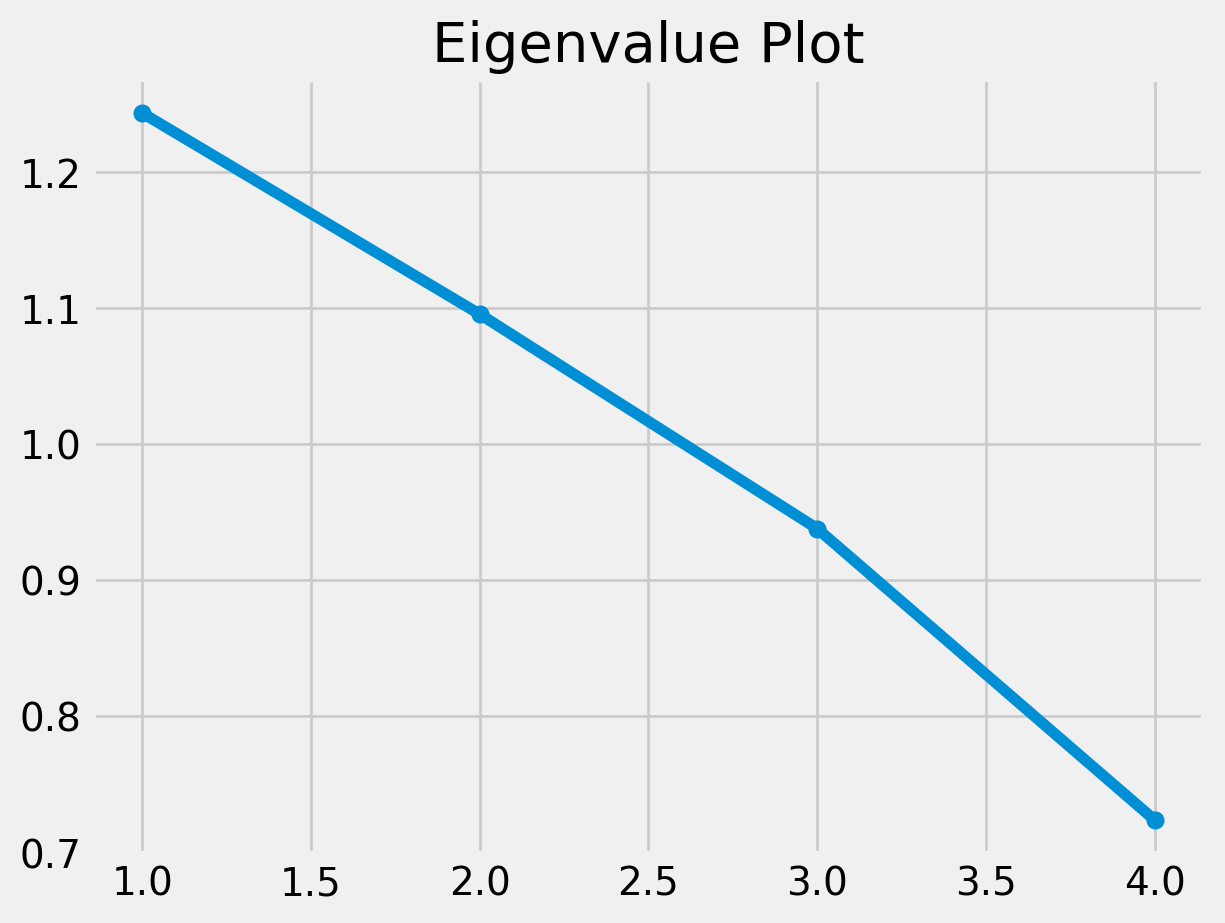

0         1         2    3
0  0.441726  0.286049 -0.206587  0.0
1 -0.066171  0.080132  0.362611  0.0
2 -0.053577  0.502359  0.135797  0.0
3  0.498441 -0.158317 -0.046034  0.0


FACTOR ANALYSIS WEIGHTS for National Level


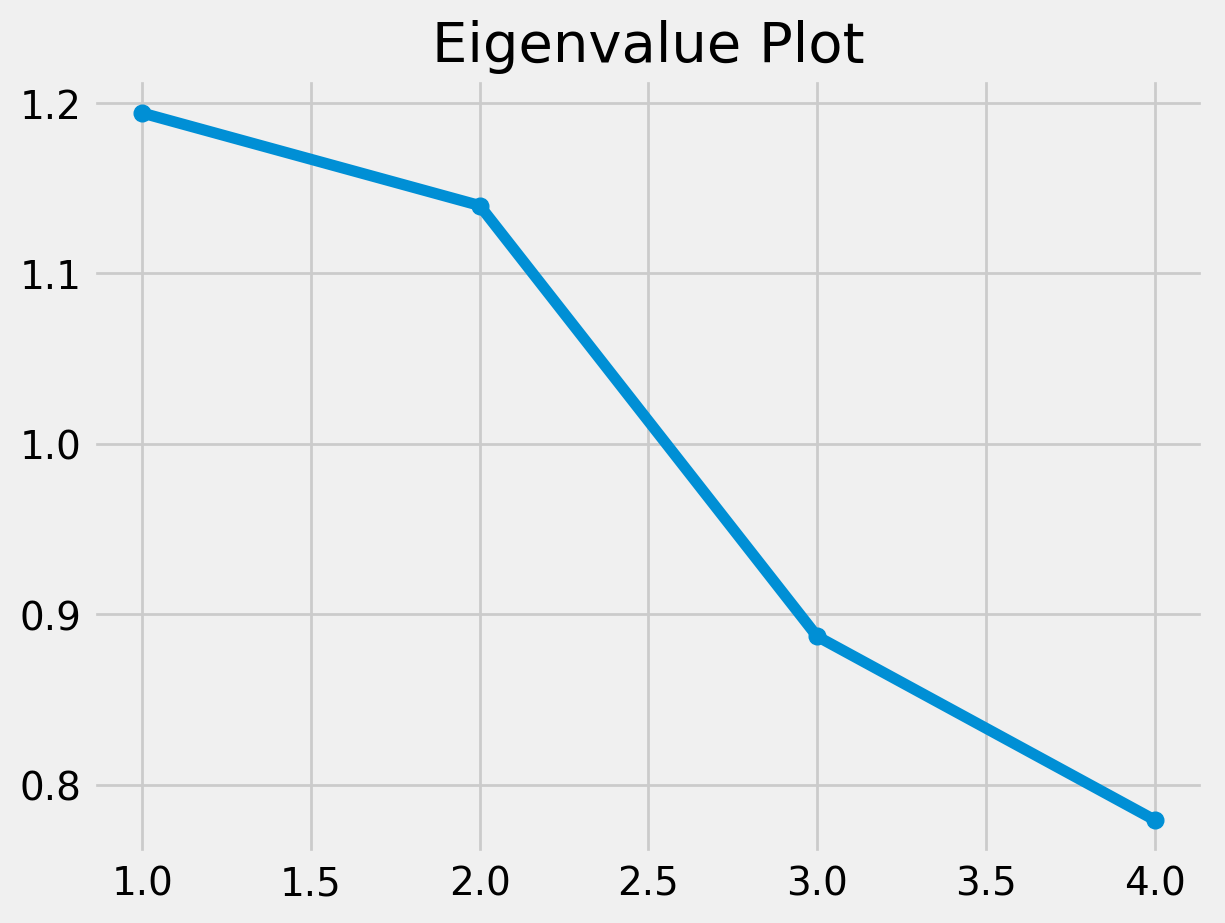

0         1         2    3
0  0.444473 -0.038176  0.133281  0.0
1 -0.016515  0.427330  0.086846  0.0
2  0.004838  0.301480  0.386070  0.0
3  0.426362  0.023626 -0.203624  0.0

In [16]:
factoranalysisweights('National')
factoranalysisweights('Provincial')

# 9. Statistical Analysis of Decline Index:



==========CANADA WIDE


csdcode  Population Disparity  Labour Disparity  Population Dependency  \
0     1001101              0.234455               NaN                    NaN   
1     1001105              0.967532          0.509290               0.119127   
2     1001113              0.969107          0.495131               0.496437   
3     1001120              0.972452          0.306694               0.586952   
4     1001124              0.487603          0.141090               0.555110   
...       ...                   ...               ...                    ...   
5077  6208068              0.875148               NaN                    NaN   
5078  6208073              0.224518          0.617808               0.052661   
5079  6208081              0.078906          0.709089               0.234246   
5080  6208087              0.078906          0.682113               0.300379   
5081  6208098              0.502853               NaN                    NaN   

      Industry Specialization  DisparityScore  Disparity Index  
0                         NaN             NaN              NaN  
1                    0.793181        0.597283              3.0  
2                    0.665769        0.656611              4.0  
3                    0.947959        0.703514              4.0  
4                    0.111485        0.323822              2.0  
...                       ...             ...              ...  
5077                      NaN             NaN              NaN  
5078                 0.875953        0.442735              3.0  
5079                 0.580978        0.400805              3.0  
5080                 0.111485        0.293221              2.0  
5081                      NaN             NaN              NaN  

[5082 rows x 7 columns]



==========PROVINCE WIDE


csdcode  Population Disparity  Labour Disparity  Population Dependency  \
0     1001101              0.118598               NaN                    NaN   
1     1001105              0.951482          0.547278               0.062500   
2     1001113              0.964960          0.613181               0.303977   
3     1001120              0.986523          0.424785               0.505682   
4     1001124              0.169811          0.197708               0.326705   
...       ...                   ...               ...                    ...   
5077  6208068              0.951613               NaN                    NaN   
5078  6208073              0.645161          0.640000               0.160000   
5079  6208081              0.274194          0.800000               0.600000   
5080  6208087              0.274194          0.760000               0.800000   
5081  6208098              0.709677               NaN                    NaN   

      Industry Specialization  DisparityScore  Disparity Index  
0                         NaN             NaN              NaN  
1                    0.687679        0.562235              3.0  
2                    0.481375        0.590873              3.0  
3                    0.905444        0.705608              4.0  
4                    0.051576        0.186450              1.0  
...                       ...             ...              ...  
5077                      NaN             NaN              NaN  
5078                 0.720000        0.541290              3.0  
5079                 0.320000        0.498548              3.0  
5080                 0.040000        0.468548              3.0  
5081                      NaN             NaN              NaN  

[5082 rows x 7 columns]


				======RAW SCORE STATISTICS=========


======DESCRIPTIVE STATISTICS=======
///////	Raw Disparity Scores - Canada


count    4301.000000
mean        0.494166
std         0.139008
min         0.072446
25%         0.391088
50%         0.488773
75%         0.592639
max         0.919177
Name: DisparityScore, dtype: float64

///////	Raw Disparity Scores - Provincial


count    4301.000000
mean        0.494552
std         0.142091
min         0.087158
25%         0.390974
50%         0.491226
75%         0.593841
max         0.931086
Name: DisparityScore, dtype: float64

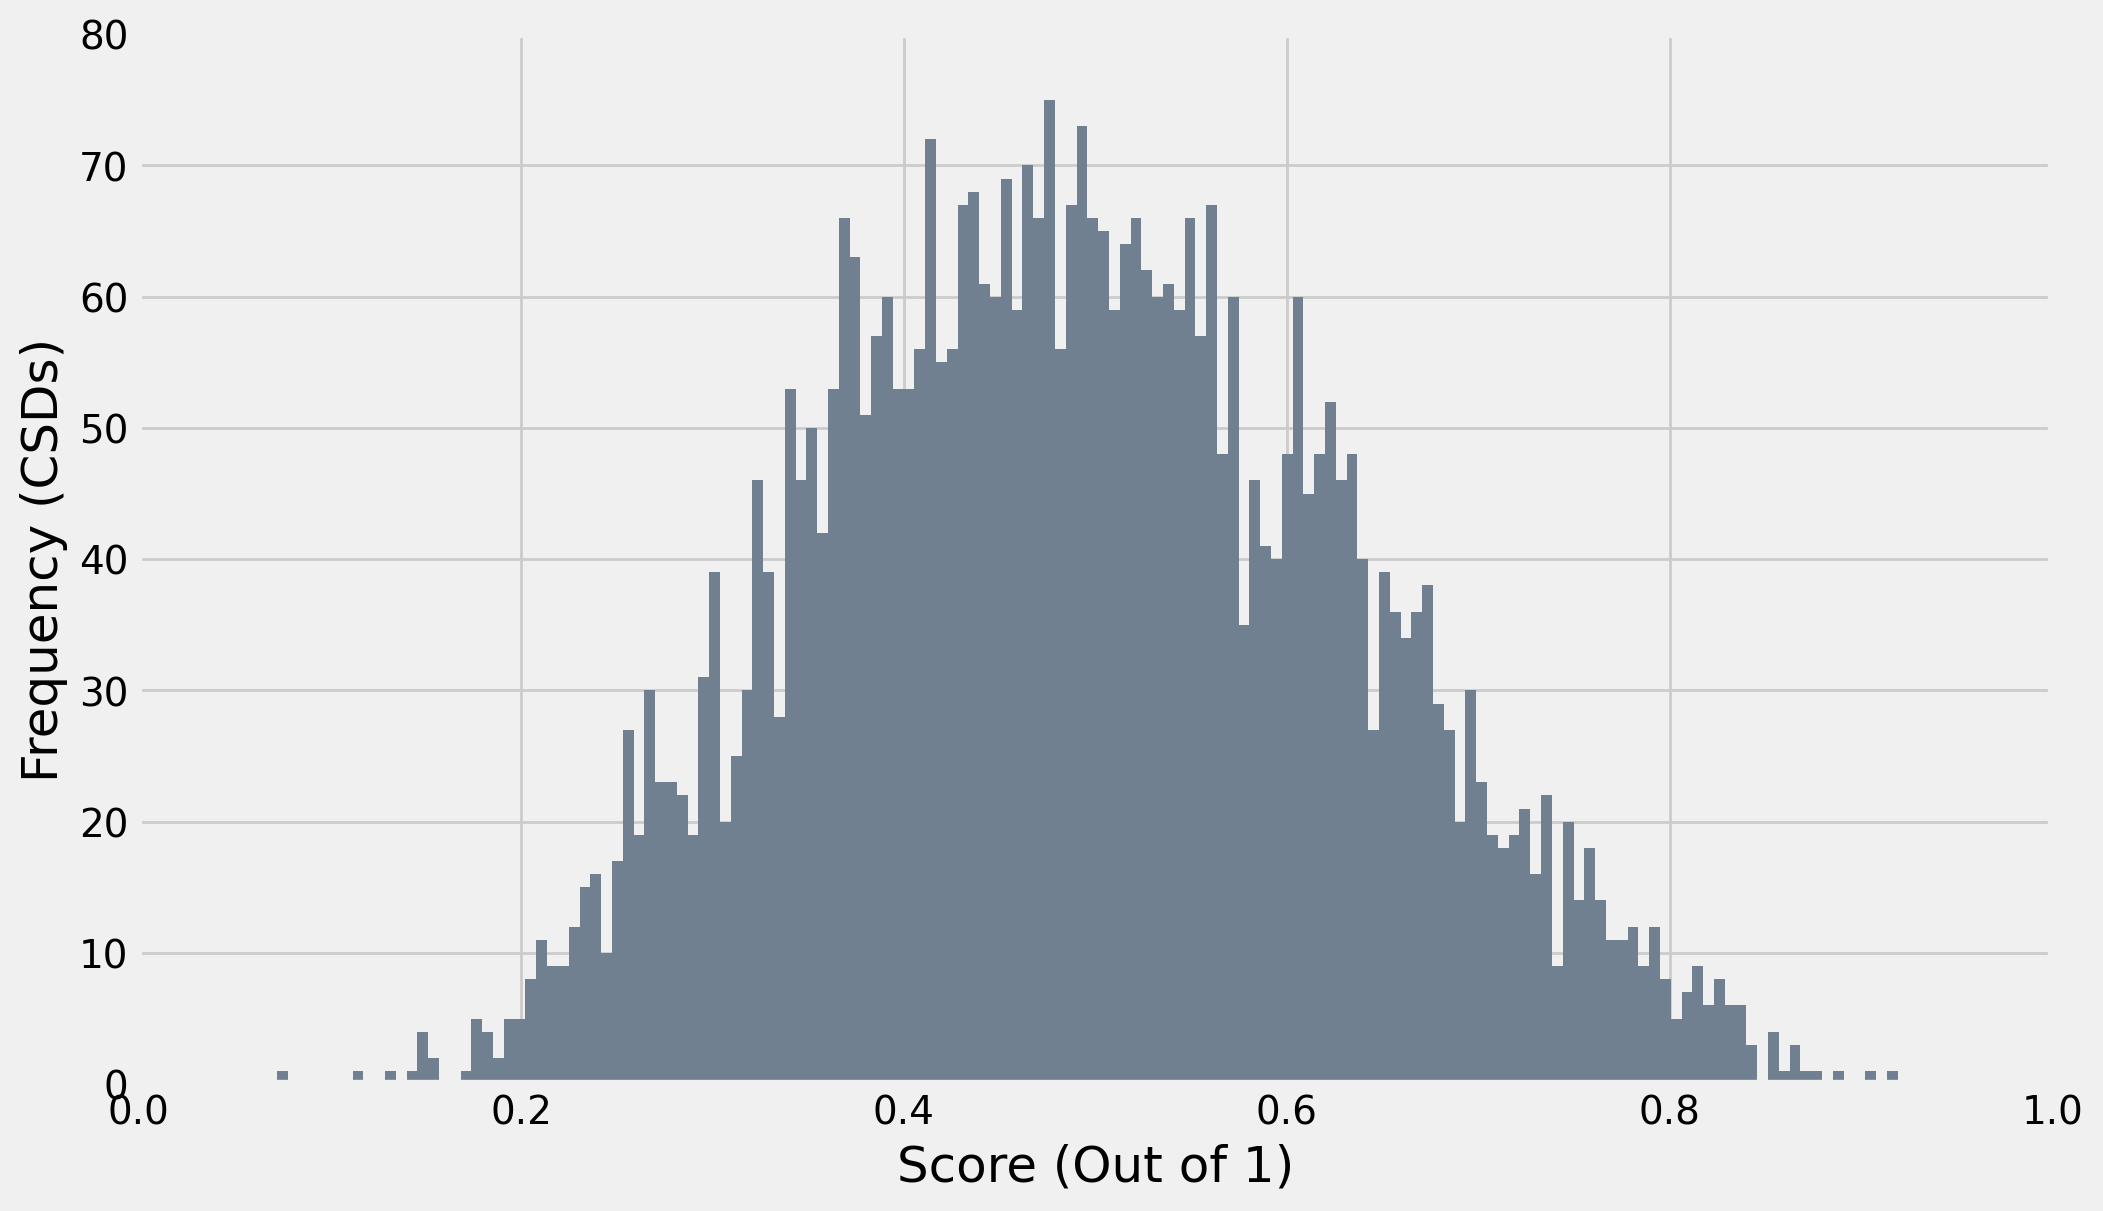

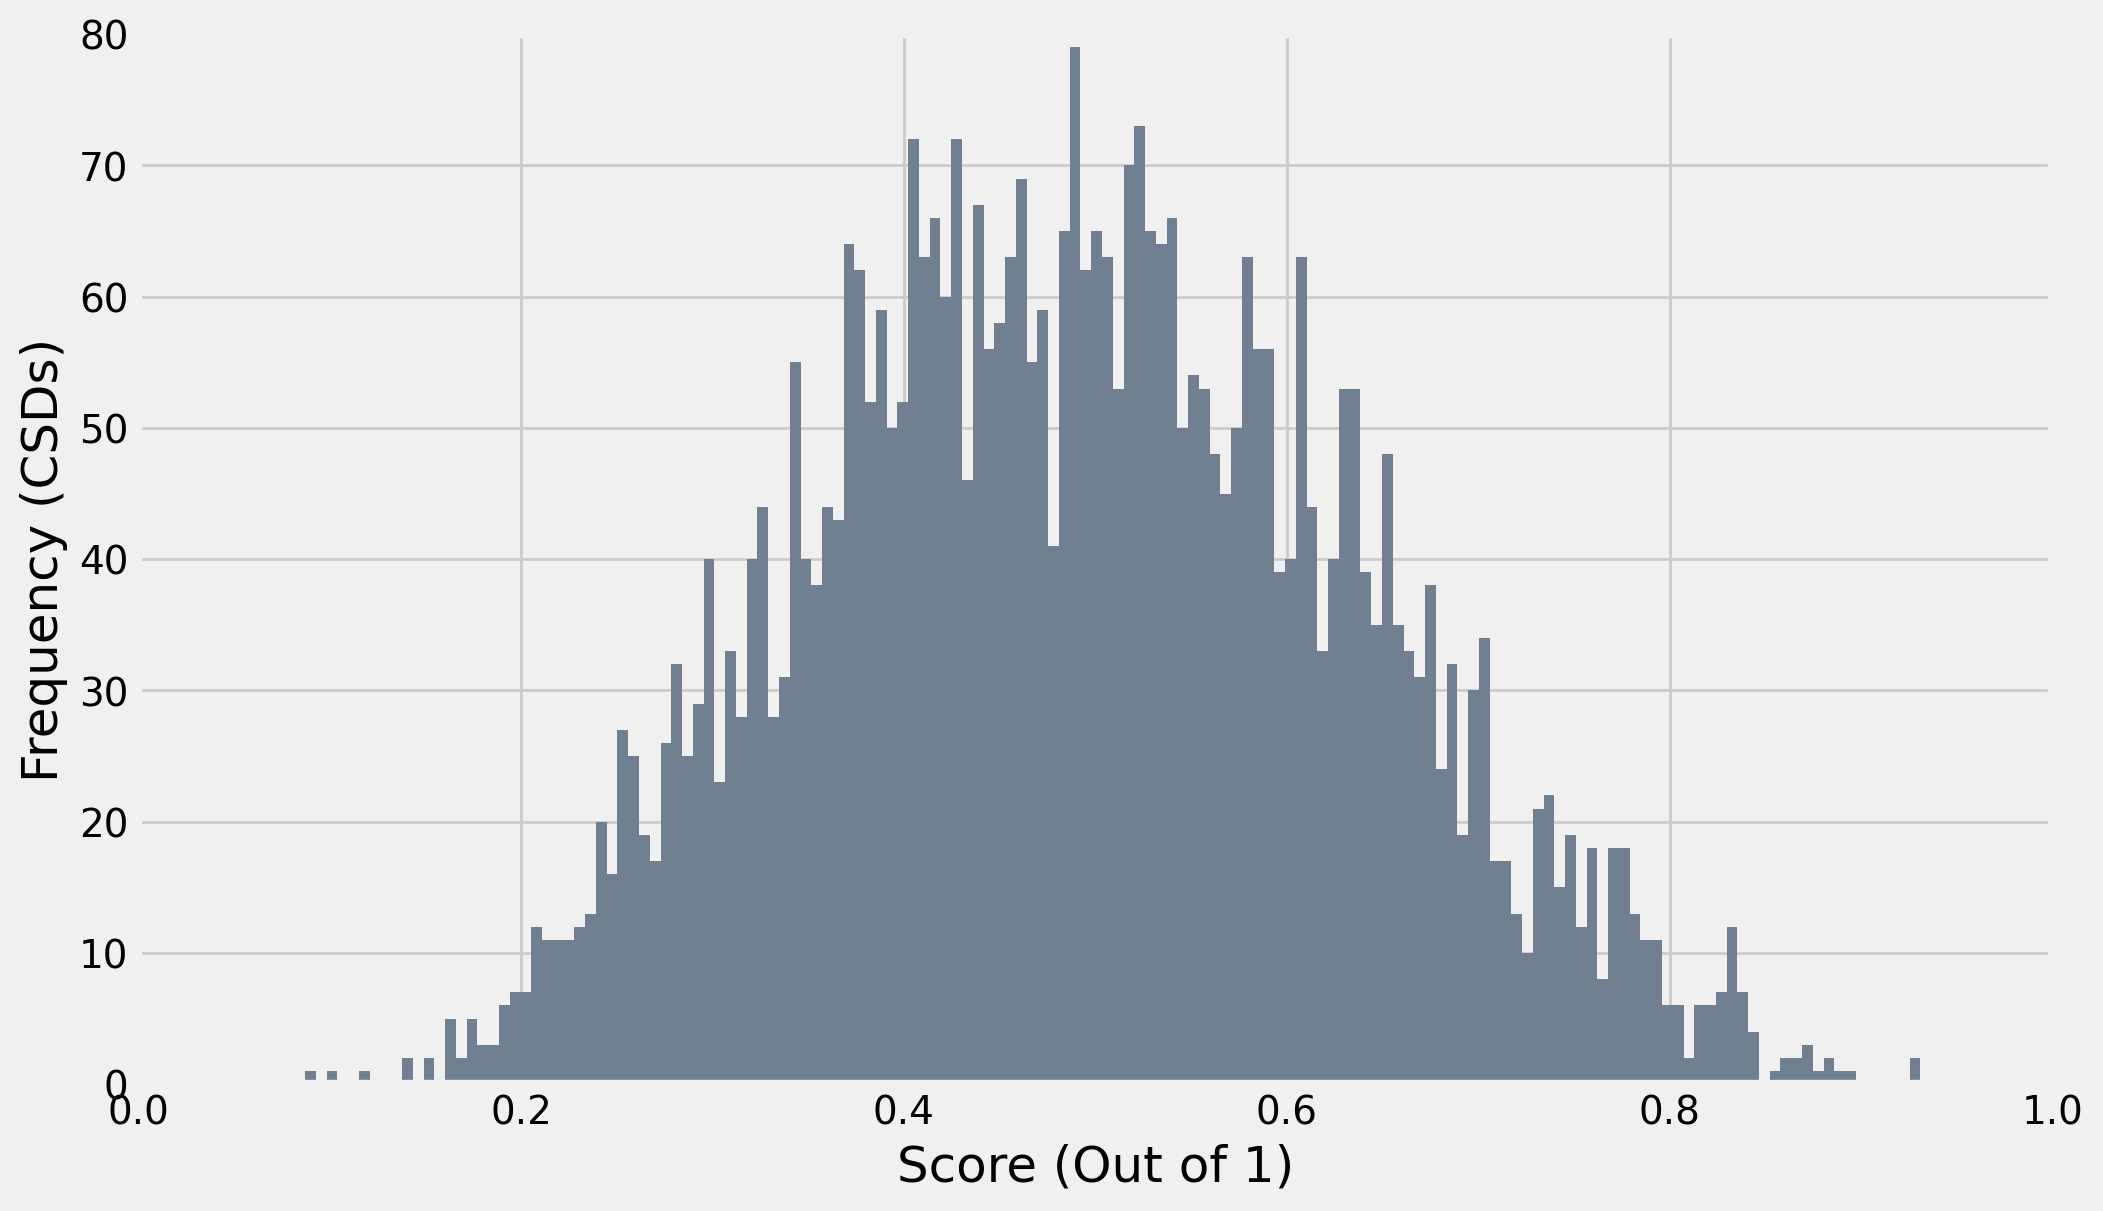


				======FINAL INDEX STATISTICS======


======DESCRIPTIVE STATISTICS=======
///////	 Index Scores - Canada


count    4301.000000
mean        2.976285
std         0.755073
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: Disparity Index, dtype: float64

///////	 Index Scores - Provincial


count    4301.000000
mean        2.977912
std         0.764458
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: Disparity Index, dtype: float64

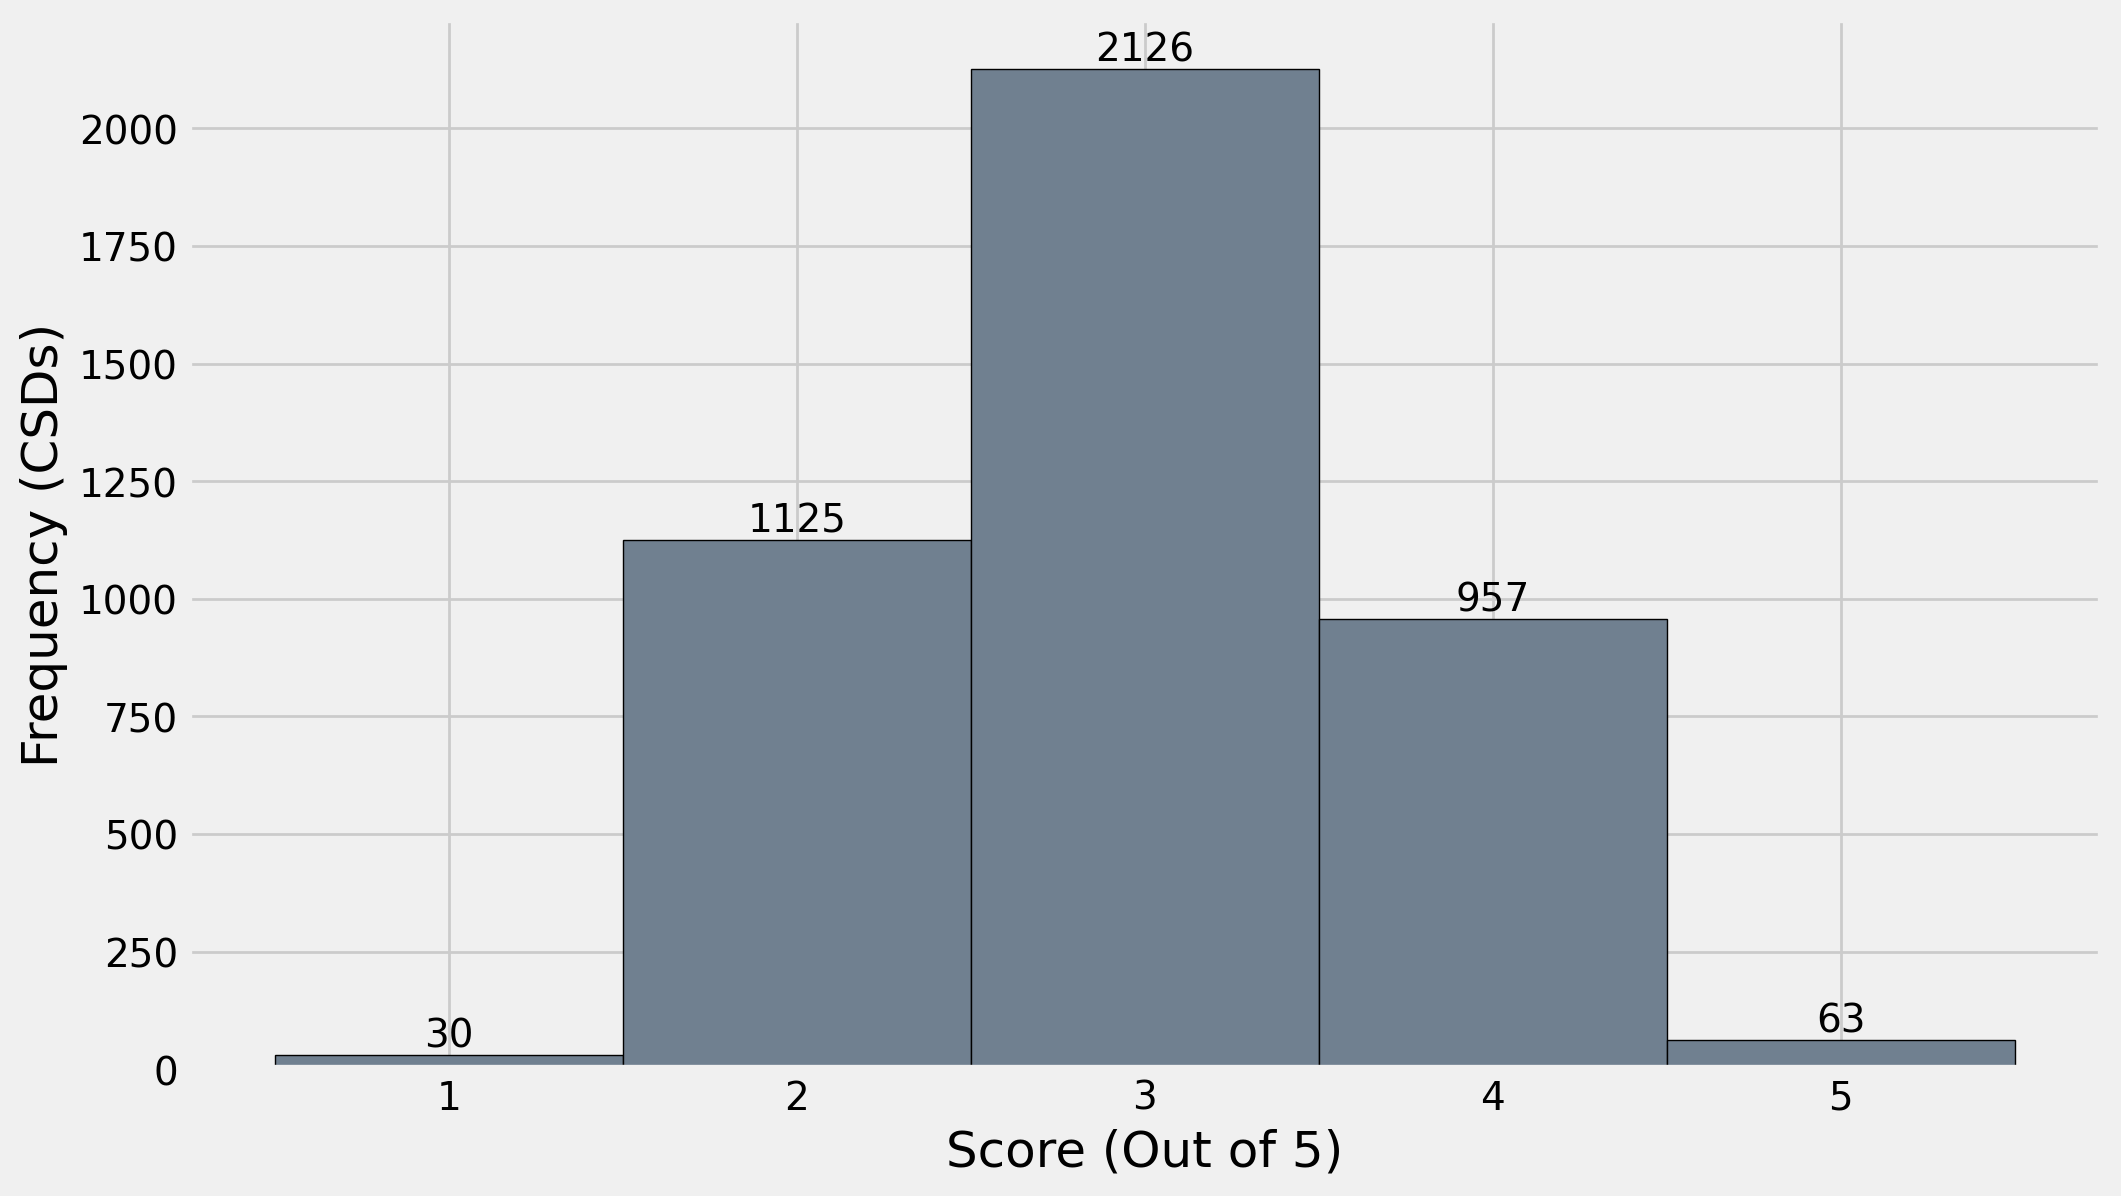

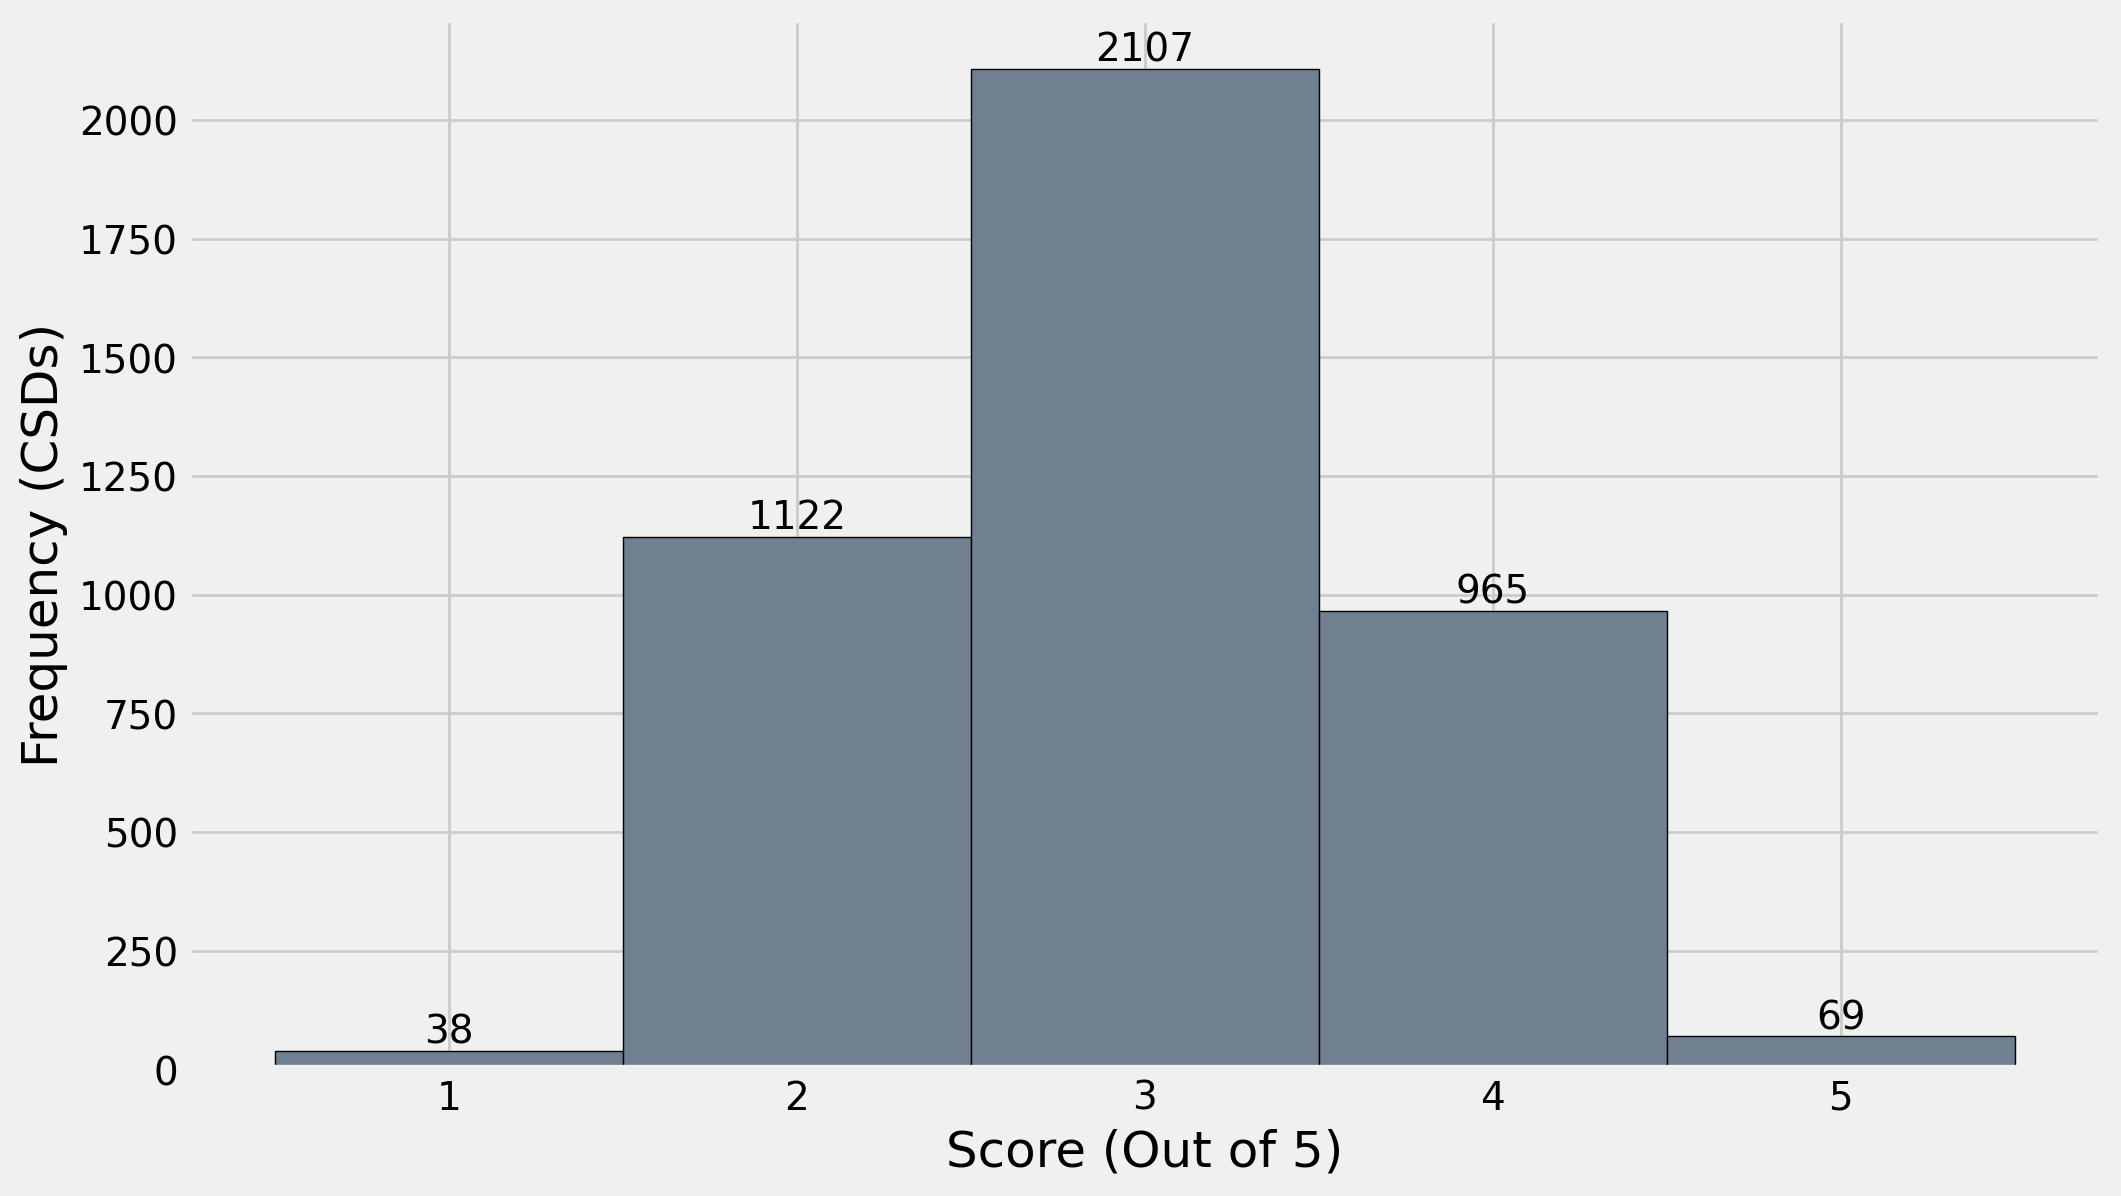

In [17]:
os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/NationalCSVOutput')
canadadex = pd.read_csv('Disparity_Index_ca.csv')

os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/ProvincialCSVOutput')
provincedex = pd.read_csv('Disparity_Index_pv.csv')

print('\n\n==========CANADA WIDE')
display(canadadex)
print('\n\n==========PROVINCE WIDE')
display(provincedex)

#===========================================================
# PART 1: Descriptive Stats and Plot Distribution of Scores:
#===========================================================

print('\n\t\t\t\t===================================')
print('\t\t\t\t======RAW SCORE STATISTICS=========')
print('\t\t\t\t===================================\n\n')


raw_c = canadadex['DisparityScore']
raw_p = provincedex['DisparityScore']


print('===================================')
print('======DESCRIPTIVE STATISTICS=======')
print('===================================')

print('///////\tRaw Disparity Scores - Canada')
descriptivestats1 = raw_c.describe()
display(descriptivestats1)
print('///////\tRaw Disparity Scores - Provincial')
descriptivestats2 = raw_p.describe()
display(descriptivestats2)

rawcplot = raw_c.dropna()
fig1, ax1 = plt.subplots(figsize=(11,7))
ax1.hist(rawcplot, 150, color='slategrey', label='Data')
#ax1.set_title('Disparity Scores - \n(Underlying Percentiles Relative to Canada)', fontsize=18)
ax1.set_ylabel('Frequency (CSDs)', fontsize=18)
plt.xlim(xmin=0, xmax = 1)
plt.ylim(ymax=80)
ax1.set_xlabel('Score (Out of 1)', fontsize=18)
plt.subplots_adjust(bottom=0.15, top=0.9)
fig1.savefig('/Users/DNW/Dropbox/Rural Data Project - RA/Documentation/Results/April 2023 (Final) Results/canscores.png',
            dpi=300)

rawpplot = raw_p.dropna()
fig2, ax1 = plt.subplots(figsize=(11,7))
ax1.hist(rawpplot, 150, color='slategrey', label='Data')
#ax1.set_title('Disparity Scores - \n(Underlying Percentiles Relative to Provinces)', fontsize=18)
ax1.set_ylabel('Frequency (CSDs)', fontsize=18)
ax1.set_xlabel('Score (Out of 1)', fontsize=18)
plt.xlim(xmin=0, xmax = 1)
plt.ylim(ymax=80)
plt.subplots_adjust(bottom=0.15, top=0.9)
fig2.savefig('/Users/DNW/Dropbox/Rural Data Project - RA/Documentation/Results/April 2023 (Final) Results/prvscores.png',
            dpi=300)
plt.show()

#===========================================================
# PART 2: Descriptive Stats and Plot Distribution of Index:
#===========================================================

print('\n\t\t\t\t===================================')
print('\t\t\t\t======FINAL INDEX STATISTICS======')
print('\t\t\t\t===================================\n\n')

index_c = canadadex['Disparity Index']
index_p = provincedex['Disparity Index']

five_c = 0
four_c= 0
three_c= 0
two_c= 0
one_c= 0
five_p= 0
four_p= 0
three_p= 0
two_p= 0
one_p= 0
for c, p in zip(index_c, index_p):
    if c==5:
        five_c +=1
    if c==4:
        four_c +=1
    if c==3:
        three_c +=1
    if c==2:
        two_c +=1
    if c==1:
        one_c +=1
    if p==5:
        five_p +=1
    if p==4:
        four_p +=1
    if p==3:
        three_p +=1
    if p==2:
        two_p +=1
    if p==1:
        one_p +=1
plist = [one_p, two_p, three_p, four_p, five_p]
clist = [one_c, two_c, three_c, four_c, five_c]

print('===================================')
print('======DESCRIPTIVE STATISTICS=======')
print('===================================')

print('///////\t Index Scores - Canada')
descriptivestats3 = index_c.describe()
display(descriptivestats3)
print('///////\t Index Scores - Provincial')
descriptivestats4 = index_p.describe()
display(descriptivestats4)

bin_edges = np.arange(0.5, 5.5+1, 1)

indexcplot = index_c.dropna()
fig1, ax1 = plt.subplots(figsize=(11,7))
ax1.hist(indexcplot, bins = bin_edges, color='slategrey',edgecolor='black', label='Data', range=[1,5])
#ax1.set_title('Disparity Index - \n(Underlying Percentiles Relative to Canada)', fontsize=18)
ax1.set_ylabel('Frequency (CSDs)', fontsize=18)
ax1.set_xlabel('Score (Out of 5)', fontsize=18)
rects = ax1.patches
labels = [num for num in clist]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')
plt.subplots_adjust(bottom=0.15, top=0.9)
fig1.savefig('/Users/DNW/Dropbox/Rural Data Project - RA/Documentation/Results/April 2023 (Final) Results/canindex.png',
            dpi=300)
plt.show()

indexpplot = index_p.dropna()
fig2, ax1 = plt.subplots(figsize=(11,7))
ax1.hist(indexpplot, bins = bin_edges, color='slategrey',edgecolor='black', label='Data')
#ax1.set_title('Disparity Index - \n(Underlying Percentiles Relative to Provinces)', fontsize=18)
ax1.set_ylabel('Frequency (CSDs)', fontsize=18)
ax1.set_xlabel('Score (Out of 5)', fontsize=18)
rects = ax1.patches
labels = [num for num in plist]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')
plt.subplots_adjust(bottom=0.15, top=0.9)
fig2.savefig('/Users/DNW/Dropbox/Rural Data Project - RA/Documentation/Results/April 2023 (Final) Results/prvindex.png',
            dpi=300)

plt.show()



# 10. Remoteness Index:

In [18]:
def decline_remoteness_merger(region:str, export:bool):
    '''
    Links the Decline index (Created in this document) with the 
    Index of Remoteness (2016 Version for those available)
    
    Returns a new CSV file with index of remoteness and 
    decline index (and sub-indices)
    
    also returns information on number of CSD matched, and number
    unmatched with IR.
    
    specify region (National or Provincial) for decline index.
    
    If you want to export results to a CSV in the appropriate regional
    file, use True. Otherwise use False.
    
    '''
    
    if region != 'National' and region != 'Provincial':
        print('Please specify a valid region')
        
    elif region == 'National':
        os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/NationalCSVOutput')
        decindex = pd.read_csv('Disparity_Index_ca.csv')
        suffix = '_ca'
        
    elif region == 'Provincial':
        os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/ProvincialCSVOutput')
        decindex = pd.read_csv('Disparity_Index_pv.csv')
        suffix = '_pv'
    
    decindex = decindex.set_index('csdcode')
    
    os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Remoteness Index - Raw')
    
    remindex = pd.read_csv('2016IR_DATABASE.csv',encoding='latin1')
    remindex = remindex.drop(columns=['ï»¿Pruid', 'CSDtype', 'CSDname', 'CSDpop2016', 'DGUID'])
    remindex.columns = ['csdcode','remoteness_index16']
    remindex = remindex.set_index('csdcode')
    remindex = remindex.replace('.', math.nan)
    
    remindex11 = pd.read_csv('2011IR_DATABASE.csv',encoding='latin1', header=1)
    remindex11.columns = ['csdcode', 'name', 'pop', 'trans1', 'trans2', 'agg', 'remoteness_index11']
    remindex11 = remindex11.drop(columns=['name', 'pop', 'trans1', 'trans2', 'agg'])
    remindex11.columns = ['csdcode','remoteness_index11']
    remindex11 = remindex11.set_index('csdcode')
    remindex11 = remindex11.replace('.', math.nan)
    
    lodexfull = []
    for i in remindex.index:
        lodexfull.append(i)
    
    for i in remindex11.index:
        if i not in lodexfull:
            lodexfull.append(i)
            
    print('We Should Get:', len(lodexfull), 'CSDs')
    
    newdf = pd.DataFrame(lodexfull)
    newdf['Null'] = math.nan
    newdf.columns=['csdcode', 'Null']
    newdf = newdf.set_index('csdcode')

    full_remindex = newdf.join(remindex11, on='csdcode')
    full_remindex = full_remindex.join(remindex, on='csdcode')
    full_remindex = full_remindex.drop(columns=['Null'])
    full_remindex = full_remindex.sort_values(by=['csdcode'])
    
    mostrecent = []
    for index, row in full_remindex.iterrows():
        rem11 = float(row['remoteness_index11'])
        rem16 = float(row['remoteness_index16'])
        if math.isnan(rem16) == False:
            mostrecent.append(rem16)
        elif math.isnan(rem16) == True:
            mostrecent.append(rem11)
    
    full_remindex['Most Recent Remoteness'] = mostrecent
        
    joint_df = decindex.join(full_remindex, on='csdcode')
    
    # Export new Dataset into Directory:
    if export == True:
        os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Documentation/Results/April 2023 (Final) Results')
        joint_df.to_csv(path_or_buf = 'Disparity_and_Remoteness' + suffix + '.csv', index=True)
        
    return joint_df
    

In [19]:
decline_remoteness_merger('National',True)
decline_remoteness_merger('Provincial',True)
print('Datasets Complete')

We Should Get: 5322 CSDs
We Should Get: 5322 CSDs
Datasets Complete


In [20]:
mytest = decline_remoteness_merger('National',False)

len(mytest.dropna())

We Should Get: 5322 CSDs


4301

In [21]:
def fetch_missing_RI(region):
    '''
    Finds the number of municipalities (and lists them too) that drop out of the dataset
    when we include the new Remoteness Index from 2016.
    
    Many are likely for munciipalities that fell out due to concordance files.
    '''

# 11. Statistical Analysis:

In [22]:
import statsmodels.formula.api as smf

def regression_plots(region):
    '''
    Exports a regression summary, and two plots. Select region:
    '''
    df = decline_remoteness_merger(region,False)
    df = df.drop(columns=['Population Disparity', 'Labour Disparity', 'Population Dependency', 'Industry Specialization', 'remoteness_index11', 'remoteness_index16'])
    df.columns=['disparityscore', 'disparity', 'remoteness']
    df = df.dropna()
    #df['remoteness'] = np.where(df['remoteness'] == 0, np.nan, df['remoteness'])
    df = df.astype(float)
    display(df)
    
    
    formula = 'disparityscore ~ remoteness'
    reg1 = smf.ols(formula, df).fit()
    
    print(reg1.summary())

    predicted = reg1.fittedvalues
    predicted = {'predicted':predicted}
    resids = reg1.resid
    resids = {'resids':resids}
    resids = pd.DataFrame(resids)
    predicted = pd.DataFrame(predicted)

    forecast = df.join(resids,on='csdcode')
    forecast = forecast.join(predicted, on='csdcode')

    predicted = list(forecast['predicted'])
    remoteness = list(forecast['remoteness'])
    declinescore = list(forecast['disparityscore'])
    decline = list(forecast['disparity'])
    resids = list(forecast['resids'])
    observations = len(predicted)
    xgrid = []
    for i in range(observations):
        xgrid.append(i+1)
    
    title1 = 'DisparityScores - \n(Underlying Percentiles Relative to ' + region + ')'
    title2 = 'Residuals - \n(Underlying Percentiles Relative to ' + region + ')'
    
    fig1, ax1 = plt.subplots(figsize=(11,7))
    ax1.scatter(remoteness, declinescore, color='black', label='Data')
    ax1.plot(remoteness, predicted, color='red',label='forecast')
    ax1.set_title(title1, fontsize=18)
    ax1.set_ylabel('DisparityScore', fontsize=18)
    ax1.set_xlabel('Remoteness', fontsize=18)
    plt.show()
    
    formula2 = 'resids ~ remoteness'
    reg2 = smf.ols(formula2, df).fit()
    predicted2 = reg2.fittedvalues
    print(reg2.summary())
    
    fig2, ax2 = plt.subplots(figsize=(11,7))
    ax2.scatter(remoteness, resids, color='black', label='Data',linewidth=0.2)
    ax2.plot(remoteness, predicted2, color='red')
    ax2.set_title(title2, fontsize=18)
    ax2.set_ylabel('Residuals', fontsize=18)
    ax2.set_xlabel('Remoteness', fontsize=18)
    plt.show()

In [23]:
df = decline_remoteness_merger("National",False)
df = df.drop(columns=['Population Disparity', 'Labour Disparity', 'Population Dependency', 'Industry Specialization', 'remoteness_index11', 'remoteness_index16'])
df.columns=['disparityscore', 'disparity', 'remoteness']
df['remoteness'] = np.where(df['remoteness'] == 0, np.nan, df['remoteness'])
df = df.dropna()
df = df.astype(float)
display(df)
    

We Should Get: 5322 CSDs


disparityscore  disparity  remoteness
csdcode                                       
1001105        0.597283        3.0      0.3855
1001113        0.656611        4.0      0.3900
1001120        0.703514        4.0      0.3901
1001124        0.323822        2.0      0.3453
1001126        0.609885        4.0      0.3350
...                 ...        ...         ...
6208047        0.382653        2.0      0.9677
6208059        0.366916        2.0      0.5981
6208073        0.442735        3.0      0.5688
6208081        0.400805        3.0      0.5896
6208087        0.293221        2.0      0.9438

[4300 rows x 3 columns]

We Should Get: 5322 CSDs


disparityscore  disparity  remoteness
csdcode                                       
1001105        0.597283        3.0      0.3855
1001113        0.656611        4.0      0.3900
1001120        0.703514        4.0      0.3901
1001124        0.323822        2.0      0.3453
1001126        0.609885        4.0      0.3350
...                 ...        ...         ...
6208047        0.382653        2.0      0.9677
6208059        0.366916        2.0      0.5981
6208073        0.442735        3.0      0.5688
6208081        0.400805        3.0      0.5896
6208087        0.293221        2.0      0.9438

[4301 rows x 3 columns]

                            OLS Regression Results                            
Dep. Variable:         disparityscore   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     127.9
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           3.07e-29
Time:                        10:46:55   Log-Likelihood:                 2447.5
No. Observations:                4301   AIC:                            -4891.
Df Residuals:                    4299   BIC:                            -4878.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4473      0.005     96.414      0.0

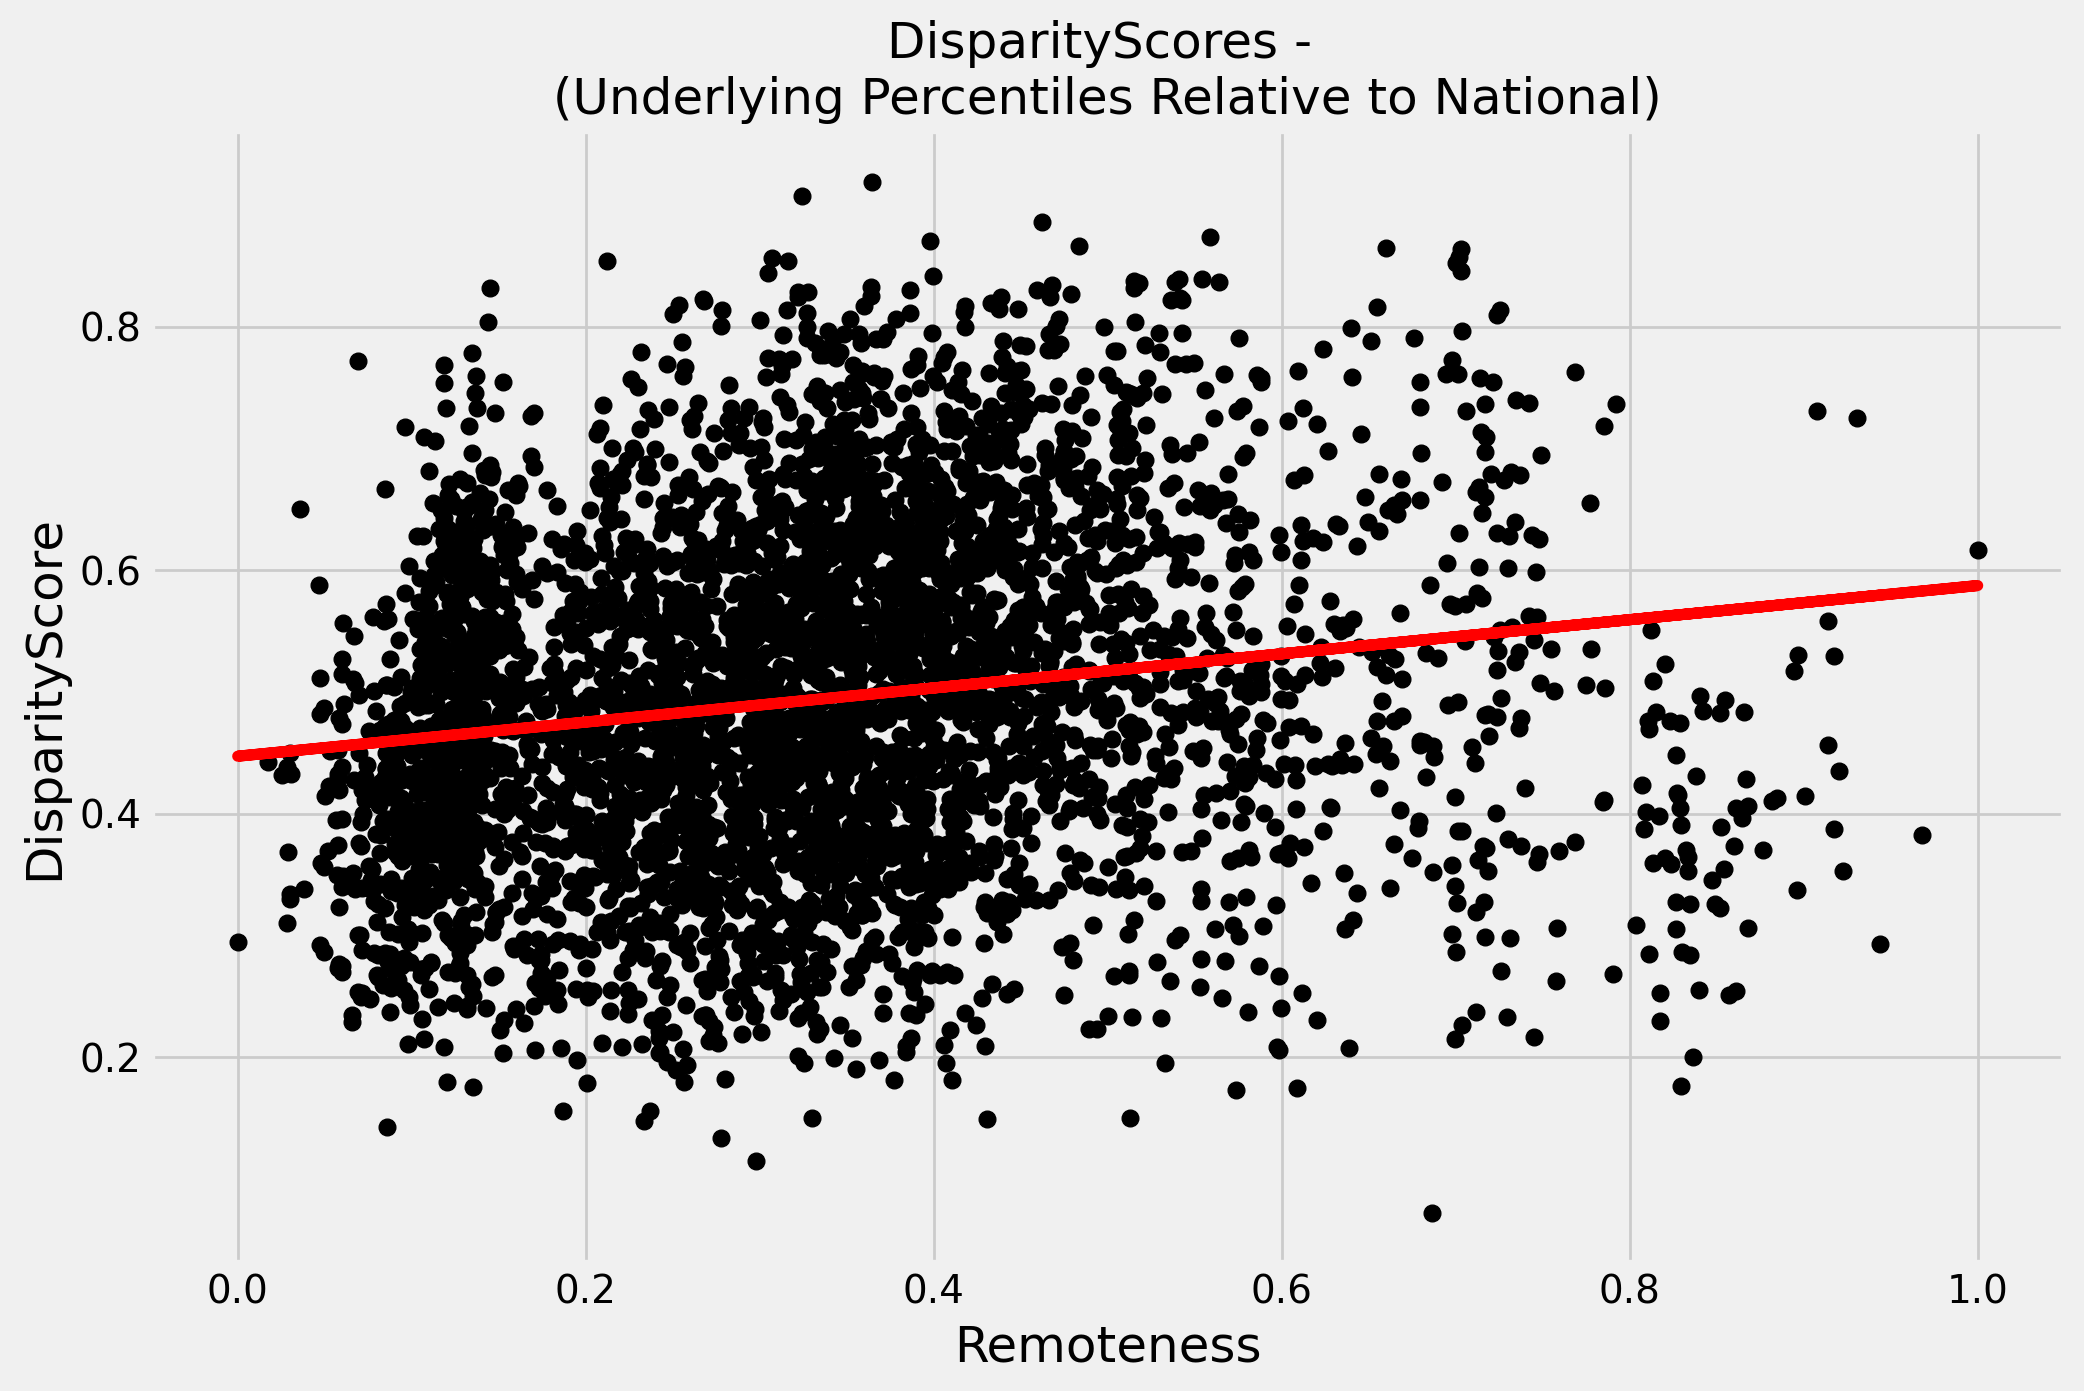

                            OLS Regression Results                            
Dep. Variable:                 resids   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                     0.000
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               1.00
Time:                        10:46:56   Log-Likelihood:                 2447.5
No. Observations:                4301   AIC:                            -4891.
Df Residuals:                    4299   BIC:                            -4878.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.494e-16      0.005  -5.37e-14      1.0

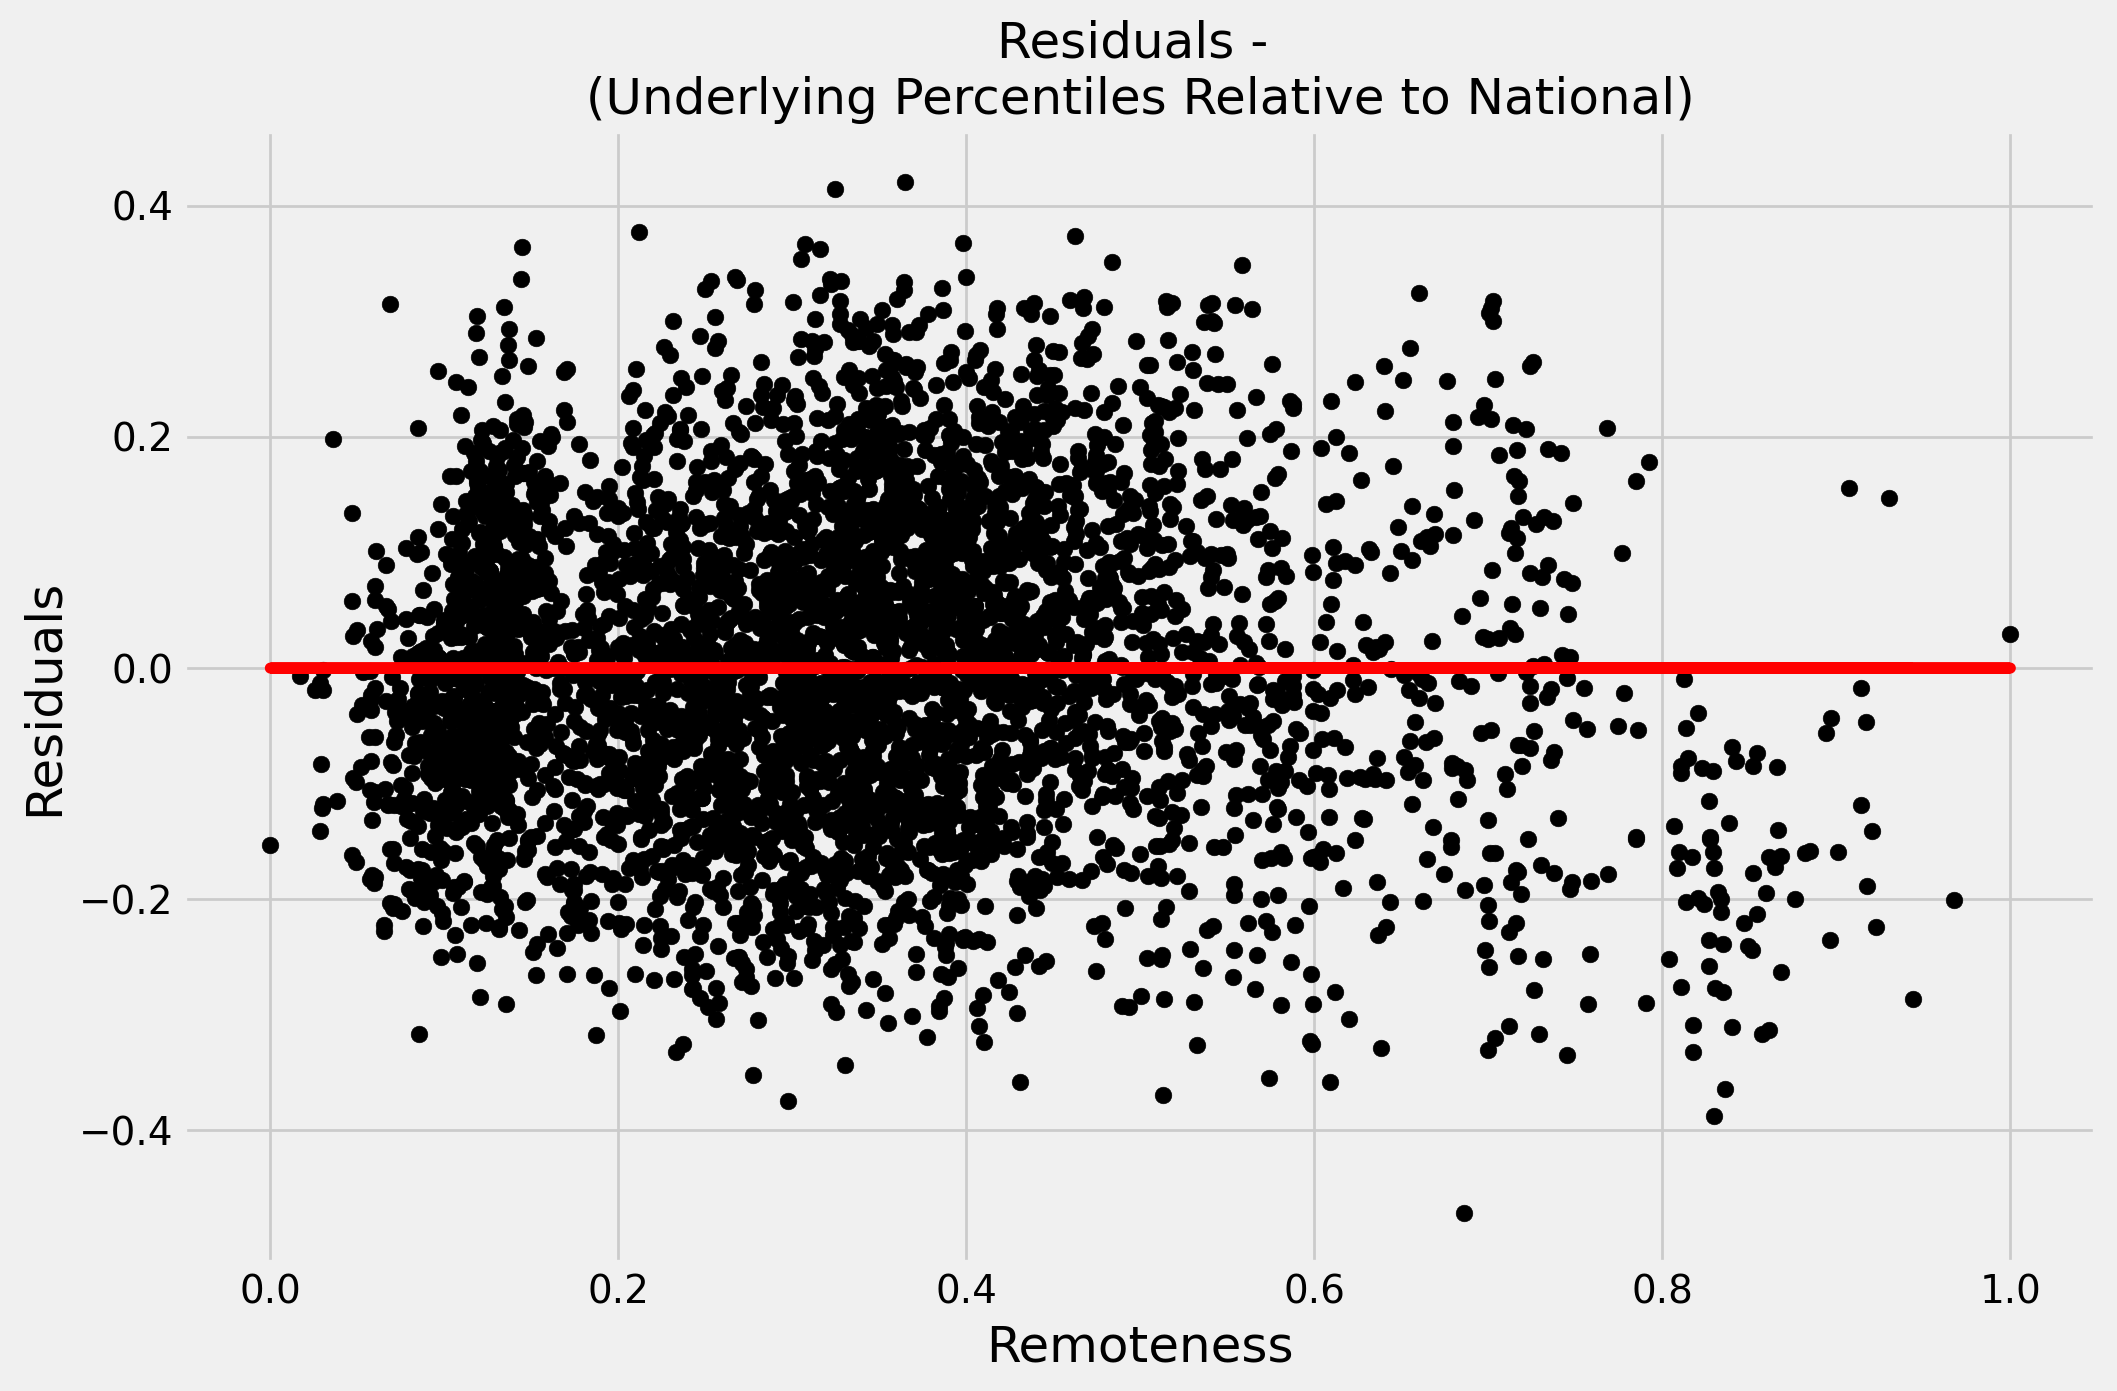

In [24]:
regression_plots('National')

We Should Get: 5322 CSDs


disparityscore  disparity  remoteness
csdcode                                       
1001105        0.562235        3.0      0.3855
1001113        0.590873        3.0      0.3900
1001120        0.705608        4.0      0.3901
1001124        0.186450        1.0      0.3453
1001126        0.501609        3.0      0.3350
...                 ...        ...         ...
6208047        0.468548        3.0      0.9677
6208059        0.428548        3.0      0.5981
6208073        0.541290        3.0      0.5688
6208081        0.498548        3.0      0.5896
6208087        0.468548        3.0      0.9438

[4301 rows x 3 columns]

                            OLS Regression Results                            
Dep. Variable:         disparityscore   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     101.8
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           1.11e-23
Time:                        10:46:57   Log-Likelihood:                 2340.5
No. Observations:                4301   AIC:                            -4677.
Df Residuals:                    4299   BIC:                            -4664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4517      0.005     94.965      0.0

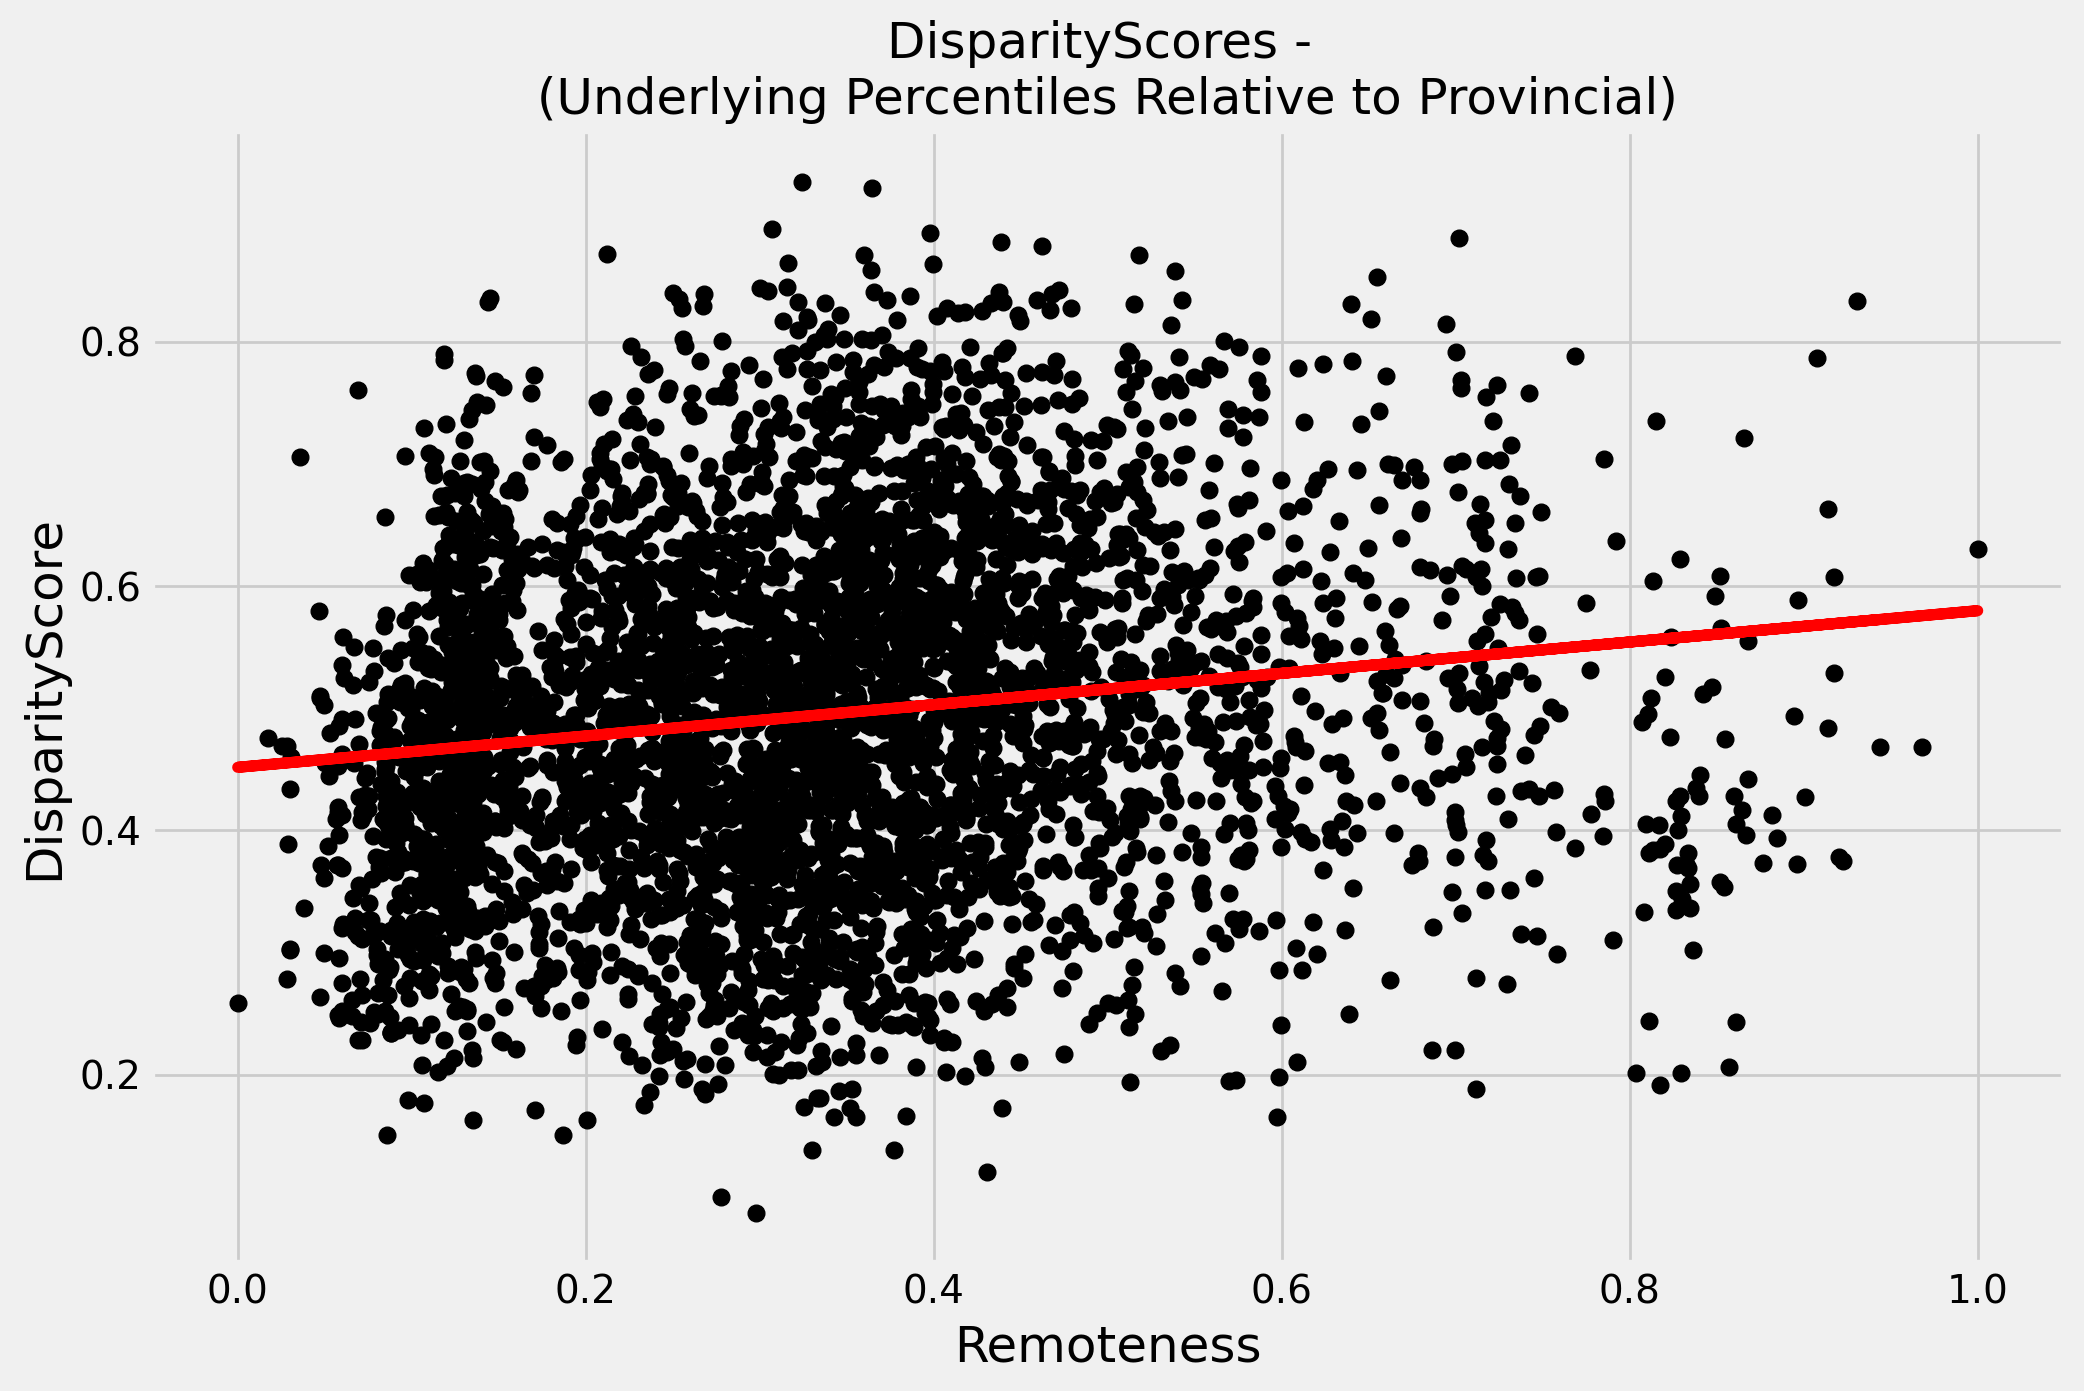

                            OLS Regression Results                            
Dep. Variable:                 resids   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 7.204e-13
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               1.00
Time:                        10:46:57   Log-Likelihood:                 2340.5
No. Observations:                4301   AIC:                            -4677.
Df Residuals:                    4299   BIC:                            -4664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.713e-16      0.005   -3.6e-14      1.0

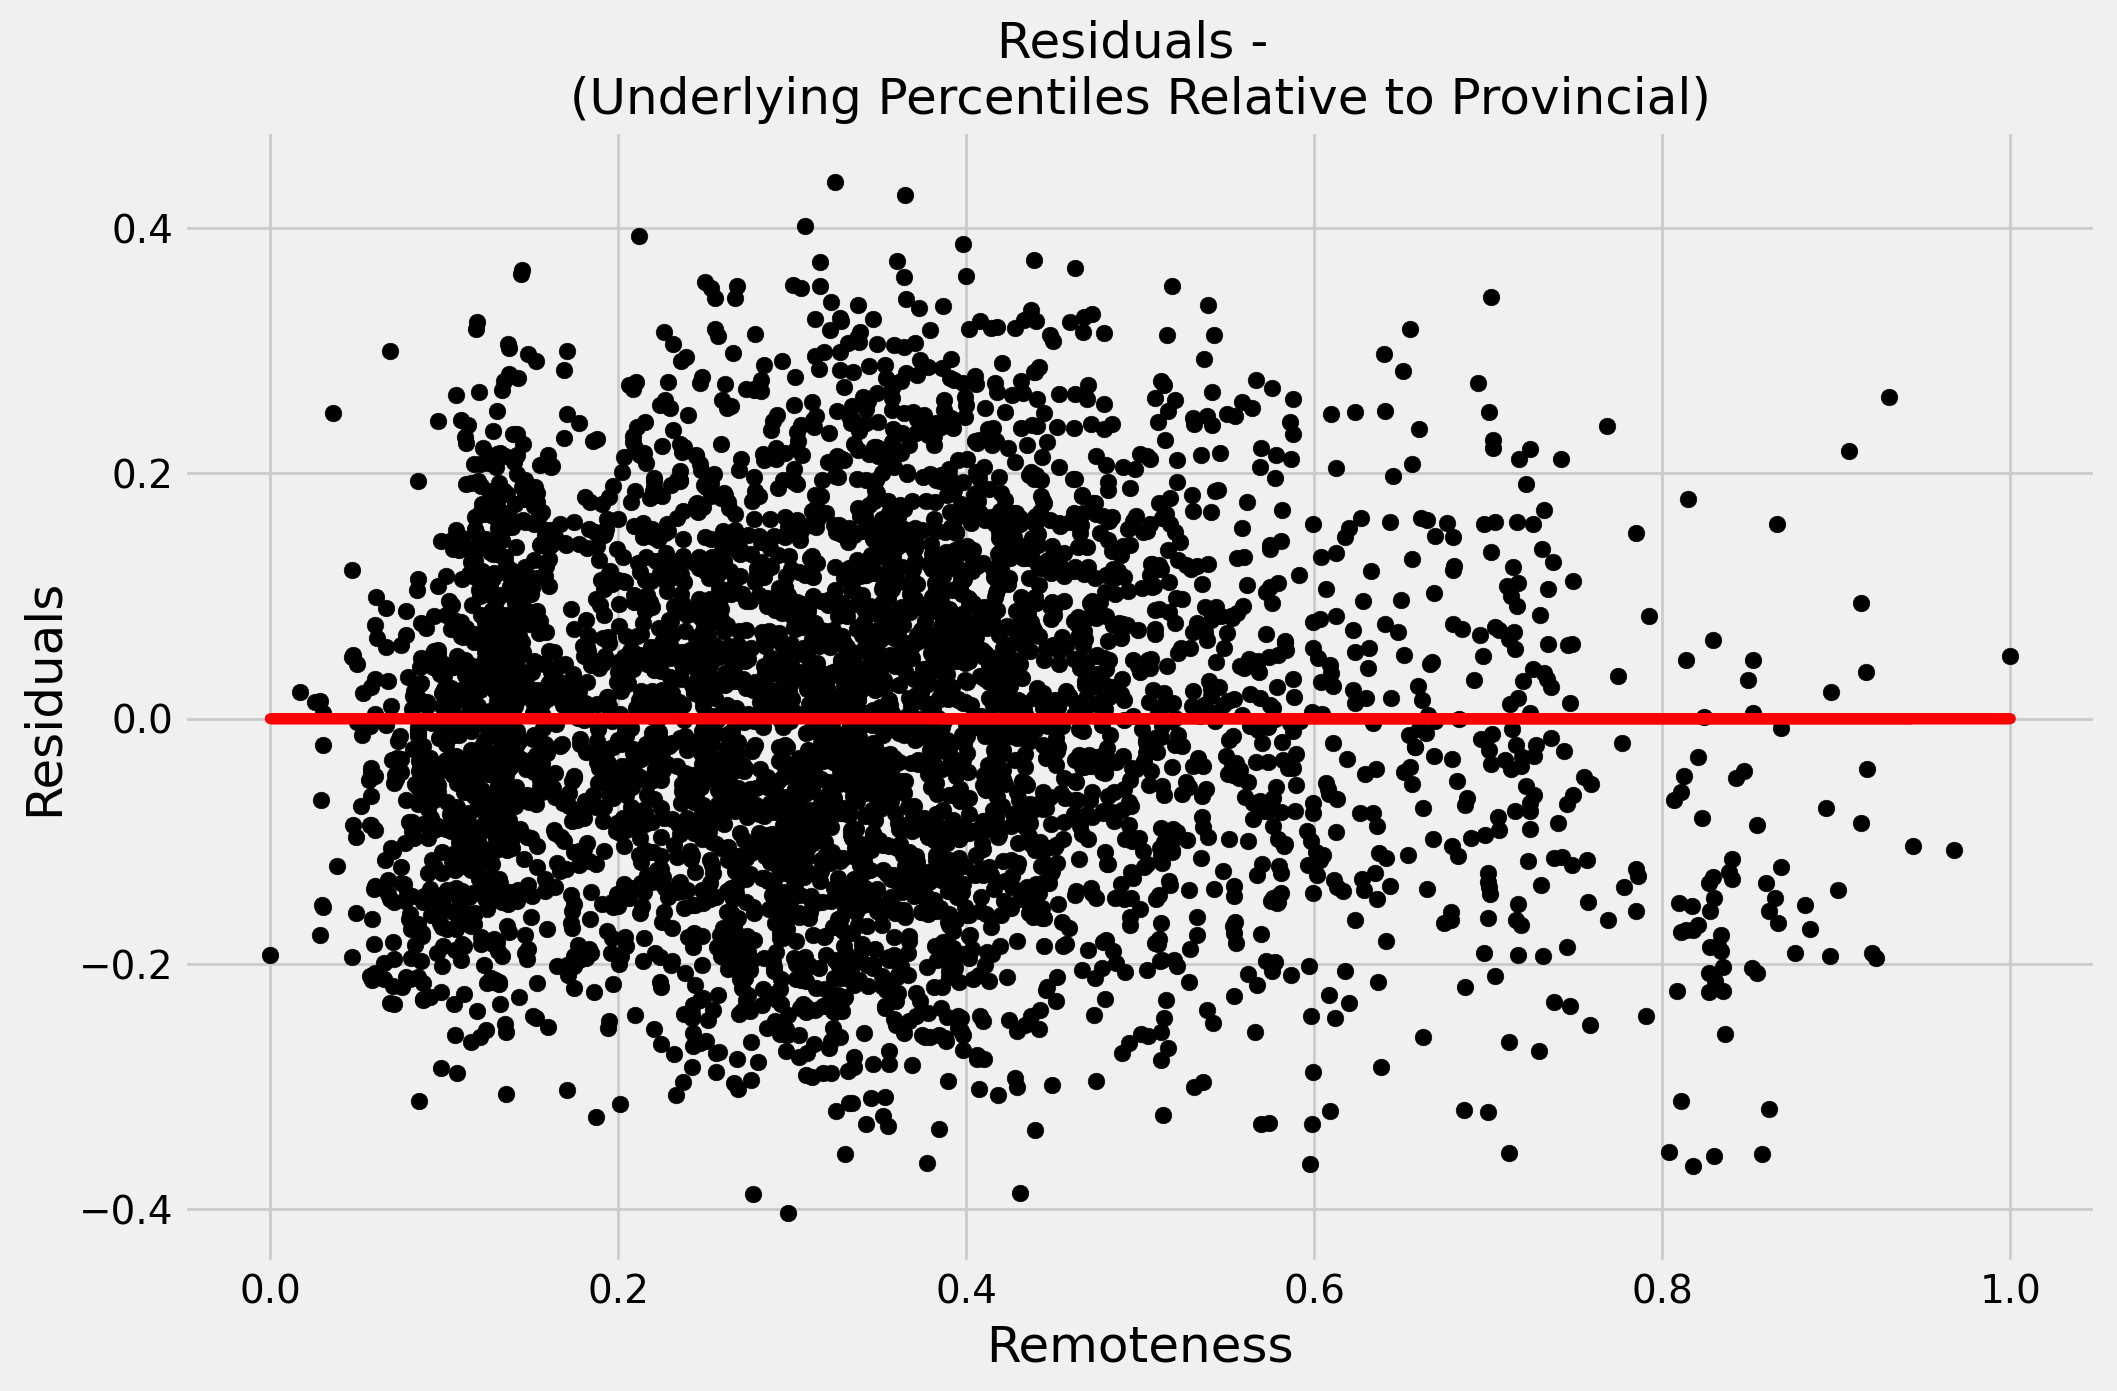

In [25]:
regression_plots('Provincial')

In [26]:
def regression_plots2(region):
    '''
    Exports a regression summary, and two plots. Select region:
    '''
    df = decline_remoteness_merger(region,False)
    display(df)
    df.columns=['popdis','labdis','popdep','industry','disparityscore','disparity', 'rem11', 'rem16', 'remoteness']
    df = df.dropna()
    df = df.astype(float)
    display(df)
    formula = 'labdis ~ popdep'
    reg1 = smf.ols(formula, df).fit()
    print(reg1.summary())

    predicted = reg1.fittedvalues
    predicted = {'predicted':predicted}
    resids = reg1.resid
    resids = {'resids':resids}
    resids = pd.DataFrame(resids)
    predicted = pd.DataFrame(predicted)

    forecast = df.join(resids,on='csdcode')
    forecast = forecast.join(predicted, on='csdcode')

    predicted = list(forecast['predicted'])
    remoteness = list(forecast['remoteness'])
    declinescore = list(forecast['disparityscore'])
    decline = list(forecast['disparity'])
    resids = list(forecast['resids'])
    labdec = list(forecast['labdis'])
    popdep = list(forecast['popdep'])
    observations = len(predicted)
    xgrid = []
    for i in range(observations):
        xgrid.append(i+1)
    
    title1 = 'DisparityScores - \n(Underlying Percentiles Relative to ' + region + ')'
    title2 = 'Residuals - \n(Underlying Percentiles Relative to ' + region + ')'
    
    fig1, ax1 = plt.subplots(figsize=(11,7))
    ax1.scatter(x=popdep, y=labdec, color='black', label='Data')
    ax1.plot(popdep, predicted, color='red',label='forecast')
    ax1.set_title(title1, fontsize=18)
    ax1.set_ylabel('Labour Disparity', fontsize=18)
    ax1.set_xlabel('Population Dependency', fontsize=18)
    plt.show()
    
    formula2 = 'resids ~ remoteness'
    reg2 = smf.ols(formula2, df).fit()
    predicted2 = reg2.fittedvalues
    print(reg2.summary())
    
    fig2, ax2 = plt.subplots(figsize=(11,7))
    ax2.scatter(remoteness, resids, color='black', label='Data',linewidth=0.2)
    ax2.plot(remoteness, predicted2, color='red')
    ax2.set_title(title2, fontsize=18)
    ax2.set_ylabel('Residuals', fontsize=18)
    ax2.set_xlabel('Population Dependency', fontsize=18)
    plt.show()

We Should Get: 5322 CSDs


Population Disparity  Labour Disparity  Population Dependency  \
csdcode                                                                  
1001101              0.118598               NaN                    NaN   
1001105              0.951482          0.547278               0.062500   
1001113              0.964960          0.613181               0.303977   
1001120              0.986523          0.424785               0.505682   
1001124              0.169811          0.197708               0.326705   
...                       ...               ...                    ...   
6208068              0.951613               NaN                    NaN   
6208073              0.645161          0.640000               0.160000   
6208081              0.274194          0.800000               0.600000   
6208087              0.274194          0.760000               0.800000   
6208098              0.709677               NaN                    NaN   

         Industry Specialization  DisparityScore  Disparity Index  \
csdcode                                                             
1001101                      NaN             NaN              NaN   
1001105                 0.687679        0.562235              3.0   
1001113                 0.481375        0.590873              3.0   
1001120                 0.905444        0.705608              4.0   
1001124                 0.051576        0.186450              1.0   
...                          ...             ...              ...   
6208068                      NaN             NaN              NaN   
6208073                 0.720000        0.541290              3.0   
6208081                 0.320000        0.498548              3.0   
6208087                 0.040000        0.468548              3.0   
6208098                      NaN             NaN              NaN   

        remoteness_index11 remoteness_index16  Most Recent Remoteness  
csdcode                                                                
1001101                NaN             0.3768                  0.3768  
1001105             0.3955             0.3855                  0.3855  
1001113             0.3987               0.39                  0.3900  
1001120             0.3989             0.3901                  0.3901  
1001124             0.3575             0.3453                  0.3453  
...                    ...                ...                     ...  
6208068             0.8786                NaN                  0.8786  
6208073             0.5858             0.5688                  0.5688  
6208081             0.9527             0.5896                  0.5896  
6208087              0.972             0.9438                  0.9438  
6208098             0.6344                NaN                  0.6344  

[5082 rows x 9 columns]

popdis    labdis    popdep  industry  disparityscore  disparity  \
csdcode                                                                      
1001105  0.951482  0.547278  0.062500  0.687679        0.562235        3.0   
1001113  0.964960  0.613181  0.303977  0.481375        0.590873        3.0   
1001120  0.986523  0.424785  0.505682  0.905444        0.705608        4.0   
1001124  0.169811  0.197708  0.326705  0.051576        0.186450        1.0   
1001126  0.528302  0.251433  0.960227  0.266476        0.501609        3.0   
...           ...       ...       ...       ...             ...        ...   
6208047  0.274194  0.920000  0.520000  0.160000        0.468548        3.0   
6208059  0.274194  0.440000  0.160000  0.840000        0.428548        3.0   
6208073  0.645161  0.640000  0.160000  0.720000        0.541290        3.0   
6208081  0.274194  0.800000  0.600000  0.320000        0.498548        3.0   
6208087  0.274194  0.760000  0.800000  0.040000        0.468548        3.0   

          rem11   rem16  remoteness  
csdcode                              
1001105  0.3955  0.3855      0.3855  
1001113  0.3987  0.3900      0.3900  
1001120  0.3989  0.3901      0.3901  
1001124  0.3575  0.3453      0.3453  
1001126  0.3435  0.3350      0.3350  
...         ...     ...         ...  
6208047  0.9881  0.9677      0.9677  
6208059  0.6026  0.5981      0.5981  
6208073  0.5858  0.5688      0.5688  
6208081  0.9527  0.5896      0.5896  
6208087  0.9720  0.9438      0.9438  

[4301 rows x 9 columns]

                            OLS Regression Results                            
Dep. Variable:                 labdis   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     116.3
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           9.07e-27
Time:                        10:46:58   Log-Likelihood:                 739.60
No. Observations:                4301   AIC:                            -1475.
Df Residuals:                    4299   BIC:                            -1462.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4364      0.006     69.968      0.0

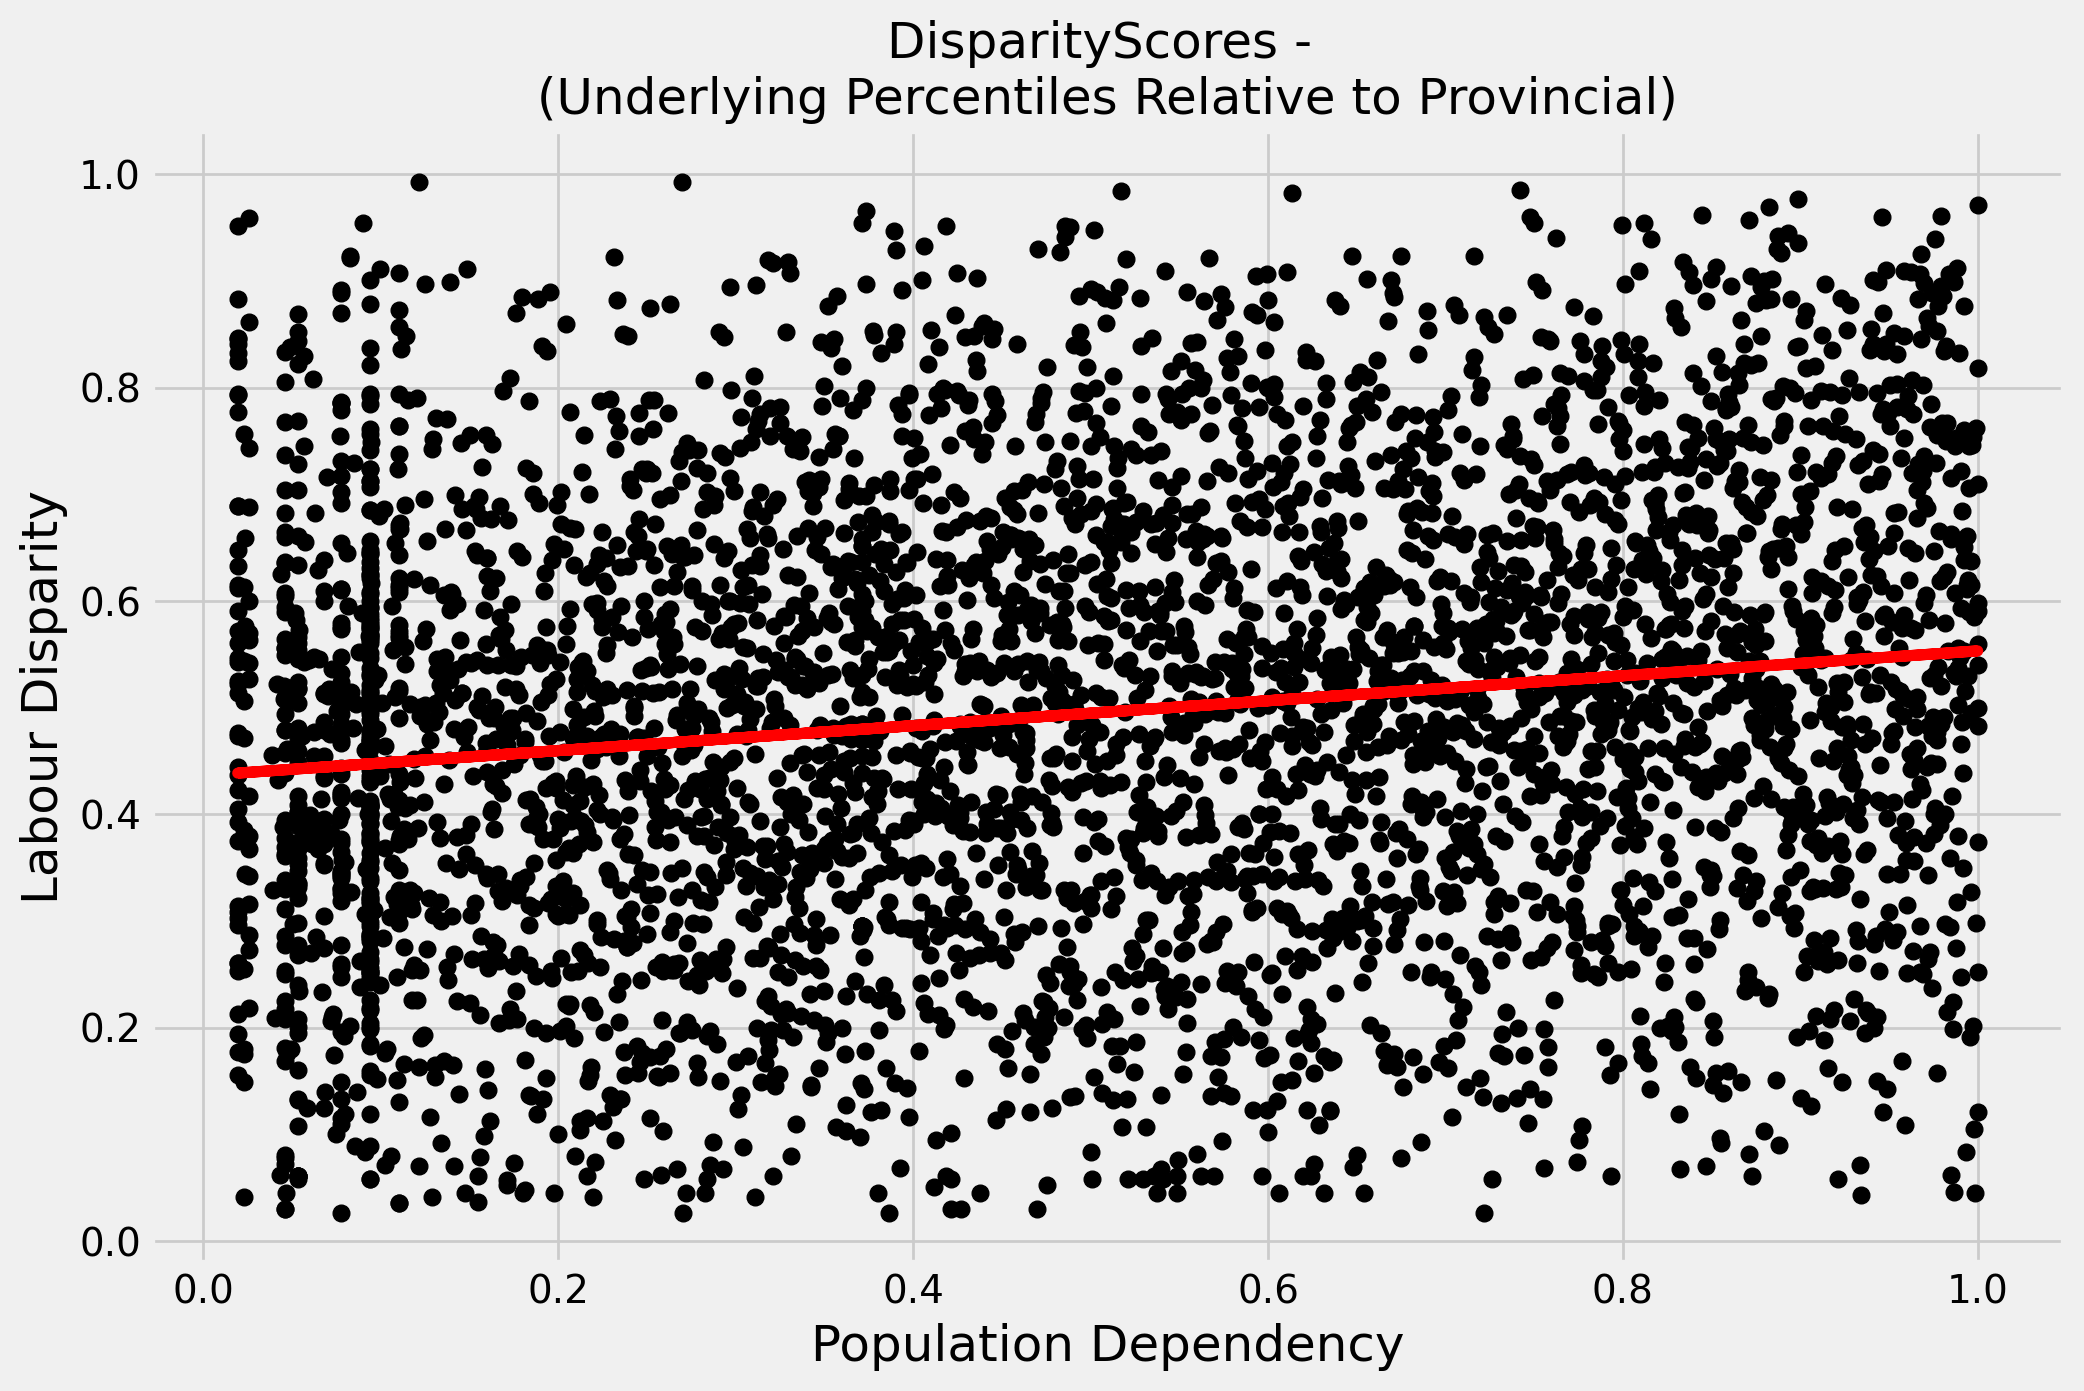

                            OLS Regression Results                            
Dep. Variable:                 resids   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     21.91
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           2.95e-06
Time:                        10:46:59   Log-Likelihood:                 750.53
No. Observations:                4301   AIC:                            -1497.
Df Residuals:                    4299   BIC:                            -1484.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0288      0.007      4.179      0.0

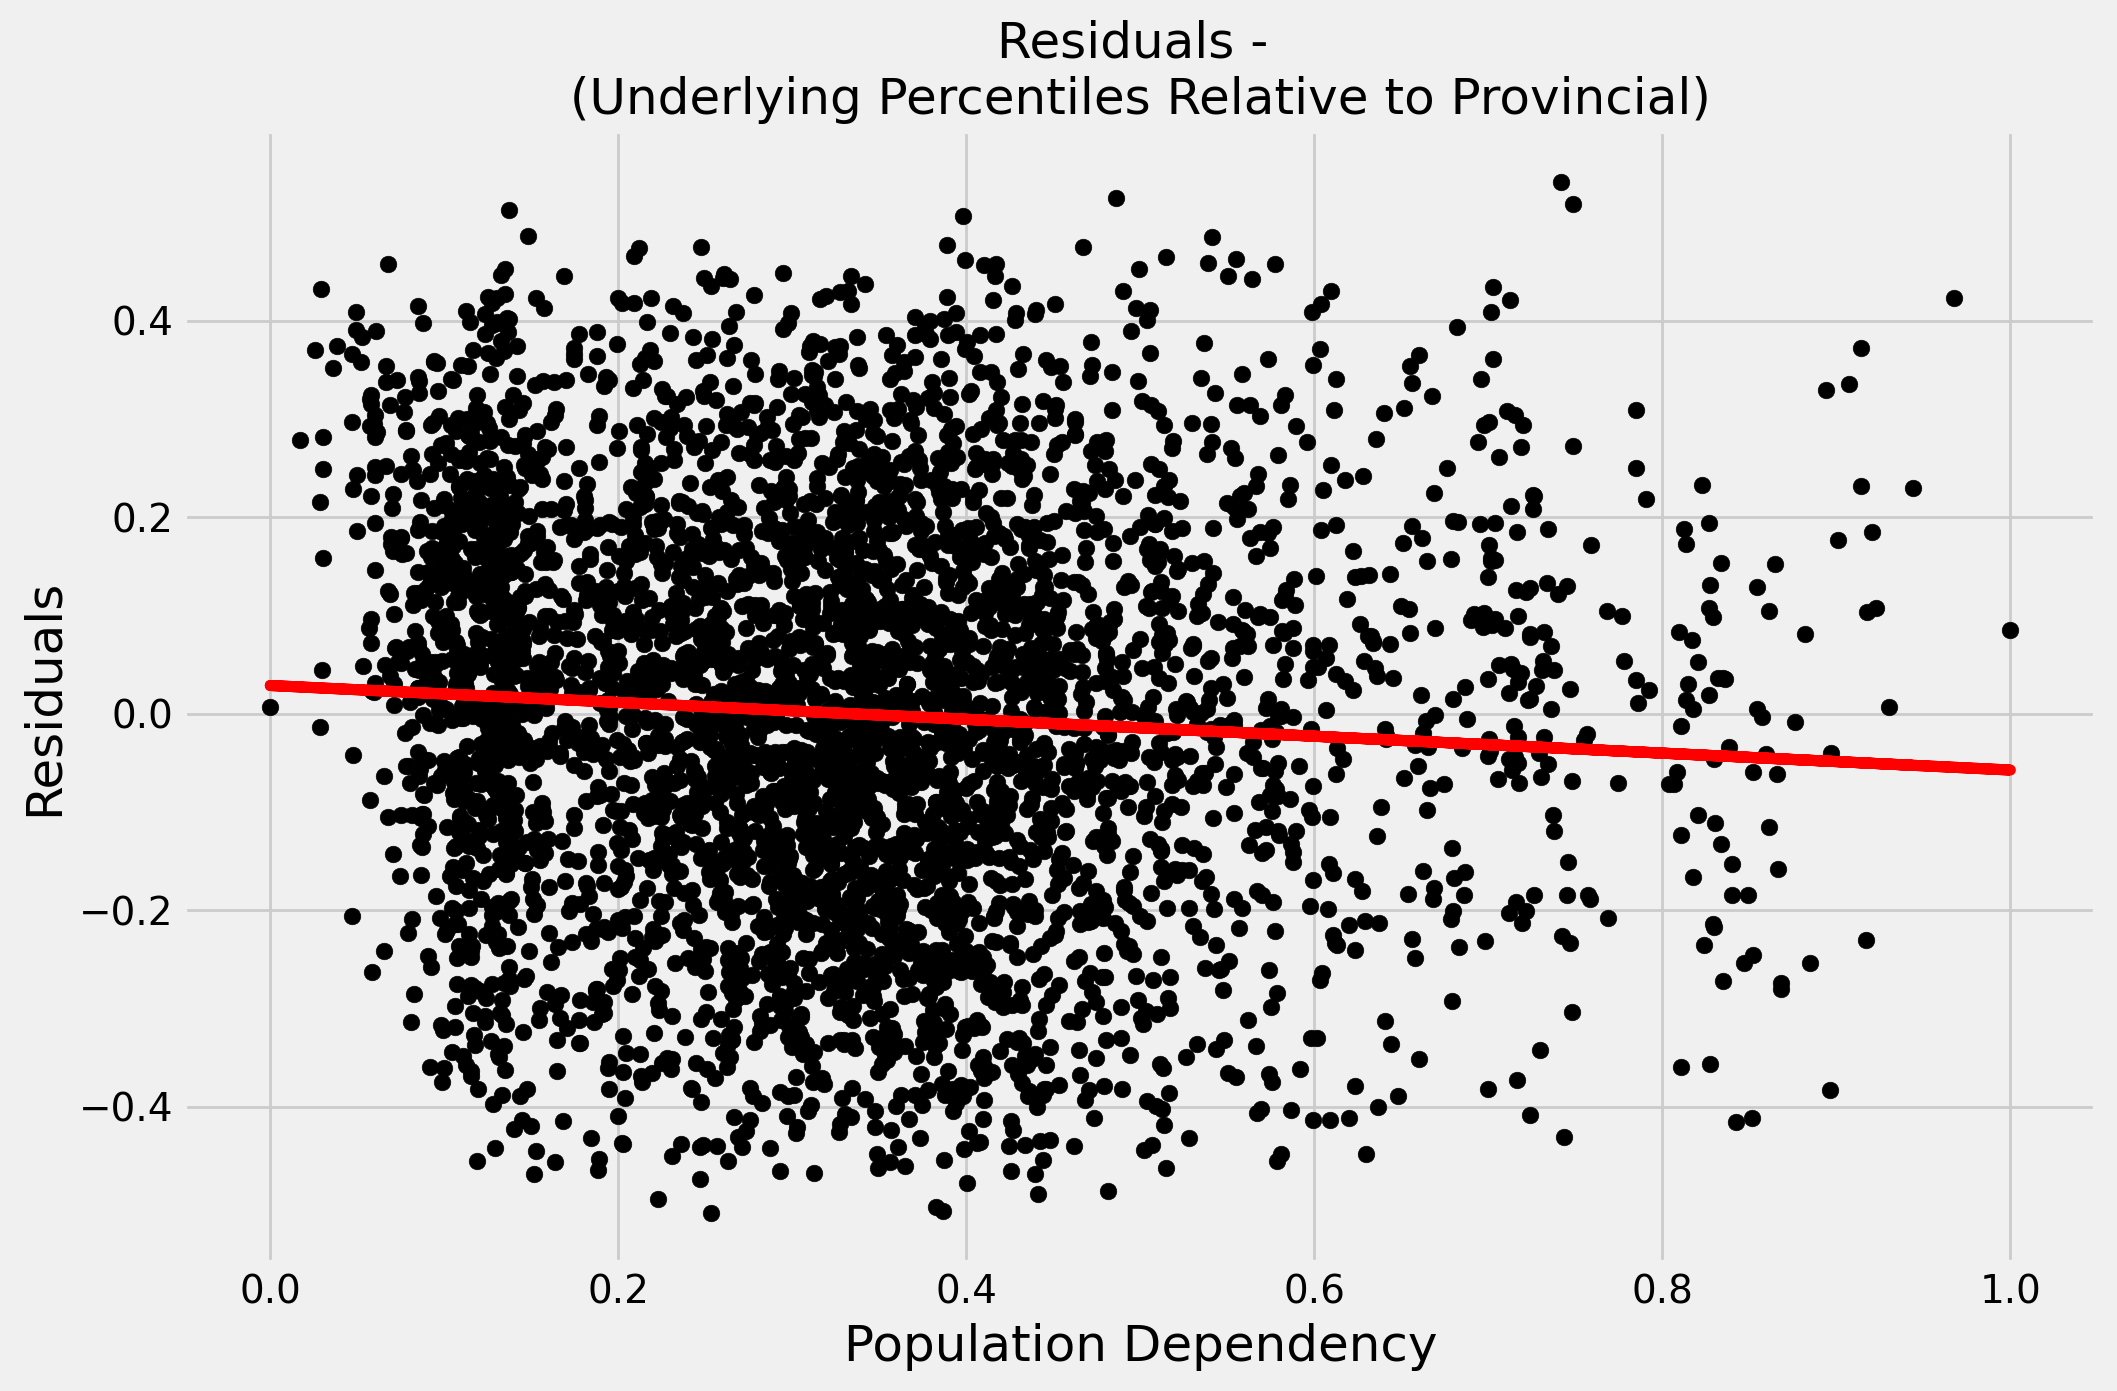

In [27]:
regression_plots2('Provincial')

# 12. Rural/Urban Statistics:

In [28]:
os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Documentation/Results/April 2023 (Final) Results')
can_final = pd.read_csv('Disparity_and_Remoteness_ca.csv',encoding='latin1')
prv_final = pd.read_csv('Disparity_and_Remoteness_pv.csv',encoding='latin1')

#can_final = can_final.dropna()
#prv_final = prv_final.dropna()

remote25 = prv_final['Most Recent Remoteness'].quantile(.25)
remote50 = prv_final['Most Recent Remoteness'].quantile(.5)
remote75 = prv_final['Most Recent Remoteness'].quantile(.75)
remote90 = prv_final['Most Recent Remoteness'].quantile(.9)

rural_list25 = []
urban_list25 = []
nan_list25 = []
rural_list50 = []
urban_list50 = []
nan_list50 = []
rural_list75 = []
urban_list75 = []
nan_list75 = []
rural_list90 = []
urban_list90 = []
nan_list90 = []

x = prv_final
print('Using Provincial Scores:\n')
for i in range(0,2):
    x = x.drop(columns=['Population Disparity', 'Labour Disparity', 'Population Dependency', 'Industry Specialization', 'remoteness_index11', 'remoteness_index16'])
    #x = x.dropna()
    for index, row in x.iterrows():
        csd = row['csdcode']
        decscore = row['DisparityScore']
        decindex = row['Disparity Index']
        remindex = row['Most Recent Remoteness']
        
        if remindex >= remote25:
            rural_list25.append(decscore)
        elif remindex < remote25:
            urban_list25.append(decscore)
        else:
            nan_list25.append(decscore)
        
        if remindex >= remote50:
            rural_list50.append(decscore)
        elif remindex < remote50:
            urban_list50.append(decscore)
        else:
            nan_list50.append(decscore)
    
        if remindex >= remote75:
            rural_list75.append(decscore)
        elif remindex < remote75:
            urban_list75.append(decscore)
        else:
            nan_list75.append(decscore)
    
        if remindex >= remote90:
            rural_list90.append(decscore)
        elif remindex < remote90:
            urban_list90.append(decscore)
        else:
            nan_list90.append(decscore)
        
    rural_list25 = pd.DataFrame(np.array(rural_list25))
    urban_list25 = pd.DataFrame(np.array(urban_list25))
    nan_list25 = pd.DataFrame(np.array(nan_list25))
    rural_list50 = pd.DataFrame(np.array(rural_list50))
    urban_list50 = pd.DataFrame(np.array(urban_list50))
    nan_list50 = pd.DataFrame(np.array(nan_list50))
    rural_list75 = pd.DataFrame(np.array(rural_list75))
    urban_list75 = pd.DataFrame(np.array(urban_list75))
    nan_list75 = pd.DataFrame(np.array(nan_list75))
    rural_list90 = pd.DataFrame(np.array(rural_list90))
    urban_list90 = pd.DataFrame(np.array(urban_list90))
    nan_list90 = pd.DataFrame(np.array(nan_list90))
    
    print("THE AVERAGE REMOTENESS SCORE IS:")
    avgrem = np.mean(x['Most Recent Remoteness'])
    print(avgrem)
    print("STANDARD DEVIATION IS:")
    stdrem = np.std(x['Most Recent Remoteness'])
    print(stdrem)

    print('THE 25TH PERCENTILE OF REMOTENESS SCORES IS:')
    ca_threshold_urbrur = np.nanpercentile(x['Most Recent Remoteness'], 25)
    print(ca_threshold_urbrur)
    
    print('THE 50TH PERCENTILE OF REMOTENESS SCORES IS:')
    ca_threshold_urbrur = np.nanpercentile(x['Most Recent Remoteness'], 50)
    print(ca_threshold_urbrur)
    
    print('THE 75TH PERCENTILE OF REMOTENESS SCORES IS:')
    ca_threshold_urbrur = np.nanpercentile(x['Most Recent Remoteness'], 75)
    print(ca_threshold_urbrur)
    
    print('THE 90TH PERCENTILE OF REMOTENESS SCORES IS:')
    ca_threshold_urbrur = np.nanpercentile(x['Most Recent Remoteness'], 90)
    print(ca_threshold_urbrur)
    
    #pv_threshold_urbrur = np.percentile(prv_final['remoteness_index'], 80)
    #print(pv_threshold_urbrur)
    
    print(np.nanmean(rural_list25), 'For Rural CSDS (Remoteness >= 25th Percentile')
    print(np.nanmean(urban_list25), 'For Urban CSDS (Remoteness < 25th Percentile)')
    print("Rural:", len(rural_list25), "Urban",len(urban_list25),"NA", list(nan_list25))
    print(np.nanmean(rural_list50), 'For Rural CSDS (Remoteness >= 50th Percentile')
    print(np.nanmean(urban_list50), 'For Urban CSDS (Remoteness < 50th Percentile)')
    print("Rural:", len(rural_list50), "Urban",len(urban_list50),"NA", list(nan_list50))
    print(np.nanmean(rural_list75), 'For Rural CSDS (Remoteness >= 75th Percentile')
    print(np.nanmean(urban_list75), 'For Urban CSDS (Remoteness < 75th Percentile)')
    print("Rural:", len(rural_list75), "Urban",len(urban_list75),"NA", list(nan_list75))
    print(np.nanmean(rural_list90), 'For Rural CSDS (Remoteness >= 90th Percentile')
    print(np.nanmean(urban_list90), 'For Urban CSDS (Remoteness < 90th Percentile)')
    print("Rural:", len(rural_list90), "Urban",len(urban_list90),"NA", list(nan_list90))
    
    x = can_final
    rural_list25 = []
    urban_list25 = []
    nan_list25 = []
    rural_list50 = []
    urban_list50 = []
    nan_list50 = []
    rural_list75 = []
    urban_list75 = []
    nan_list75 = []
    rural_list90 = []
    urban_list90 = []
    nan_list90 = []
    
    if i == 0:
        print('\n\nUsing National Scores:\n')


Using Provincial Scores:

THE AVERAGE REMOTENESS SCORE IS:
0.34932811078140374
STANDARD DEVIATION IS:
0.17174951781453932
THE 25TH PERCENTILE OF REMOTENESS SCORES IS:
0.2249
THE 50TH PERCENTILE OF REMOTENESS SCORES IS:
0.3386
THE 75TH PERCENTILE OF REMOTENESS SCORES IS:
0.4419
THE 90TH PERCENTILE OF REMOTENESS SCORES IS:
0.5809000000000002
0.5066636128493915 For Rural CSDS (Remoteness >= 25th Percentile
0.4628166512250159 For Urban CSDS (Remoteness < 25th Percentile)
Rural: 3792 Urban 1263 NA [0]
0.52148485223217 For Rural CSDS (Remoteness >= 50th Percentile
0.47136094872931905 For Urban CSDS (Remoteness < 50th Percentile)
Rural: 2528 Urban 2527 NA [0]
0.52308243718091 For Rural CSDS (Remoteness >= 75th Percentile
0.48664907795893286 For Urban CSDS (Remoteness < 75th Percentile)
Rural: 1268 Urban 3787 NA [0]
0.5078327011711756 For Rural CSDS (Remoteness >= 90th Percentile
0.4933979174254714 For Urban CSDS (Remoteness < 90th Percentile)
Rural: 506 Urban 4549 NA [0]


Using National Scor

## Same thing, but with Discrete Score instead of Continuous score.

In [29]:
os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Documentation/Results/April 2023 (Final) Results')
can_final = pd.read_csv('Disparity_and_Remoteness_ca.csv',encoding='latin1')
prv_final = pd.read_csv('Disparity_and_Remoteness_pv.csv',encoding='latin1')

#can_final = can_final.dropna()
#prv_final = prv_final.dropna()

remote25 = prv_final['Most Recent Remoteness'].quantile(.25)
remote50 = prv_final['Most Recent Remoteness'].quantile(.5)
remote75 = prv_final['Most Recent Remoteness'].quantile(.75)
remote90 = prv_final['Most Recent Remoteness'].quantile(.9)

rural_list25 = []
urban_list25 = []
nan_list25 = []
rural_list50 = []
urban_list50 = []
nan_list50 = []
rural_list75 = []
urban_list75 = []
nan_list75 = []
rural_list90 = []
urban_list90 = []
nan_list90 = []

x = prv_final
print('Using Provincial Scores:\n')
for i in range(0,2):
    x = x.drop(columns=['Population Disparity', 'Labour Disparity', 'Population Dependency', 'Industry Specialization', 'remoteness_index11', 'remoteness_index16'])
    #x = x.dropna()
    for index, row in x.iterrows():
        csd = row['csdcode']
        decscore = row['DisparityScore']
        decindex = row['Disparity Index']
        remindex = row['Most Recent Remoteness']
        
        if remindex >= remote25:
            rural_list25.append(decindex)
        elif remindex < remote25:
            urban_list25.append(decindex)
        else:
            nan_list25.append(decindex)
        
        if remindex >= remote50:
            rural_list50.append(decindex)
        elif remindex < remote50:
            urban_list50.append(decindex)
        else:
            nan_list50.append(decindex)
    
        if remindex >= remote75:
            rural_list75.append(decindex)
        elif remindex < remote75:
            urban_list75.append(decindex)
        else:
            nan_list75.append(decindex)
    
        if remindex >= remote90:
            rural_list90.append(decindex)
        elif remindex < remote90:
            urban_list90.append(decindex)
        else:
            nan_list90.append(decindex)
        
    rural_list25 = pd.DataFrame(np.array(rural_list25))
    urban_list25 = pd.DataFrame(np.array(urban_list25))
    nan_list25 = pd.DataFrame(np.array(nan_list25))
    rural_list50 = pd.DataFrame(np.array(rural_list50))
    urban_list50 = pd.DataFrame(np.array(urban_list50))
    nan_list50 = pd.DataFrame(np.array(nan_list50))
    rural_list75 = pd.DataFrame(np.array(rural_list75))
    urban_list75 = pd.DataFrame(np.array(urban_list75))
    nan_list75 = pd.DataFrame(np.array(nan_list75))
    rural_list90 = pd.DataFrame(np.array(rural_list90))
    urban_list90 = pd.DataFrame(np.array(urban_list90))
    nan_list90 = pd.DataFrame(np.array(nan_list90))
    
    print("THE AVERAGE REMOTENESS SCORE IS:")
    avgrem = np.mean(x['Most Recent Remoteness'])
    print(avgrem)
    print("STANDARD DEVIATION IS:")
    stdrem = np.std(x['Most Recent Remoteness'])
    print(stdrem)

    print('THE 25TH PERCENTILE OF REMOTENESS SCORES IS:')
    ca_threshold_urbrur = np.nanpercentile(x['Most Recent Remoteness'], 25)
    print(ca_threshold_urbrur)
    
    print('THE 50TH PERCENTILE OF REMOTENESS SCORES IS:')
    ca_threshold_urbrur = np.nanpercentile(x['Most Recent Remoteness'], 50)
    print(ca_threshold_urbrur)
    
    print('THE 75TH PERCENTILE OF REMOTENESS SCORES IS:')
    ca_threshold_urbrur = np.nanpercentile(x['Most Recent Remoteness'], 75)
    print(ca_threshold_urbrur)
    
    print('THE 90TH PERCENTILE OF REMOTENESS SCORES IS:')
    ca_threshold_urbrur = np.nanpercentile(x['Most Recent Remoteness'], 90)
    print(ca_threshold_urbrur)
    
    #pv_threshold_urbrur = np.percentile(prv_final['remoteness_index'], 80)
    #print(pv_threshold_urbrur)
    
    print(np.nanmean(rural_list25), 'For Rural CSDS (Remoteness >= 25th Percentile')
    print(np.nanmean(urban_list25), 'For Urban CSDS (Remoteness < 25th Percentile)')
    print("Rural:", len(rural_list25), "Urban",len(urban_list25),"NA", list(nan_list25))
    print(np.nanmean(rural_list50), 'For Rural CSDS (Remoteness >= 50th Percentile')
    print(np.nanmean(urban_list50), 'For Urban CSDS (Remoteness < 50th Percentile)')
    print("Rural:", len(rural_list50), "Urban",len(urban_list50),"NA", list(nan_list50))
    print(np.nanmean(rural_list75), 'For Rural CSDS (Remoteness >= 75th Percentile')
    print(np.nanmean(urban_list75), 'For Urban CSDS (Remoteness < 75th Percentile)')
    print("Rural:", len(rural_list75), "Urban",len(urban_list75),"NA", list(nan_list75))
    print(np.nanmean(rural_list90), 'For Rural CSDS (Remoteness >= 90th Percentile')
    print(np.nanmean(urban_list90), 'For Urban CSDS (Remoteness < 90th Percentile)')
    print("Rural:", len(rural_list90), "Urban",len(urban_list90),"NA", list(nan_list90))
    
    x = can_final
    rural_list25 = []
    urban_list25 = []
    nan_list25 = []
    rural_list50 = []
    urban_list50 = []
    nan_list50 = []
    rural_list75 = []
    urban_list75 = []
    nan_list75 = []
    rural_list90 = []
    urban_list90 = []
    nan_list90 = []
    
    if i == 0:
        print('\n\nUsing National Scores:\n')


Using Provincial Scores:

THE AVERAGE REMOTENESS SCORE IS:
0.34932811078140374
STANDARD DEVIATION IS:
0.17174951781453932
THE 25TH PERCENTILE OF REMOTENESS SCORES IS:
0.2249
THE 50TH PERCENTILE OF REMOTENESS SCORES IS:
0.3386
THE 75TH PERCENTILE OF REMOTENESS SCORES IS:
0.4419
THE 90TH PERCENTILE OF REMOTENESS SCORES IS:
0.5809000000000002
3.0327658207516865 For Rural CSDS (Remoteness >= 25th Percentile
2.8341750841750843 For Urban CSDS (Remoteness < 25th Percentile)
Rural: 3792 Urban 1263 NA [0]
3.1040201005025128 For Rural CSDS (Remoteness >= 50th Percentile
2.869320640415405 For Urban CSDS (Remoteness < 50th Percentile)
Rural: 2528 Urban 2527 NA [0]
3.1168274383708465 For Rural CSDS (Remoteness >= 75th Percentile
2.9394299287410925 For Urban CSDS (Remoteness < 75th Percentile)
Rural: 1268 Urban 3787 NA [0]
3.0377906976744184 For Rural CSDS (Remoteness >= 90th Percentile
2.9727065959059895 For Urban CSDS (Remoteness < 90th Percentile)
Rural: 506 Urban 4549 NA [0]


Using National Sco

# What is in the 4/5 CSDs? Correlation analysis.

In [30]:
def three_datasets(region:str):
    '''
    Creates a merged dataframe of three datasets:
    - Complete Census Profile,
    - Index of Disparity
    - Index of Remoteness 2011 and 2016.
    
    Enter name of region to use data for (string: provincial or national)
    '''
    
    os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Census Data - Raw/Finished Census 2016-2001')
    census = pd.read_csv('20220918completecensusprofile.csv', encoding='latin1', low_memory=False)
    
    if region == 'provincial':
        os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/ProvincialCSVOutput')
        disparity = pd.read_csv('Disparity_Index_pv.csv')
    if region == 'national':
        os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Disparity Index - Analysis and Writeup/April 2023 (Final) Output/NationalCSVOutput')
        disparity = pd.read_csv('Disparity_Index_ca.csv')
        
    os.chdir('/Users/DNW/Dropbox/Rural Data Project - RA/Remoteness Index - Raw')
    remoteness = pd.read_csv('Merged_Remoteness.csv')
    
    census = census.set_index('csdcode')
    disparity = disparity.set_index('csdcode')
    remoteness = remoteness.set_index('csdcode')
    
    df = census.join(disparity, on='csdcode')
    df = df.join(remoteness, on='csdcode')
    
    return df

In [31]:
print('For PROVINCIAL SCALE')
for i in ('provincial', 'national'):
    
    df1 = three_datasets(i)
    #df1 = df1.dropna()
    df1 = df1.filter(['Most Recent Remoteness', 'Disparity Index', 'Most Recent Population'])
    df1['csd'] = df1.index
    display(df1)
    csdlist123 = []
    csdlist45 = []
    csdlistnone = []
    for index, row in df1.iterrows():
        csd = row['csd']
        rem = row['Most Recent Remoteness']
        dis = row['Disparity Index']

        if dis >= 4:
            csdlist45.append(rem)
        elif dis < 4:
            csdlist123.append(rem)
        else:
            csdlistnone.append(rem)
            
    csdlist45 = pd.DataFrame(np.array(csdlist45))
    csdlist123 = pd.DataFrame(np.array(csdlist123))
    csdlistnone = pd.DataFrame(np.array(csdlistnone))
    print('length 1/2/3:', len(csdlist123), 'len 4/5', len(csdlist45))
    print('Average Remoteness of 4/5 Category is: ', np.nanmean(csdlist45))
    print('Average Remoteness of 1/2/3 Category is: ', np.nanmean(csdlist123))
    print('Median Remoteness of 4/5 Category is: ', np.nanmedian(csdlist45))
    print('Median Remoteness of 1/2/3 Category is: ', np.nanmedian(csdlist123))
    print('\n\n For NATIONAL SCALE')
    csdlist123 = []
    csdlist45 = []
    csdlistnone = []

For PROVINCIAL SCALE


Most Recent Remoteness  Disparity Index      csd
csdcode                                                  
4801003                  0.2943              3.0  4801003
4801006                  0.2892              2.0  4801006
4801008                  0.3287              3.0  4801008
4801009                  0.3580              4.0  4801009
4801014                  0.3293              3.0  4801014
...                         ...              ...      ...
6001055                  0.4574              2.0  6001055
6001057                  0.5507              NaN  6001057
6001058                  0.4853              NaN  6001058
6001059                  0.4096              NaN  6001059
6001060                  0.4250              3.0  6001060

[5093 rows x 3 columns]

length 1/2/3: 3267 len 4/5 1034
Average Remoteness of 4/5 Category is:  0.3716976789168279
Average Remoteness of 1/2/3 Category is:  0.3223730945821855
Median Remoteness of 4/5 Category is:  0.36529999999999996
Median Remoteness of 1/2/3 Category is:  0.3118


 For NATIONAL SCALE


Most Recent Remoteness  Disparity Index      csd
csdcode                                                  
4801003                  0.2943              3.0  4801003
4801006                  0.2892              2.0  4801006
4801008                  0.3287              3.0  4801008
4801009                  0.3580              4.0  4801009
4801014                  0.3293              2.0  4801014
...                         ...              ...      ...
6001055                  0.4574              3.0  6001055
6001057                  0.5507              NaN  6001057
6001058                  0.4853              NaN  6001058
6001059                  0.4096              NaN  6001059
6001060                  0.4250              3.0  6001060

[5093 rows x 3 columns]

length 1/2/3: 3281 len 4/5 1020
Average Remoteness of 4/5 Category is:  0.38270009803921573
Average Remoteness of 1/2/3 Category is:  0.3191631209996952
Median Remoteness of 4/5 Category is:  0.37805
Median Remoteness of 1/2/3 Category is:  0.3062


 For NATIONAL SCALE
